<a href="https://colab.research.google.com/github/ConradoGrechi/GA_FOR_GD_ALLOCATION/blob/main/TCC_Conrado_Grechi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré Algoritmo

### Xarray
Tive problemas com uma ourta versão, então instalei logo essa em específico

In [ ]:
pip install xarray==2023.09.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0


### Instalando Pygad

In [ ]:
pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 2.2 MB/s eta 0:00:00


### Instalando o Pypsa

In [ ]:
pip install pypsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.0/171.0 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.4/381.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.1 MB/s eta 0:00:00
  Created wheel for pypsa: filename=pypsa-0.25.2-py3-none-any.whl size=166215 sha256=f0bf029adc8a6be0d0f9e0a9c429781eebb0d9b554a9a49ec5815a858889958f
  Stored in directory: /root/.cache/pip/wheels/88/62/7c/57cfe91c938d

### Iniciando só passando os dados para DF mesmo e importando

---
### Link dos arquivos CSV


In [ ]:
import pandas as pd
import numpy as np

# Link do Drive com as planilhas (precisa upar aqui no colab)
##  https://drive.google.com/drive/folders/1WXb90CZkpsaruJSHsfr8kp2fdCU1k5CX


Branch_df = pd.read_csv('ieee33_branch_data.csv') #passa pra df os csvs com os dados da rede da IEEE
Bus_df = pd.read_csv('ieee33_bus_data.csv')

#display(Branch_df)

display(Bus_df)


Branch_N Bar_Type    P    Q      V
0          1    SLACK    0    0  12.66
1          2       PQ  100   60  12.66
2          3       PQ   90   40  12.66
3          4       PQ  120   80  12.66
4          5       PQ   60   30  12.66
5          6       PQ   60   20  12.66
6          7       PQ  200  100  12.66
7          8       PQ  200  100  12.66
8          9       PQ   60   20  12.66
9         10       PQ   60   20  12.66
10        11       PQ   45   30  12.66
11        12       PQ   60   35  12.66
12        13       PQ   60   35  12.66
13        14       PQ  120   80  12.66
14        15       PQ   60   10  12.66
15        16       PQ   60   20  12.66
16        17       PQ   60   20  12.66
17        18       PQ   90   40  12.66
18        19       PQ   90   40  12.66
19        20       PQ   90   40  12.66
20        21       PQ   90   40  12.66
21        22       PQ   90   40  12.66
22        23       PQ   90   50  12.66
23        24       PQ  420  200  12.66
24        25       PQ  420  200  12.66
25        26       PQ   60   25  12.66
26        27       PQ   60   25  12.66
27        28       PQ   60   20  12.66
28        29       PQ  120   70  12.66
29        30       PQ  200  600  12.66
30        31       PQ  150   70  12.66
31        32       PQ  210  100  12.66
32        33       PQ   60   40  12.66

### Para garantir os dados de forma correta, converte os dados pra seus tipos
Para evitar problemas com o tipo do dado que vem do csv, pega os valores que vem da planilha e converte cada coluna de acordo com os dados que seriam corretos.

In [ ]:
#Para evitar problemas com o tipo do dado que vem do csv, pega os valores que vem da planilha e converte cada coluna de acordo com os dados que seriam corretos

for key, value_list in Bus_df.items():
  if key == 'Branch_N':
    Bus_df['Branch_N'] = [int(value) for value in value_list]
  elif key == 'Bar_Type':
    Bus_df['Bar_Type'] = [str(value) for value in value_list]
  elif key == 'P':
    Bus_df['P'] = [float(value) for value in value_list]
  elif key == 'Q':
    Bus_df['Q'] = [float(value) for value in value_list]
  elif key == 'V':
    Bus_df['v'] = [float(value) for value in value_list]

for key, value_list in Branch_df.items():
  if key == 'From_Bus':
    Branch_df['From_Bus'] = [int(value) for value in value_list]
  elif key == 'To_Bus':
    Branch_df['To_Bus'] = [int(value) for value in value_list]
  elif key == 'R':
    Branch_df['R'] = [float(value) for value in value_list]
  elif key == 'X':
    Branch_df['X'] = [float(value) for value in value_list]

#display(Branch_df)

#display(Bus_df)

### Inicio
Cria a rede IEEE33 com os nós e as linhas, em seguida acrescenta os eletropostos conforme um dos cenários de Wang.

In [ ]:
from xarray import Coordinates, DataArray, Dataset #importando antes aqui já que tava dando problema importando pelo pypsa
import pypsa

IEEE_network = pypsa.Network() #inicia uma rede vazia

v_lim_max=1.05 #limites de tensão max e min
v_lim_min=0.95


# Adicionando barras
for _, row in Bus_df.iterrows(): #pega as infos dos dataframes e começa a montar a rede
    bus_name = str(row['Branch_N']) #define o nome da barra como o numero da barra
    bar_type = str(row['Bar_Type']) #pega o tipo da barra
    load_name = "Load_" + bus_name #define o nome da carga
    p = float(row['P'])/1000 #passa de kW pra MW
    q = float(row['Q'])/1000 #passa de kVAr pra MVAr
    v = float(row['V'])

    # Adiciona barra, nomeia e seta P e Q (as barras são todas PQ exceto a barra SLACK)
    IEEE_network.add("Bus", bus_name, v_nom=v, v_mag_pu_max=v_lim_max, v_mag_pu_min=v_lim_min)
    if bar_type == 'SLACK':
        IEEE_network.add("Generator", "Slack Gen", bus = bus_name, p_set = 0, control = "Slack")
    else:
        IEEE_network.add("Load", load_name, bus = bus_name, p_set = p, q_set=q)

# Adicionando linhas
for _, row in Branch_df.iterrows(): #pega as infos dos dataframes e começa a montar as linhas
    from_bus = str(int(row['From_Bus'])) #da barra a
    to_bus = str(int(row['To_Bus']))#para barra b
    r = float(row['R'])
    x = float(row['X'])

    IEEE_network.add("Line", f"line_{from_bus}_{to_bus}", bus0=from_bus, bus1=to_bus, r=r, x=x) # Adiciona barra, nomeia e seta r e x

#Adicionando os Eletropostos conforme trabalho de Wang
IEEE_network.add("Load", "Eletroposto Nó 2", bus = 2, p_set = 0.1, q_set=0)
IEEE_network.add("Load", "Eletropost Nó 19", bus = 19, p_set = 0.1, q_set=0)
IEEE_network.add("Load", "Eletroposto Nó 22", bus = 22, p_set = 0.2, q_set=0)
IEEE_network.add("Load", "Eletroposto Nó 20", bus = 20, p_set = 0.4, q_set=0)


### Conferir se funcionou
Aba só pra dar alguns displays e prints pra chegar o funcionamento do PYPSA

In [ ]:
from numpy.core.multiarray import dtype
from numpy.lib import type_check
# dar uma conferida se funcionou

#display(IEEE_network.buses)

#display(IEEE_network.lines)

#display(IEEE_network.generators)
# display(IEEE_network.loads)

# bus_info = IEEE_network.buses.loc['bus_name'] #Replace 'bus_name' with the name of the bus you want to inspect. This will display details about that specific bus.
# print(bus_info)

# line_info = IEEE_network.lines.loc['line_name'] #Replace 'line_name' with the name of the line you want to inspect. This will provide details about that specific line.
# print(line_info)

# generator_parameters = IEEE_network.generators_t.p_max_pu  # Get the maximum active power output of generators in p.u.
# load_parameters = IEEE_network.loads_t.p_set  # Get the set active power of loads in p.u.

# Check unique bus names in Branch_df 'From_Bus' and 'To_Bus' columns
# unique_from_buses = Branch_df['From_Bus'].unique()
# unique_to_buses = Branch_df['To_Bus'].unique()

# # Check data types of bus names in Bus_df
# bus_name_data_type = Bus_df['Bar_Type'].dtype

# # Print unique bus names and data type
# print("Unique 'From_Bus' Names:", unique_from_buses)
# print("Unique 'To_Bus' Names:", unique_to_buses)
# print("'Branch_N' Data Type:", bus_name_data_type)

# unique_bar_types = Bus_df['Bar_Type'].unique()
# print(unique_bar_types)


In [ ]:

# bus_names = IEEE_network.buses.index.tolist()

# print("Bus Names:", bus_names)


## Fluxo de potência
Roda o fluxo de potência e pega os valores "iniciais" da rede, antes de se adicionar gerações distribuidas

### Só o fluxo mesmo

In [ ]:
#network2 = IEEE_network.copy()
#network2.pf()
IEEE_network.pf() #função de power flow do pypsa

{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         3.769609e-08,
 'converged': SubNetwork     0
 snapshot        
 now         True}

### Exibindo resultados
Mostra os resultados do fluxo de potência da rede da IEEE33 antes de adicionar GD

Tensão Máxima: 1.0
--------------------------------


Tensão Mínima: 0.912586696748471
--------------------------------


Deviantion máxima: 0.08741330325152896
--------------------------------


Perta Total Inicial: 215.12518350489566
--------------------------------




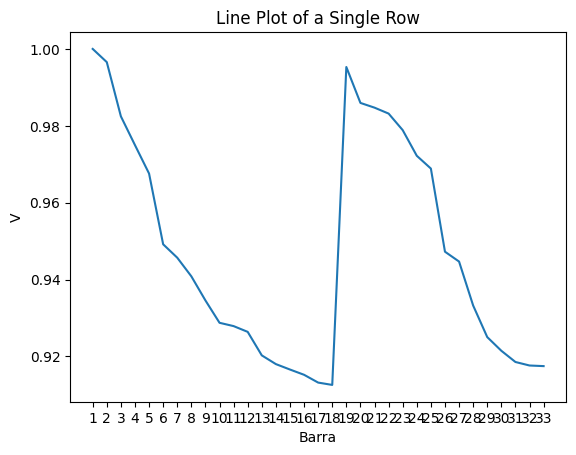

--------------------------------




In [ ]:
import matplotlib.pyplot as plt
#display(IEEE_network.buses_t.v_mag_pu)
#display(IEEE_network.lines_t.p0)
V_df = IEEE_network.buses_t.v_mag_pu #dataframe que tem as tensões nas barras
V_ref = V_df.iloc[0]['1'] #pega a tensão de ref

Vdev_max_Init = abs(V_df - V_ref).max(axis='columns')/V_ref #normaliza a tensão que mais se afasta da Vref

Vdev_max_Init = Vdev_max_Init[0] #passa de series pra um numero só (vem como series do PYPSA)

print(f"Tensão Máxima: {V_df.max(axis='columns')[0]}") #printa a tensão máxima da rede inicial
print("--------------------------------\n\n")
print(f"Tensão Mínima: {V_df.min(axis='columns')[0]}")#printa a tensão mínima da rede inicial
print("--------------------------------\n\n")
print(f"Deviantion máxima: {Vdev_max_Init}")#printa a maior variação de tensão da rede inicial
print("--------------------------------\n\n")
Perdas_df = IEEE_network.lines_t.p0.loc['now'] + IEEE_network.lines_t.p1.loc['now'] #soma a potência que entra e a que sai de todas as linhas (pra achar a perda)
Perda_Total_Init = sum(abs(aux) for aux in Perdas_df) * 10 ** 3 #pega a soma das perdas e passa de MW pra kW
print(f"Perta Total Inicial: {Perda_Total_Init}") #printa a perda total inicial
print("--------------------------------\n\n")

row_data_init = V_df.iloc[0] #pega os valores de tensão das barras pra jogar no plot

# Create a line plot
plt.plot(row_data_init)

# Add labels and title
plt.xlabel('Barra')
plt.ylabel('V')
plt.title('Line Plot of a Single Row')

# Show the plot
plt.show()

print("--------------------------------\n\n")
row_data_init.to_csv("tensao.csv")
Perdas_df.to_csv("perdas.csv")
# #teste adicionando geradores e/ou eletropostos como em trabalhos semelhantes pra confirmar o funcionamento do PYPSA

#IEEE_network.add("Generator","Generator Name", bus = "6", p_set = 2.578, q_set=0, control = "PQ")

# # IEEE_network.add("Load","EV 1", bus = "12", p_set = 0.1 , q_set = 0 )
# # IEEE_network.add("Load","EV 2", bus = "13", p_set = 0.2 , q_set = 0 )
# # IEEE_network.add("Load","EV 3", bus = "14", p_set = 0.4 , q_set = 0 )
# # IEEE_network.add("Load","EV 4", bus = "16", p_set = 0.1 , q_set = 0 )

# IEEE_network.pf()

# V_df = IEEE_network.buses_t.v_mag_pu #dataframe que tem as tensões nas barras
# V_ref = V_df.iloc[0]['1'] #pega a tensão de ref

# Vdev_max = abs(V_df - V_ref).max(axis='columns')/V_ref #normaliza a tensão que mais se afasta da Vref
# display(Vdev_max)

# Perdas_df = IEEE_network.lines_t.p0.loc['now'] + IEEE_network.lines_t.p1.loc['now'] #soma a potência que entra e a que sai de todas as linhas (pra achar a perda)
# Perda_Total = sum(abs(aux) for aux in Perdas_df) * 10 ** 3 #pega a soma das perdas e passa de MW pra kW
# display(Perda_Total)

# print(f"Tensão Máxima: {V_df.max(axis='columns')}")
# print("--------------------------------\n\n")
# print(f"Tensão Mínima: {V_df.min(axis='columns')}")
# print("--------------------------------\n\n")
# print(f"Deviantion máxima: {Vdev_max}")
# print("--------------------------------\n\n")
# Perdas_df = network2.lines_t.p0.loc['now'] + network2.lines_t.p1.loc['now'] #soma a potência que entra e a que sai de todas as linhas (pra achar a perda)
# Perda_Total = sum(abs(aux) for aux in Perdas_df) * 10 ** 3 #pega a soma das perdas e passa de MW pra kW
# print(f"Perta Total: {Perda_Total}")
# print("--------------------------------\n\n")

# Pygad

### Definindo Fitness

In [ ]:
Total_P = (Bus_df['P'].sum()/1000)+0.8 #pega o máximo de potência ativa que tem na rede
P_GD_Max = 0.6*Total_P #define o máximo de geração distribuida que se pode utilizar na rede
print(f"Potência máxima de GD: {P_GD_Max}")


import pygad
def fitness_func(ga_instance, solution, solution_idx): #defininindo a função fitness que vai utilizar no pygad
    if(np.sum(solution)<=P_GD_Max): #já confere inicialmente se a potência máxima de GD da Solução não ultrapassa o máximo que pode adicionar
    #se a potência for superior ao máximo permitido aplica a penalidade nessa solução para inviabilizá-la
        newgrid = IEEE_network.copy() #cria uma deepcopy da rede inicial pra poder testar a solução

        for Index, S_GD in enumerate(solution): #pega os valores de potência que estão dispostos na solução e insere elas conforme sua posição
        #cada indice define a posição nos nós por exemplo a posição 0 do vetor indica o nó 2, a posição 1 indica o nó 3

            if(S_GD != 0): #confere se aquele nó(index da solução) possui GD, se possuir vai criar um gerador no nó especifico
                # print(f"Valor: {S_GD}")
                # print(f"Indice: {solution.index(S_GD)}")
                P_GD = S_GD*fp #como os geradores são potência complexa (um inversor de 100 é na verdade 100 kVA e não 100 kW)
                Q_GD = np.sqrt(S_GD**2 - P_GD**2) #pega o P e Q
                if(Tipo_fp == "Adiantado"): #se for adiantado ele vai colocar o Q como negativo
                  Q_GD = -Q_GD
                newgrid.add("Generator",f"GD N{Index+2}", bus = f"{Index+2}", p_set = P_GD, q_set=Q_GD, control = "PQ") #soma 2 no bus pq o nó 1 não tem GD (é o slack) e o index começa a contar do 0

        newgrid.pf() #faz o power flow da rede nova com as GDs inseridas conforme a solução
        V_df = newgrid.buses_t.v_mag_pu #dataframe que tem as tensões nas barras
        V_ref = V_df.iloc[0]['1'] #pega a tensão de ref

        Vmin = V_df.min(axis='columns')[0] #tensão min
        Vmax = V_df.max(axis='columns')[0] #tensão max

        if((Vmin<0.95) or (Vmax>1.05)): #confere outra restrição e avalia se as tensões estão dentro dos threshold aceitáveis
            return 0.1 #se estiver fora do intervalo aplica penalidade

        Vdev_max = abs(V_df - V_ref).max(axis='columns')/V_ref #normaliza a tensão que mais se afasta da Vref

        Vdev_max = Vdev_max[0] #passa de series pra um numero só (vem como series do PYPSA)

        Perdas_df = newgrid.lines_t.p0.loc['now'] + newgrid.lines_t.p1.loc['now'] #soma a potência que entra e a que sai de todas as linhas (pra achar a perda total)
        Perda_Total = sum(abs(aux) for aux in Perdas_df) * 10 ** 3 #pega a soma das perdas e passa de MW pra kW

        fitness1 = (1-(Perda_Total/Perda_Total_Init)) #fitness baseado na perda de potência, basicamente é quantos % reduziu da perda inicial

        fitness2 = (1-(Vdev_max/Vdev_max_Init))#fitness baseado na variação de tensão, basicamente é quantos % reduziu da variação inicial

        fitness = alfa*fitness1 + beta*fitness2 #aplica os pesos(se tiver) nas fitness func

        return fitness
    #end of if
    else:
        return 0 #primeira penalidade

Potência máxima de GD: 2.7089999999999996


### Definindo a função que chama o genetico

In [ ]:
#parametrização
from datetime import datetime

# from datetime import datetime
# tempoInic = datetime.now()
# tempoFim = datetime.now()
# print(f"Tempo de processamento: {int((tempoFim - tempoInic).total_seconds() * 1000)} ms")

#colocando o genérico numa "grande função" pra facilitar mais tarde a geração de várias simulações
def Genetico_Total(num_generations, num_parents_mating, sol_per_pop, num_genes, gene_space, fitness_func, IEEE_network, Perda_Total_Init, Vdev_max_Init, Total_P, P_GD_Max, on_generation, fp, Tipo_fp, alfa, beta, P_Types):
  tempoInic = datetime.now() #começa a contar o tempo
  #cria a instância do GA com os parâmetros
  #o tipo de seleção foi meio empirico, vi que o tournament dava resultados esmagadoramente melhores
  crossover_type = P_Types[0]
  mutation_type = P_Types[1]
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        fitness_func=fitness_func,
                        gene_space=gene_space,
                        on_generation=on_generation,
                        keep_elitism=10,
                        mutation_by_replacement=True,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        parent_selection_type='tournament') #nsga2 para multiobjetivo

  ga_instance.run() #roda a instância do GA

  ############################# VISUALIZAÇÃO #############################


  #ga_instance.plot_fitness()
  solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness) #pega a solução, o fitness e o index da melhor solução

  #faz uns prints só pra dar uma ollhada
  print("Parameters of the best solution : ")
  print(solution)

  print("----------------------------------------\n\n")
  print(f"Fitness value of the best solution = {solution_fitness}")
  print("--------------------------------\n\n")

  #faz uma cópia aqui da rede e coloca pra rodar a melhor solução pra pegar alguns parametros relevantes
  newgrid = IEEE_network.copy()

  #repete basicamente o mesmo processo que faz pra cada solução na função de fitness, mas dessa vez apenas para a melhor solução
  for Index, S_GD in enumerate(solution):

      if(S_GD != 0):
          # print(f"Valor: {S_GD}")
          # print(f"Indice: {solution.index(S_GD)}")
          P_GD = S_GD*fp
          Q_GD = np.sqrt(S_GD**2 - P_GD**2)

          if(Tipo_fp == "Adiantado"):
            Q_GD = -Q_GD
          newgrid.add("Generator",f"GD N{Index+2}", bus = f"{Index+2}", p_set = P_GD, q_set=Q_GD, control = "PQ") #soma 2 no bus pq o nó 1 não tem GD (é o slack) e o index começa a contar do 0
          #guardando a linha
      #end of if
  #end of for
  #display(newgrid.generators)

  newgrid.pf()
  V_df = newgrid.buses_t.v_mag_pu #dataframe que tem as tensões nas barras
  V_ref = V_df.iloc[0]['1'] #pega a tensão de ref

  Vdev_max = abs(V_df - V_ref).max(axis='columns')/V_ref #normaliza a tensão que mais se afasta da Vref
  tempoFim = datetime.now() #encerra a contagem do tempo de execução do algoritmo, já que de agora em diante é só plotagem de resultados
  #faz alguns prints pra dar uma olhada na solução enquanto vai gerando
  print(f"Tensão Máxima: {V_df.max(axis='columns')[0]}")
  print("--------------------------------\n\n")
  print(f"Tensão Mínima: {V_df.min(axis='columns')[0]}")
  print("--------------------------------\n\n")
  print(f"Deviantion máxima: {Vdev_max[0]}")
  print("--------------------------------\n\n")
  Perdas_df = newgrid.lines_t.p0.loc['now'] + newgrid.lines_t.p1.loc['now'] #soma a potência que entra e a que sai de todas as linhas (pra achar a perda)
  Perda_Total = sum(abs(aux) for aux in Perdas_df) * 10 ** 3 #pega a soma das perdas e passa de MW pra kW
  print(f"Perta Total: {Perda_Total}")
  print("--------------------------------\n\n")
  Num_de_GD = 0
  for x in solution:
    if(x!=0):
      Num_de_GD += 1
  print(f"Numero de GDs inseridas: {Num_de_GD}")
  print(f"Soma da pot de GD:{np.sum(solution)}")

  #plota o gráfico com a tensão inicial e com a melhor solução pra comparar
  row_data = V_df.iloc[0]

  # Create a line plot
  plt.plot(row_data_init)
  plt.plot(row_data)

  # Add labels and title
  plt.xlabel('Barra')
  plt.ylabel('V')
  plt.title('Line Plot of a Single Row')

  # Show the plot
  plt.show()

  Vdev_max = Vdev_max[0]
  Vmax_Sol = V_df.max(axis='columns')[0]
  Vmin_Sol = V_df.min(axis='columns')[0]

  fit1 = (1-(Perda_Total/Perda_Total_Init))

  fit2 = (1-(Vdev_max/Vdev_max_Init))

  Tempo_Exec = int((tempoFim - tempoInic).total_seconds() * 1000)
  print(f"Tempo de processamento: {Tempo_Exec} ms")
  print("\n\n\n\n--------------------------------FIM DE UM ALGORITMO--------------------------------\n\n\n\n")
  return [solution, solution_fitness, Tempo_Exec, Perda_Total, Vmax_Sol, Vmin_Sol, fit1, fit2]


### Define o On Generation
Uma função pra rodar a cada geração do genético, e ir observando como progride o fitness

In [ ]:
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    print("-------------\n\n")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

# Main
Teste Principal

## Resultados dos Cenários
Resultados dos cenários alterando alfa e beta.

### 30X 50/50 ok


-----------------------------RODANDO PELA 1ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2661339903178823
Change     = 1.2661339903178823
-------------


Generation = 2
Fitness    = 1.2661339903178823
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3096380824511096
Change     = 0.04350409213322726
-------------


Generation = 4
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generation = 11
Fitness    = 1.3096380824511096
Change     = 0.0
-------------


Generati

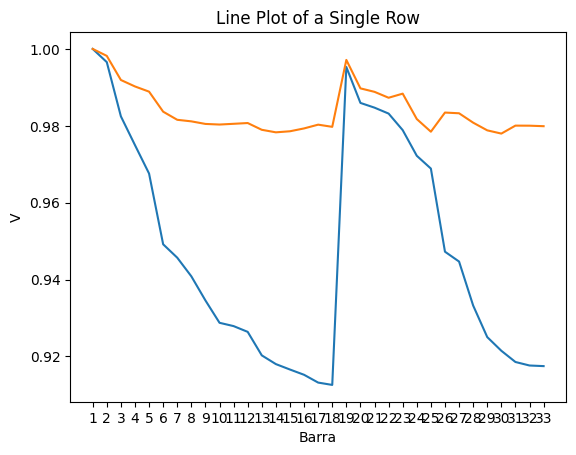

Tempo de processamento: 338662 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 2ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3507951728847885
Change     = 1.3507951728847885
-------------


Generation = 2
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3507951728847885
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.3507951728847885
Change     =

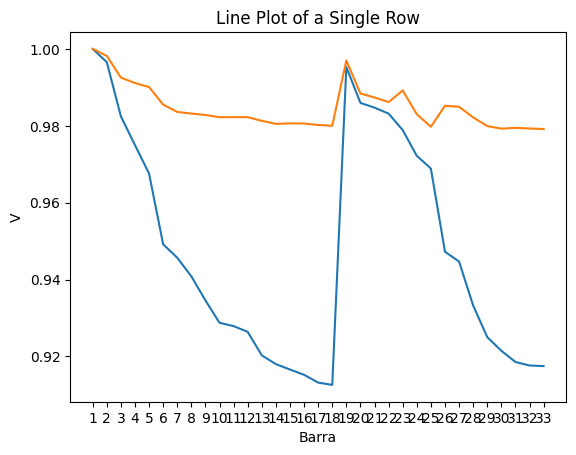

Tempo de processamento: 322686 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 3ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2660201811626222
Change     = 1.2660201811626222
-------------


Generation = 2
Fitness    = 1.2660201811626222
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2660201811626222
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3199319121344906
Change     = 0.05391173097186841
-------------


Generation = 5
Fitness    = 1.3199319121344906
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3199319121344906
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3224543945119545
Change     = 0.002522482377463886
-------------


Generation = 8
Fitness    = 1.3357475211712477
Change     = 0.013293126659293275
-------------


Generation = 9
Fitness    = 1.3560933249117295
Change     = 0.020345803740481783
---------

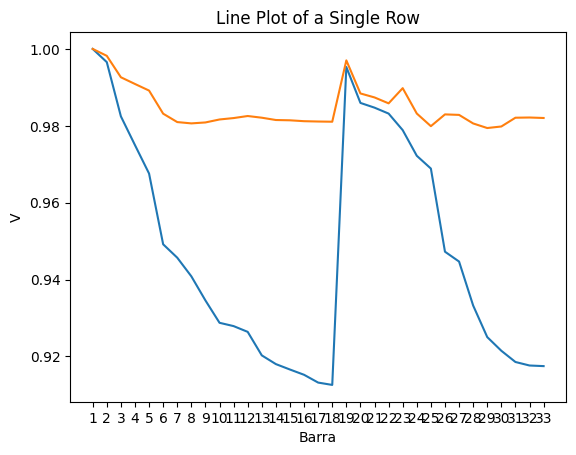

Tempo de processamento: 329853 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 4ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1866249675102505
Change     = 1.1866249675102505
-------------


Generation = 2
Fitness    = 1.243917262166782
Change     = 0.05729229465653152
-------------


Generation = 3
Fitness    = 1.302039585216884
Change     = 0.05812232305010201
-------------


Generation = 4
Fitness    = 1.302039585216884
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3045100220944992
Change     = 0.0024704368776151675
-------------


Generation = 6
Fitness    = 1.3045100220944992
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3195119655450156
Change     = 0.01500194345051642
-------------


Generation = 8
Fitness    = 1.3419154598003922
Change     = 0.022403494255376577
-------------


Generation = 9
Fitness    = 1.342510640858952
Change     = 0

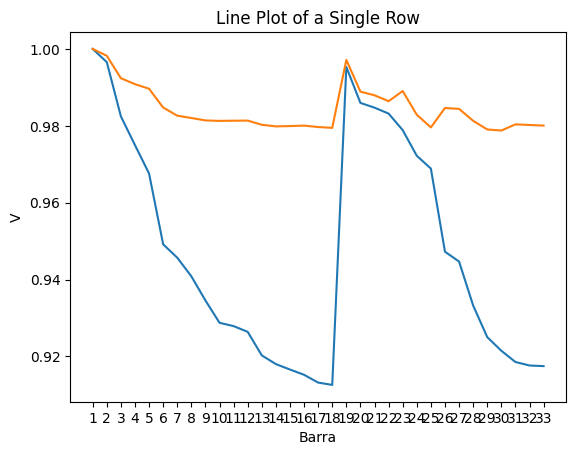

Tempo de processamento: 295017 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 5ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2328779554442069
Change     = 1.2328779554442069
-------------


Generation = 2
Fitness    = 1.2328779554442069
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2328779554442069
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2773432249127392
Change     = 0.044465269468532354
-------------


Generation = 5
Fitness    = 1.3082329884519641
Change     = 0.0308897635392249
-------------


Generation = 6
Fitness    = 1.3082329884519641
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3082329884519641
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3082329884519641
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3276732242569669
Change     = 0.01944023580500276
-------------


Generation =

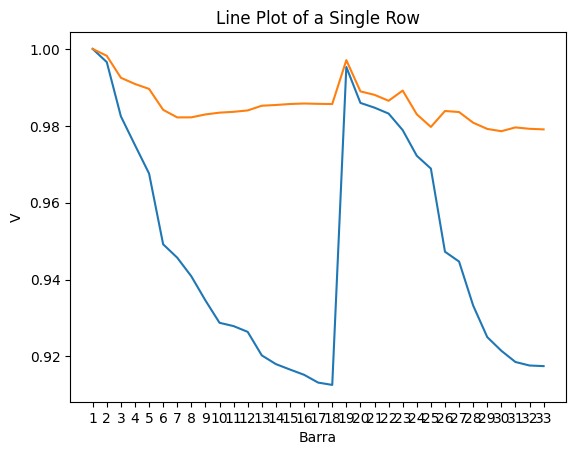

Tempo de processamento: 302708 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 6ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2808342875075018
Change     = 1.2808342875075018
-------------


Generation = 2
Fitness    = 1.3060470640329833
Change     = 0.025212776525481484
-------------


Generation = 3
Fitness    = 1.3060470640329833
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3060470640329833
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3060470640329833
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3060470640329833
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.313051055087155
Change     = 0.00700399105417171
-------------


Generation = 8
Fitness    = 1.3514838102988955
Change     = 0.0384327552117405
-------------


Generation = 9
Fitness    = 1.3514838102988955
Change     = 0.0
-------------


Generation = 

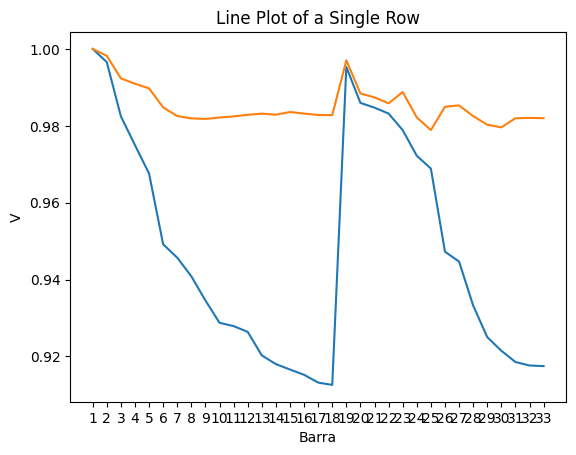

Tempo de processamento: 380148 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 7ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2481067847380978
Change     = 1.2481067847380978
-------------


Generation = 2
Fitness    = 1.2856196805609001
Change     = 0.03751289582280237
-------------


Generation = 3
Fitness    = 1.2856196805609001
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.297007649773262
Change     = 0.01138796921236196
-------------


Generation = 5
Fitness    = 1.300219344817243
Change     = 0.003211695043980889
-------------


Generation = 6
Fitness    = 1.300219344817243
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.300219344817243
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.300219344817243
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.300219344817243
Change     = 0.0
-------------


Generation = 10
F

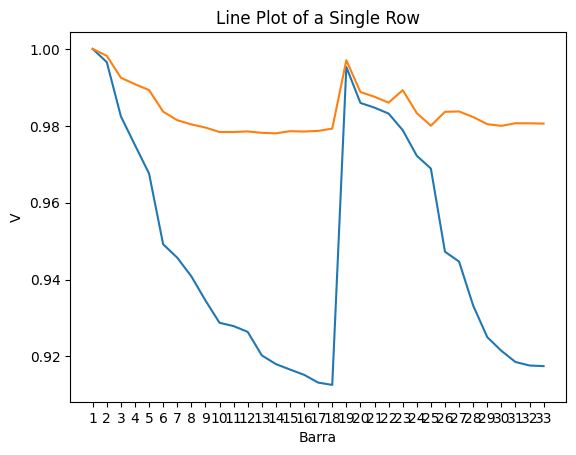

Tempo de processamento: 343717 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 8ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2643516393417666
Change     = 1.2643516393417666
-------------


Generation = 2
Fitness    = 1.2643516393417666
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2643516393417666
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2643516393417666
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2926987451897074
Change     = 0.028347105847940757
-------------


Generation = 6
Fitness    = 1.3029030630855158
Change     = 0.010204317895808446
-------------


Generation = 7
Fitness    = 1.3240686513723707
Change     = 0.021165588286854886
-------------


Generation = 8
Fitness    = 1.3248276042827616
Change     = 0.0007589529103908532
-------------


Generation = 9
Fitness    = 1.3248276042827616
Change     = 0.0
-------

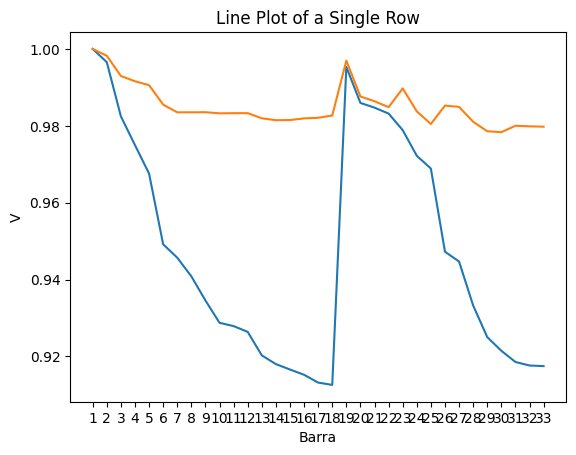

Tempo de processamento: 346498 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 9ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2312127744158299
Change     = 1.2312127744158299
-------------


Generation = 2
Fitness    = 1.2312127744158299
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2312127744158299
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2575157274908597
Change     = 0.026302953075029833
-------------


Generation = 5
Fitness    = 1.265873893143908
Change     = 0.008358165653048255
-------------


Generation = 6
Fitness    = 1.3049595464846515
Change     = 0.03908565334074354
-------------


Generation = 7
Fitness    = 1.3233750544082576
Change     = 0.018415507923606134
-------------


Generation = 8
Fitness    = 1.3233750544082576
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3233750544082576
Change     = 0.0
----------

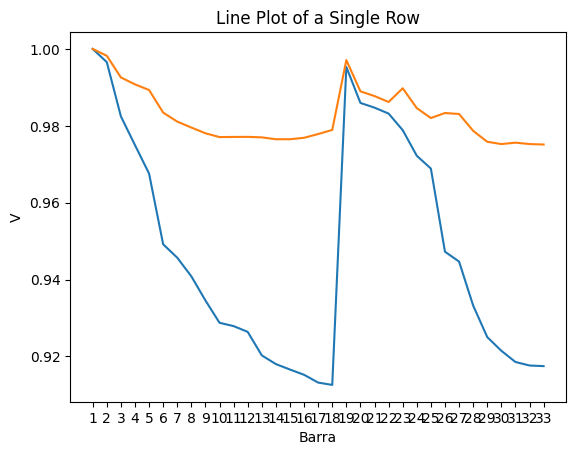

Tempo de processamento: 312797 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 10ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2431916105445295
Change     = 1.2431916105445295
-------------


Generation = 2
Fitness    = 1.2880427406739954
Change     = 0.044851130129465844
-------------


Generation = 3
Fitness    = 1.3016758249954319
Change     = 0.013633084321436506
-------------


Generation = 4
Fitness    = 1.3016758249954319
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3494245297872658
Change     = 0.04774870479183391
-------------


Generation = 6
Fitness    = 1.3494245297872658
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3494245297872658
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3494245297872658
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3494245297872658
Change     = 0.0
-------------


Generatio

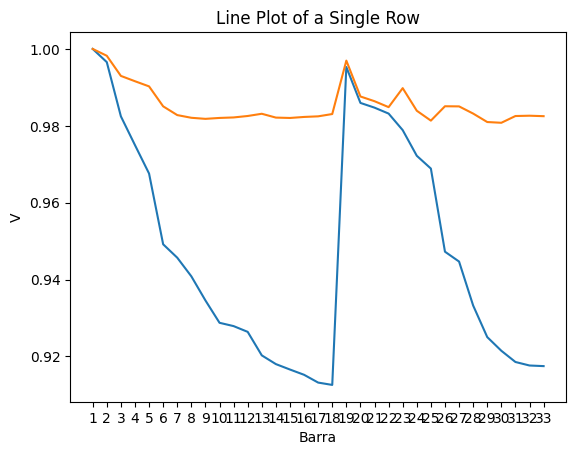

Tempo de processamento: 321231 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 11ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2783564010414747
Change     = 1.2783564010414747
-------------


Generation = 2
Fitness    = 1.2783564010414747
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2783564010414747
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2882036746539467
Change     = 0.009847273612471952
-------------


Generation = 5
Fitness    = 1.2882036746539467
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2882036746539467
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2977158680845648
Change     = 0.009512193430618154
-------------


Generation = 8
Fitness    = 1.2977158680845648
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3196598519839853
Change     = 0.021943983899420427
-------------


Generati

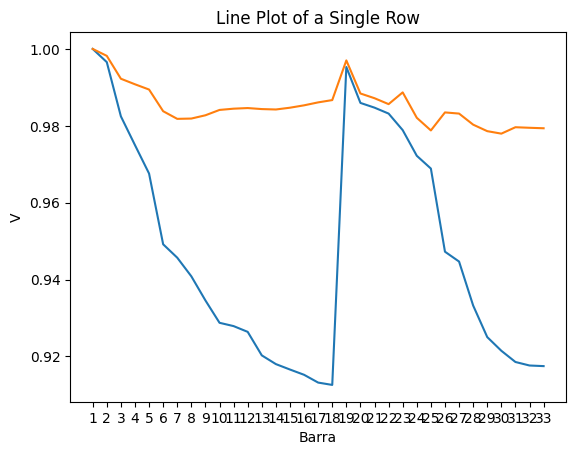

Tempo de processamento: 358656 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 12ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2424894903138346
Change     = 1.2424894903138346
-------------


Generation = 2
Fitness    = 1.2483231643793153
Change     = 0.005833674065480743
-------------


Generation = 3
Fitness    = 1.2483231643793153
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2483231643793153
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2982209763092922
Change     = 0.04989781192997689
-------------


Generation = 6
Fitness    = 1.2982209763092922
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3153244628076584
Change     = 0.017103486498366127
-------------


Generation = 8
Fitness    = 1.3153244628076584
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3153244628076584
Change     = 0.0
-------------


Generatio

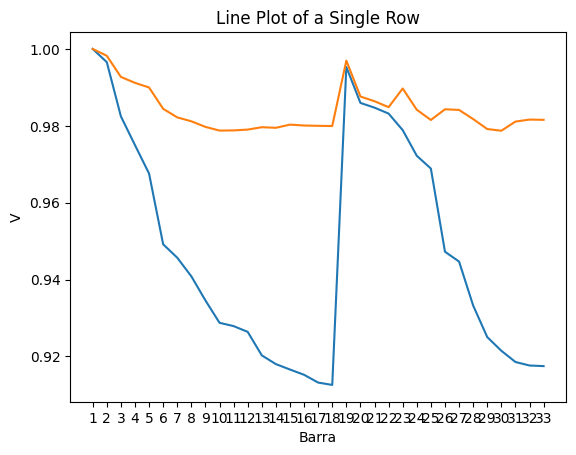

Tempo de processamento: 310479 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 13ªVEZ-----------------------------

Generation = 1
Fitness    = 1.211531749870887
Change     = 1.211531749870887
-------------


Generation = 2
Fitness    = 1.211531749870887
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.227423056183464
Change     = 0.015891306312576958
-------------


Generation = 4
Fitness    = 1.2578424612533115
Change     = 0.030419405069847416
-------------


Generation = 5
Fitness    = 1.2594262490769474
Change     = 0.001583787823635996
-------------


Generation = 6
Fitness    = 1.2594262490769474
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2719589463755367
Change     = 0.012532697298589301
-------------


Generation = 8
Fitness    = 1.2719589463755367
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2719589463755367
Change     = 0.0
-----------

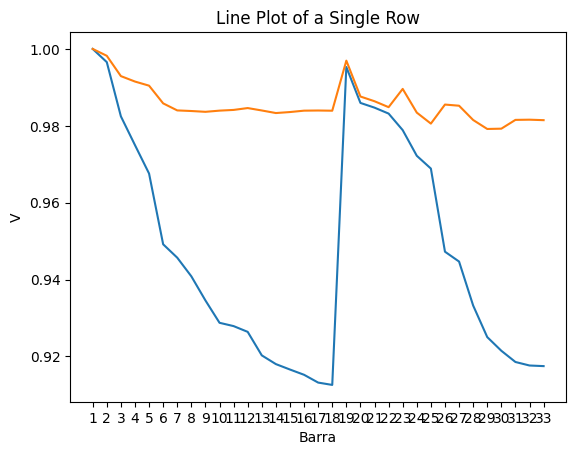

Tempo de processamento: 332560 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 14ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1684009169287433
Change     = 1.1684009169287433
-------------


Generation = 2
Fitness    = 1.2274903385777738
Change     = 0.05908942164903053
-------------


Generation = 3
Fitness    = 1.248883664305756
Change     = 0.021393325727982138
-------------


Generation = 4
Fitness    = 1.2553899132335502
Change     = 0.006506248927794278
-------------


Generation = 5
Fitness    = 1.2553899132335502
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.278286979214374
Change     = 0.02289706598082386
-------------


Generation = 7
Fitness    = 1.278286979214374
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3308547757151703
Change     = 0.05256779650079624
-------------


Generation = 9
Fitness    = 1.3308547757151703
Change     = 

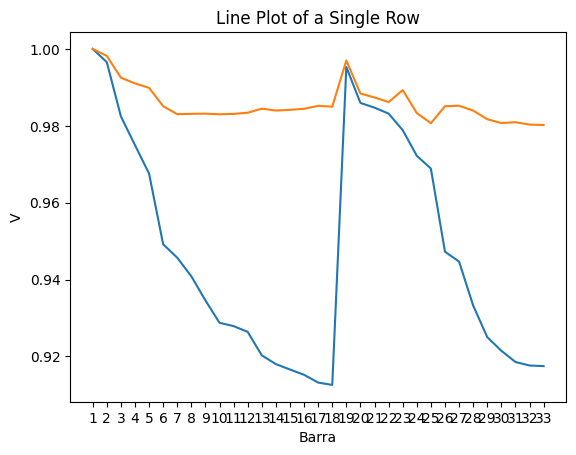

Tempo de processamento: 343122 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 15ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2437990300007087
Change     = 1.2437990300007087
-------------


Generation = 2
Fitness    = 1.2437990300007087
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2437990300007087
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2437990300007087
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2507850752151315
Change     = 0.006986045214422809
-------------


Generation = 6
Fitness    = 1.2814569388649666
Change     = 0.030671863649835096
-------------


Generation = 7
Fitness    = 1.2814569388649666
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2814569388649666
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3619508010588341
Change     = 0.08049386219386756
-------------


Generatio

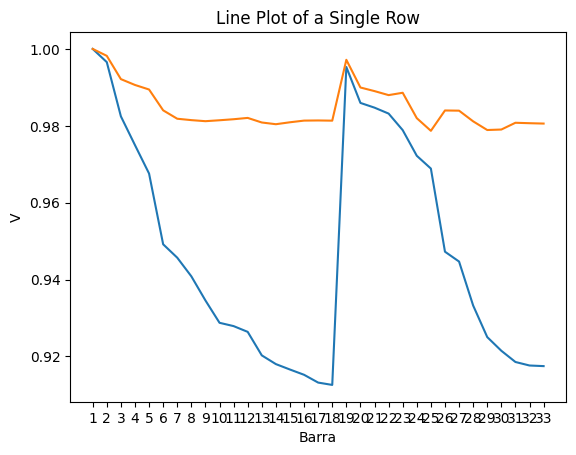

Tempo de processamento: 337913 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 16ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2450074836466727
Change     = 1.2450074836466727
-------------


Generation = 2
Fitness    = 1.2450074836466727
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2450074836466727
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2963935533340396
Change     = 0.05138606968736692
-------------


Generation = 5
Fitness    = 1.3216786866536432
Change     = 0.02528513331960358
-------------


Generation = 6
Fitness    = 1.3216786866536432
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3216786866536432
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3216786866536432
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3216786866536432
Change     = 0.0
-------------


Generation = 10
Fitness    

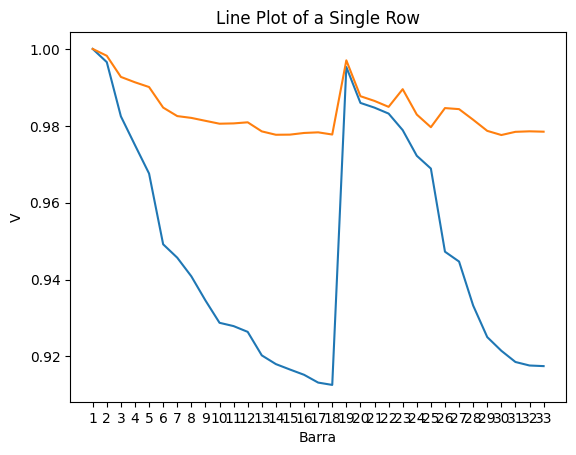

Tempo de processamento: 329774 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 17ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2196362315244111
Change     = 1.2196362315244111
-------------


Generation = 2
Fitness    = 1.2324912808490012
Change     = 0.012855049324590029
-------------


Generation = 3
Fitness    = 1.286019890532146
Change     = 0.05352860968314488
-------------


Generation = 4
Fitness    = 1.286019890532146
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.286019890532146
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3075147234325994
Change     = 0.021494832900453398
-------------


Generation = 7
Fitness    = 1.3075147234325994
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3318089912044844
Change     = 0.024294267771884925
-------------


Generation = 9
Fitness    = 1.3493197960695238
Change     = 0.0175108048650

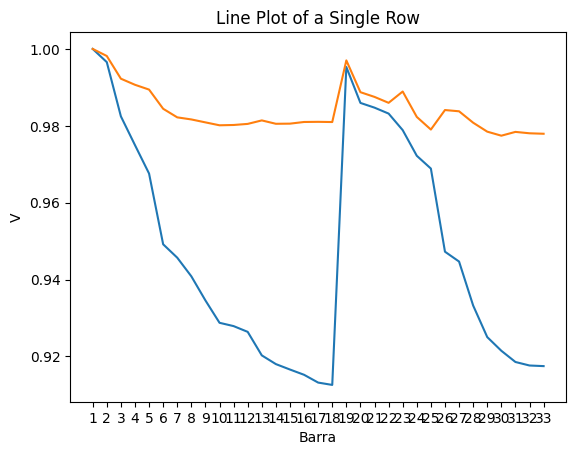

Tempo de processamento: 313526 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 18ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2458997020649347
Change     = 1.2458997020649347
-------------


Generation = 2
Fitness    = 1.2458997020649347
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2458997020649347
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2458997020649347
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2715618910572932
Change     = 0.025662188992358503
-------------


Generation = 6
Fitness    = 1.2715618910572932
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2915151049585734
Change     = 0.01995321390128013
-------------


Generation = 8
Fitness    = 1.313249193112282
Change     = 0.021734088153708697
-------------


Generation = 9
Fitness    = 1.313249193112282
Change     = 0.0
-------------


Generation 

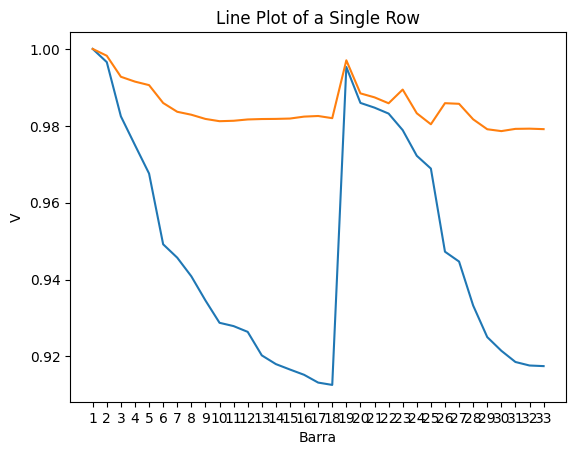

Tempo de processamento: 334463 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 19ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2065061448192194
Change     = 1.2065061448192194
-------------


Generation = 2
Fitness    = 1.2766581416202918
Change     = 0.07015199680107242
-------------


Generation = 3
Fitness    = 1.337080643524621
Change     = 0.060422501904329184
-------------


Generation = 4
Fitness    = 1.337080643524621
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.337080643524621
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.337080643524621
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.337080643524621
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.337080643524621
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.337080643524621
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.33

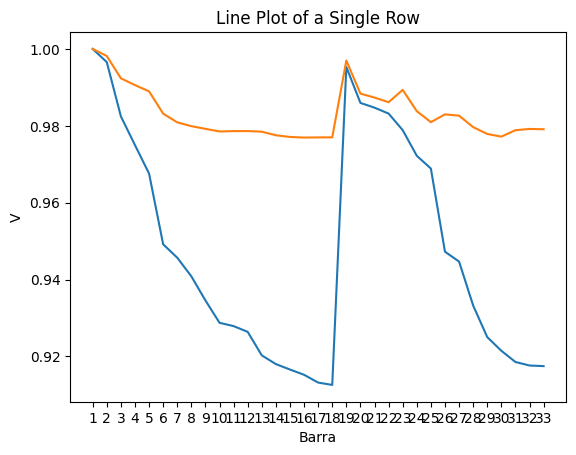

Tempo de processamento: 349820 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 20ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2022042264949095
Change     = 1.2022042264949095
-------------


Generation = 2
Fitness    = 1.266422776331698
Change     = 0.06421854983678843
-------------


Generation = 3
Fitness    = 1.3226788236453202
Change     = 0.056256047313622215
-------------


Generation = 4
Fitness    = 1.3226788236453202
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3226788236453202
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3246415435599317
Change     = 0.0019627199146114993
-------------


Generation = 7
Fitness    = 1.3310748045793934
Change     = 0.0064332610194617335
-------------


Generation = 8
Fitness    = 1.3683352390347217
Change     = 0.03726043445532823
-------------


Generation = 9
Fitness    = 1.3683352390347217
Change  

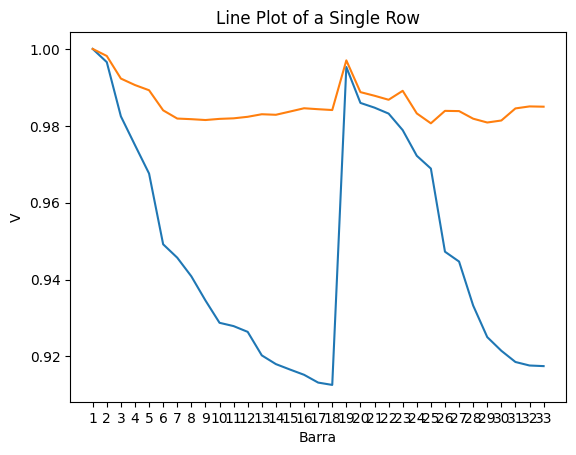

Tempo de processamento: 340182 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 21ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2369148400669283
Change     = 1.2369148400669283
-------------


Generation = 2
Fitness    = 1.2455758581831913
Change     = 0.008661018116262964
-------------


Generation = 3
Fitness    = 1.2455758581831913
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2792554091715285
Change     = 0.03367955098833719
-------------


Generation = 5
Fitness    = 1.2792554091715285
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2805593168850797
Change     = 0.0013039077135512667
-------------


Generation = 7
Fitness    = 1.2805593168850797
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2805593168850797
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.311628085179601
Change     = 0.03106876829452121
---------

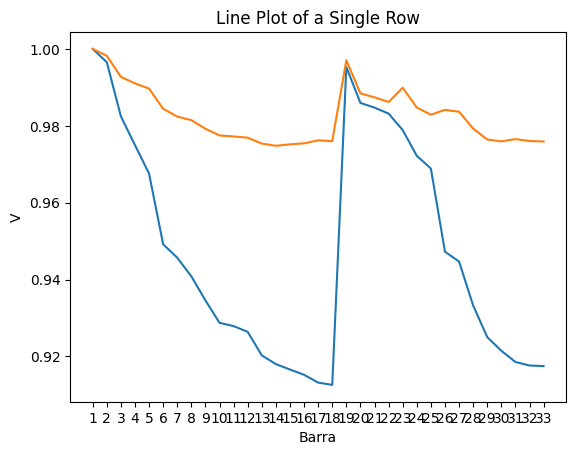

Tempo de processamento: 378221 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 22ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2028808338327885
Change     = 1.2028808338327885
-------------


Generation = 2
Fitness    = 1.2413523235273929
Change     = 0.038471489694604344
-------------


Generation = 3
Fitness    = 1.3253161856758089
Change     = 0.083963862148416
-------------


Generation = 4
Fitness    = 1.3253161856758089
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3253161856758089
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3253161856758089
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3253161856758089
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3253161856758089
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3305596002868556
Change     = 0.005243414611046715
-------------


Generation 

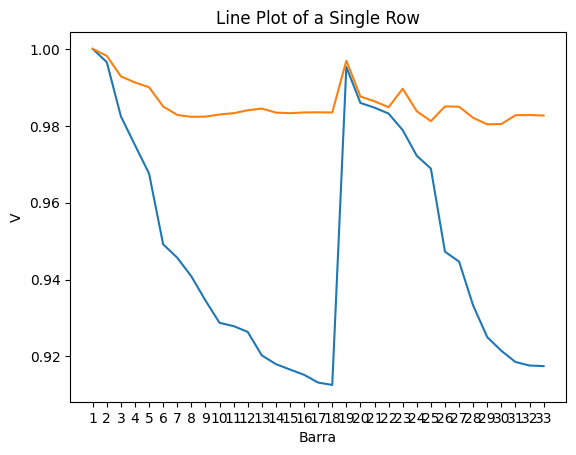

Tempo de processamento: 355841 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 23ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2834484305080742
Change     = 1.2834484305080742
-------------


Generation = 2
Fitness    = 1.2834484305080742
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2834484305080742
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2834484305080742
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2834484305080742
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2834484305080742
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2834484305080742
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2923154197592521
Change     = 0.008866989251177904
-------------


Generation = 9
Fitness    = 1.2923154197592521
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.29530381995

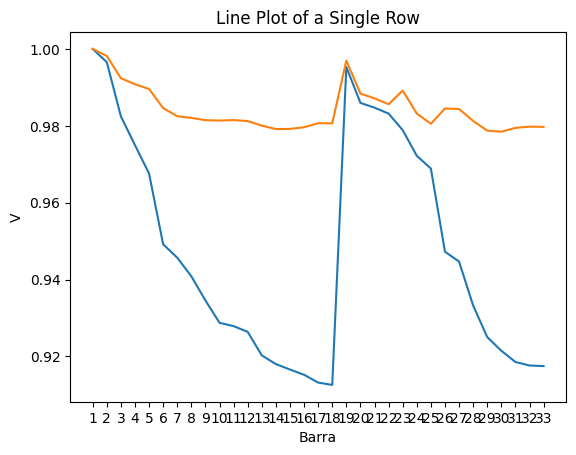

Tempo de processamento: 325819 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 24ªVEZ-----------------------------

Generation = 1
Fitness    = 1.335223670018155
Change     = 1.335223670018155
-------------


Generation = 2
Fitness    = 1.335223670018155
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.335223670018155
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3482297889743244
Change     = 0.013006118956169432
-------------


Generation = 5
Fitness    = 1.3482297889743244
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3482297889743244
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.353873235617447
Change     = 0.005643446643122552
-------------


Generation = 8
Fitness    = 1.353873235617447
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.353873235617447
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.3

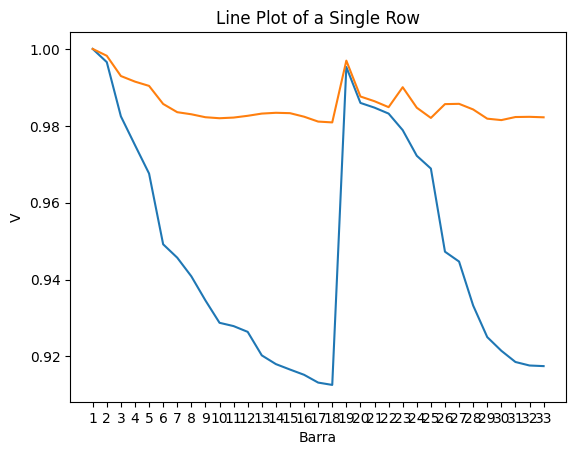

Tempo de processamento: 329520 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 25ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2675149422631464
Change     = 1.2675149422631464
-------------


Generation = 2
Fitness    = 1.2675149422631464
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3496006024650407
Change     = 0.08208566020189423
-------------


Generation = 4
Fitness    = 1.3496006024650407
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3496006024650407
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3496006024650407
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3496006024650407
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3496006024650407
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3496006024650407
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.349600602465

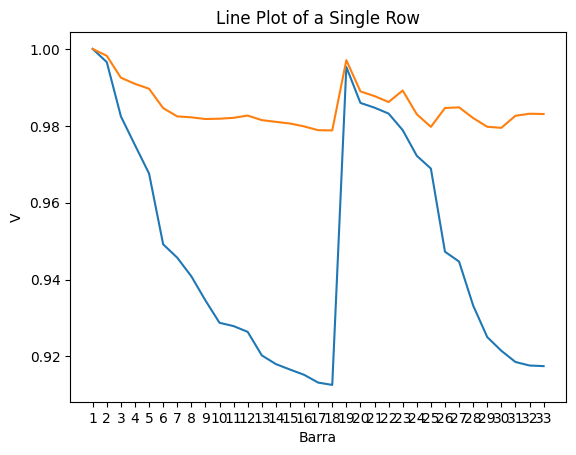

Tempo de processamento: 338514 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 26ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2090771301287488
Change     = 1.2090771301287488
-------------


Generation = 2
Fitness    = 1.2335033377260833
Change     = 0.024426207597334493
-------------


Generation = 3
Fitness    = 1.2335033377260833
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2344045984886878
Change     = 0.0009012607626044389
-------------


Generation = 5
Fitness    = 1.2945895444323932
Change     = 0.06018494594370538
-------------


Generation = 6
Fitness    = 1.2945895444323932
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2945895444323932
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2945895444323932
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2972307174060655
Change     = 0.00264117297367239
--------

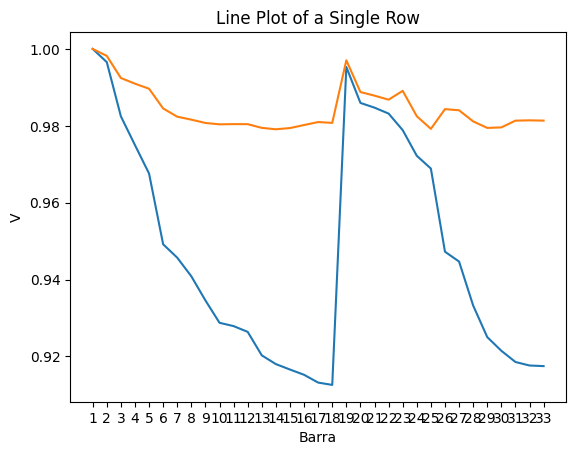

Tempo de processamento: 333889 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 27ªVEZ-----------------------------

Generation = 1
Fitness    = 1.269244228640726
Change     = 1.269244228640726
-------------


Generation = 2
Fitness    = 1.269244228640726
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.269244228640726
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2933188505126239
Change     = 0.024074621871897905
-------------


Generation = 5
Fitness    = 1.2933188505126239
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3001682493039564
Change     = 0.006849398791332506
-------------


Generation = 7
Fitness    = 1.3464147433858438
Change     = 0.04624649408188741
-------------


Generation = 8
Fitness    = 1.3464147433858438
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3464147433858438
Change     = 0.0
-------------


Generation = 

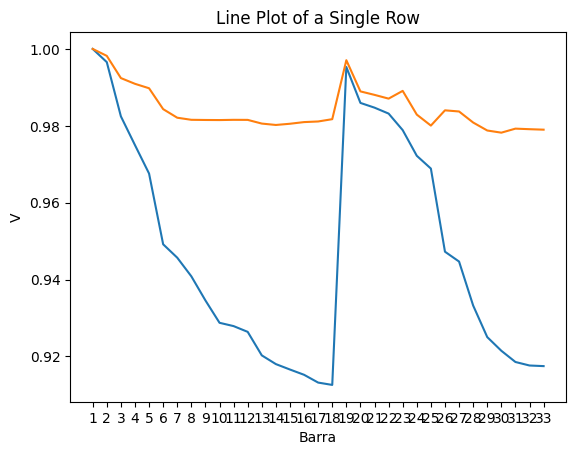

Tempo de processamento: 364679 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 28ªVEZ-----------------------------

Generation = 1
Fitness    = 1.292281897200282
Change     = 1.292281897200282
-------------


Generation = 2
Fitness    = 1.292281897200282
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.292281897200282
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.292281897200282
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3099324347340588
Change     = 0.017650537533776767
-------------


Generation = 6
Fitness    = 1.3099324347340588
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3267137004680327
Change     = 0.01678126573397387
-------------


Generation = 8
Fitness    = 1.3267137004680327
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3267137004680327
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.

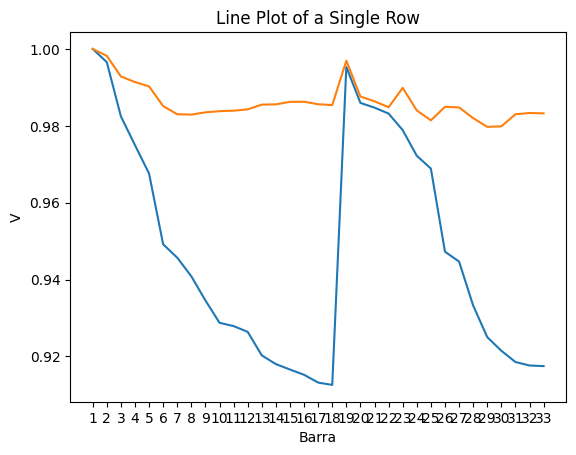

Tempo de processamento: 353486 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 29ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2457253363482494
Change     = 1.2457253363482494
-------------


Generation = 2
Fitness    = 1.2457253363482494
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2457253363482494
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2457253363482494
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2700323880971751
Change     = 0.024307051748925668
-------------


Generation = 6
Fitness    = 1.2700323880971751
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2723956759880908
Change     = 0.0023632878909156663
-------------


Generation = 8
Fitness    = 1.303258565426391
Change     = 0.03086288943830029
-------------


Generation = 9
Fitness    = 1.303258565426391
Change     = 0.0
-------------


Generation

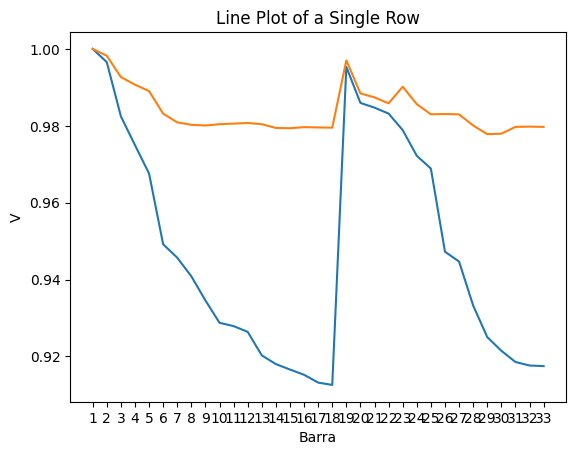

Tempo de processamento: 310790 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 30ªVEZ-----------------------------

Generation = 1
Fitness    = 1.224283857508861
Change     = 1.224283857508861
-------------


Generation = 2
Fitness    = 1.2349062226746845
Change     = 0.010622365165823489
-------------


Generation = 3
Fitness    = 1.281762709576913
Change     = 0.046856486902228545
-------------


Generation = 4
Fitness    = 1.281762709576913
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.281762709576913
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.310600320139535
Change     = 0.028837610562622018
-------------


Generation = 7
Fitness    = 1.310600320139535
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.310600320139535
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3232046279398182
Change     = 0.012604307800283099
-------------



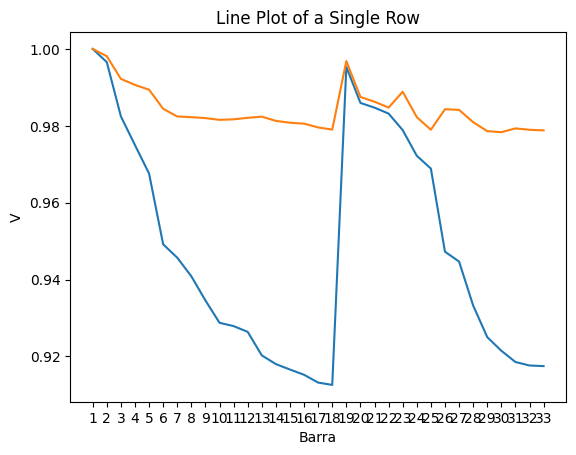

Tempo de processamento: 338248 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------




     Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.354962           338662    84.558055       1.0  0.977974  0.606936   
1   1.376845           322686    82.757162       1.0  0.979155  0.615307   
2   1.362215           329853    86.554011       1.0  0.979419  0.597657   
3   1.372746           295017    82.683425       1.0  0.978767  0.615650   
4   1.362030           302708    84.558932       1.0  0.978592  0.606932   
5   1.351484           380148    87.552969       1.0  0.978887  0.593014   
6   1.357945           343717    84.065210       1.0  0.978035  0.609227   
7   1.364158           346498    83.477771       1.0  0.978339  0.611957   
8   1.351466           312797    78.308293       1.0  0.975129  0.635987   
9   1.383071           321231    85.429275       1.0  0.980785  0.602886   
10  1.339843           358656    87.77

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.354962           338662    84.558055       1.0  0.977974  0.606936   
1   1.376845           322686    82.757162       1.0  0.979155  0.615307   
2   1.362215           329853    86.554011       1.0  0.979419  0.597657   
3   1.372746           295017    82.683425       1.0  0.978767  0.615650   
4   1.362030           302708    84.558932       1.0  0.978592  0.606932   
5   1.351484           380148    87.552969       1.0  0.978887  0.593014   
6   1.357945           343717    84.065210       1.0  0.978035  0.609227   
7   1.364158           346498    83.477771       1.0  0.978339  0.611957   
8   1.351466           312797    78.308293       1.0  0.975129  0.635987   
9   1.383071           321231    85.429275       1.0  0.980785  0.602886   
10  1.339843           358656    87.774290       1.0  0.977959  0.591985   
11  1.365357           310479    84.151227       1.0  0.978717  0.608827   
12  1.365919           332560    85.155412       1.0  0.979175  0.604159   
13  1.377229           343122    85.242440       1.0  0.980199  0.603754   
14  1.366464           337913    83.851548       1.0  0.978693  0.610220   
15  1.353701           329774    83.906761       1.0  0.977599  0.609963   
16  1.352100           313526    83.825349       1.0  0.977426  0.610342   
17  1.372007           334463    82.478267       1.0  0.978619  0.616603   
18  1.357101           349820    81.551955       1.0  0.976940  0.620909   
19  1.369899           340182    87.922699       1.0  0.980647  0.591295   
20  1.350637           378221    77.674332       1.0  0.974799  0.638934   
21  1.374815           355841    86.218054       1.0  0.980384  0.599219   
22  1.367835           325819    83.011759       1.0  0.978471  0.614123   
23  1.389109           329520    84.369309       1.0  0.980882  0.607813   
24  1.360854           338514    85.329607       1.0  0.978803  0.603349   
25  1.367512           333889    84.619182       1.0  0.979096  0.606651   
26  1.369478           364679    82.020978       1.0  0.978212  0.618729   
27  1.364148           353486    86.907864       1.0  0.979732  0.596013   
28  1.374012           310790    80.088300       1.0  0.977823  0.627713   
29  1.350705           338248    86.365209       1.0  0.978336  0.598535   

        fit2  
0   0.748026  
1   0.761538  
2   0.764557  
3   0.757096  
4   0.755098  
5   0.758470  
6   0.748718  
7   0.752200  
8   0.715478  
9   0.780185  
10  0.747858  
11  0.756530  
12  0.761760  
13  0.773474  
14  0.756244  
15  0.743738  
16  0.741758  
17  0.755403  
18  0.736192  
19  0.778604  
20  0.711703  
21  0.775596  
22  0.753711  
23  0.781297  
24  0.757505  
25  0.760860  
26  0.750749  
27  0.768136  
28  0.746299  
29  0.752170

In [ ]:
Tipo_fp = "Unitário" #Q>0
fp=1
#parametrização
num_generations = 30 #Número de Gerações
num_parents_mating = 26 #Número de soluções que gerarão filhos

sol_per_pop = 50 #quantidade de soluções por população
num_genes = 32 #numero de genes de cada solução (é o numero de nós que dá pra colocar GD)
gene_space = [0, 0, 0, 0, 0, 0.075, 0.11, 0.125, 0.250, 0.35] #define as potências de GD que podem ser inseridas

last_fitness = 0
alfa = 1
beta = 1

P_Types = ["uniform", "random"]

Resultado_FP_Unit = [None for _ in range(30)] #cria o vetor que vai armazenar os resultados de cada execução do alg em um vet vazio

for i in range(0,30):
  print(f"\n-----------------------------RODANDO PELA {i+1}ªVEZ-----------------------------\n")
  last_fitness = 0
  Resultado_FP_Unit[i] = Genetico_Total(num_generations, num_parents_mating, sol_per_pop, num_genes, gene_space, fitness_func, IEEE_network, Perda_Total_Init, Vdev_max_Init, Total_P, P_GD_Max, on_generation, fp, Tipo_fp, alfa, beta, P_Types)


#display(Resultado_FP_Unit)
# Extract the strings and the integers from the second element of each inner list
Lista_Resultados_1 = [[item[1], item[2], item[3], item[4], item[5], item[6], item[7]] for item in Resultado_FP_Unit]
Lista_GDs_1 = [item[0] for item in Resultado_FP_Unit]
# Create a DataFrame with the extracted data
Lista_Nomes_1 = [f"Gerador nó {i+2}" for i in range (32)]
# Create a DataFrame with the extracted data
df_Lista_Resultados_1 = pd.DataFrame(Lista_Resultados_1, columns=['Fitness', 'Tempo Exec (ms)', 'Perda_Total', 'Vmax_Sol', 'Vmin_Sol', 'fit1', 'fit2'])
df_Lista_GDs_1 = pd.DataFrame(Lista_GDs_1, columns = Lista_Nomes_1)

print(df_Lista_Resultados_1)

#cria os csv's
df_Lista_Resultados_1.to_csv('Fitness_50_50.csv')
df_Lista_GDs_1.to_csv('Soluções_50_50.csv')

files.download('Fitness_50_50.csv')
files.download('Soluções_50_50.csv')
display(df_Lista_Resultados_1)

### 30X 75/25 ok


-----------------------------RODANDO PELA 1ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2448424089628258
Change     = 1.2448424089628258
-------------


Generation = 2
Fitness    = 1.2448424089628258
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2454606206579657
Change     = 0.0006182116951398697
-------------


Generation = 4
Fitness    = 1.2590416388205505
Change     = 0.013581018162584835
-------------


Generation = 5
Fitness    = 1.2635734874558056
Change     = 0.00453184863525502
-------------


Generation = 6
Fitness    = 1.3098992903682407
Change     = 0.046325802912435154
-------------


Generation = 7
Fitness    = 1.3098992903682407
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3098992903682407
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3098992903682407
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.3098992903682407
Change     = 0.0
-------------


Generation = 11
Fitness    = 1.309899

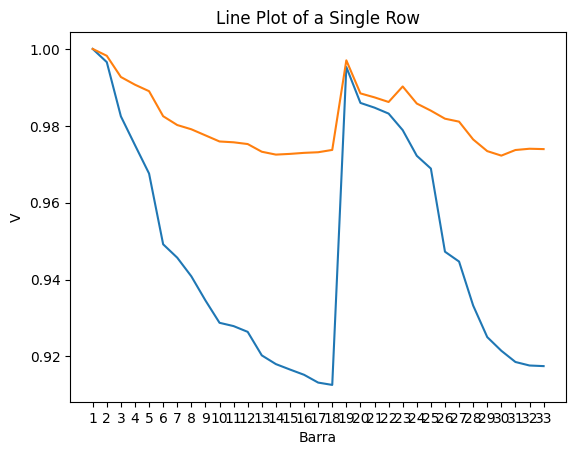

Tempo de processamento: 328836 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 2ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2496386399841668
Change     = 1.2496386399841668
-------------


Generation = 2
Fitness    = 1.2820949161943047
Change     = 0.03245627621013791
-------------


Generation = 3
Fitness    = 1.2882227778590216
Change     = 0.006127861664716905
-------------


Generation = 4
Fitness    = 1.2882227778590216
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2882227778590216
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2921853999270723
Change     = 0.003962622068050647
-------------


Generation = 7
Fitness    = 1.2921853999270723
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2942947588423828
Change     = 0.0021093589153104997
-------------


Generation = 9
Fitness    = 1.2965437009856582
Change     = 0.0022489421

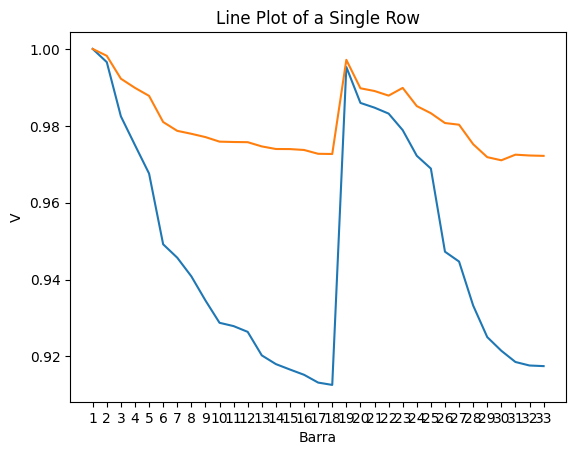

Tempo de processamento: 331708 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 3ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2581405420287546
Change     = 1.2581405420287546
-------------


Generation = 2
Fitness    = 1.2672836492511304
Change     = 0.009143107222375768
-------------


Generation = 3
Fitness    = 1.2672836492511304
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2672836492511304
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2672836492511304
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2672836492511304
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2672836492511304
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2867387564252273
Change     = 0.01945510717409693
-------------


Generation = 9
Fitness    = 1.2867387564252273
Change     = 0.0
-------------


Generation = 10
Fitness    

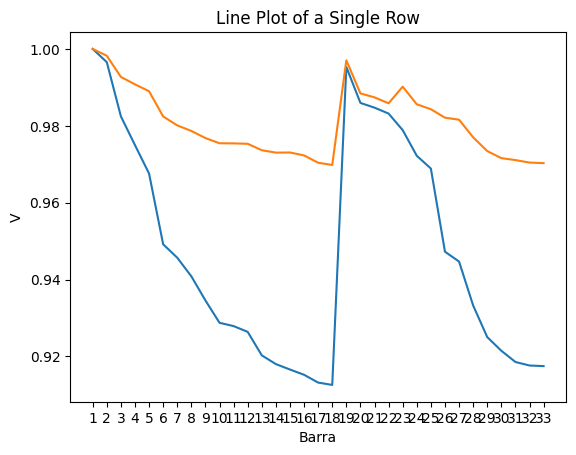

Tempo de processamento: 315109 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 4ªVEZ-----------------------------

Generation = 1
Fitness    = 1.210456100331182
Change     = 1.210456100331182
-------------


Generation = 2
Fitness    = 1.2471830495432519
Change     = 0.03672694921206987
-------------


Generation = 3
Fitness    = 1.2471830495432519
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2692721296895204
Change     = 0.022089080146268536
-------------


Generation = 5
Fitness    = 1.3009660213683893
Change     = 0.031693891678868935
-------------


Generation = 6
Fitness    = 1.3009660213683893
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3009660213683893
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3009660213683893
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3009660213683893
Change     = 0.0
-------------


Generation =

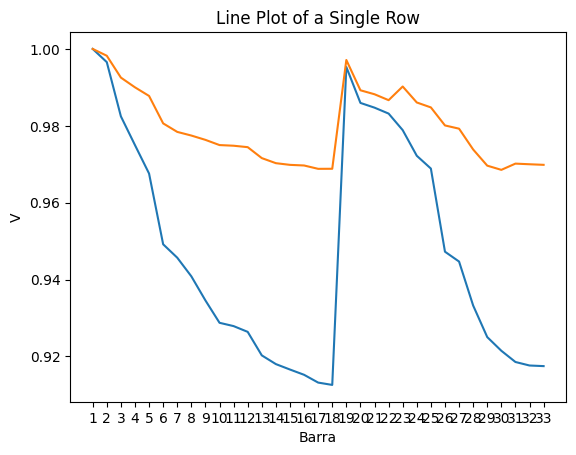

Tempo de processamento: 319694 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 5ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2626631432394224
Change     = 1.2626631432394224
-------------


Generation = 2
Fitness    = 1.2626631432394224
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2671681480912462
Change     = 0.004505004851823813
-------------


Generation = 4
Fitness    = 1.2671681480912462
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2751904589115353
Change     = 0.008022310820289036
-------------


Generation = 6
Fitness    = 1.2940458616042312
Change     = 0.01885540269269592
-------------


Generation = 7
Fitness    = 1.2940458616042312
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2940458616042312
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2940458616042312
Change     = 0.0
-------------


Generation

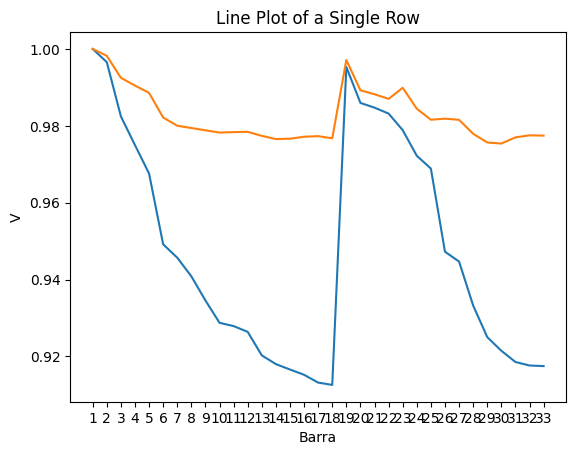

Tempo de processamento: 334334 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 6ªVEZ-----------------------------

Generation = 1
Fitness    = 1.234315440844132
Change     = 1.234315440844132
-------------


Generation = 2
Fitness    = 1.24385773674443
Change     = 0.009542295900297981
-------------


Generation = 3
Fitness    = 1.24385773674443
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.261729909805899
Change     = 0.017872173061469043
-------------


Generation = 5
Fitness    = 1.2651039848523982
Change     = 0.0033740750464992253
-------------


Generation = 6
Fitness    = 1.275837695004114
Change     = 0.010733710151715758
-------------


Generation = 7
Fitness    = 1.275837695004114
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.275837695004114
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.275837695004114
Change     = 0.0
-------------


Ge

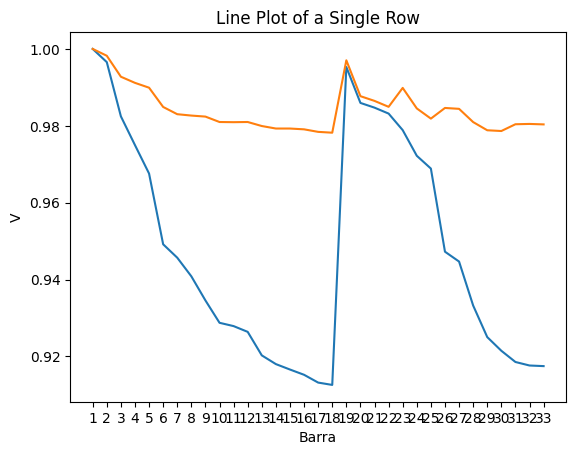

Tempo de processamento: 318752 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 7ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2472587181428707
Change     = 1.2472587181428707
-------------


Generation = 2
Fitness    = 1.2697136114783136
Change     = 0.022454893335442927
-------------


Generation = 3
Fitness    = 1.2697136114783136
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2855828943154775
Change     = 0.015869282837163823
-------------


Generation = 5
Fitness    = 1.2883091589714222
Change     = 0.0027262646559447212
-------------


Generation = 6
Fitness    = 1.3078348521333796
Change     = 0.019525693161957403
-------------


Generation = 7
Fitness    = 1.3078348521333796
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3078348521333796
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3078348521333796
Change     = 0.0
-------

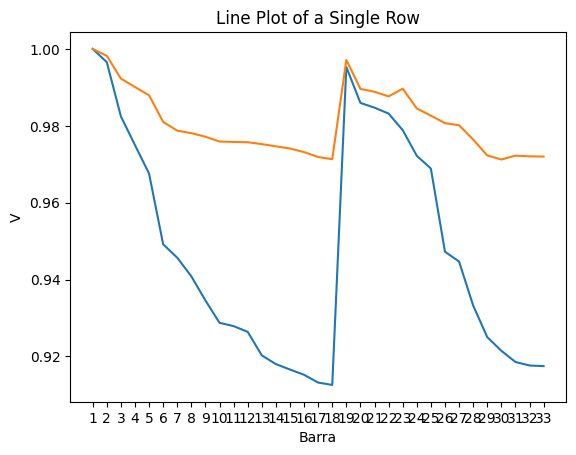

Tempo de processamento: 323481 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 8ªVEZ-----------------------------

Generation = 1
Fitness    = 1.22486394809712
Change     = 1.22486394809712
-------------


Generation = 2
Fitness    = 1.22486394809712
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2579435189164574
Change     = 0.033079570819337434
-------------


Generation = 4
Fitness    = 1.2870026888905945
Change     = 0.029059169974137156
-------------


Generation = 5
Fitness    = 1.2870026888905945
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2870026888905945
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2870026888905945
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2870026888905945
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2870026888905945
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.2

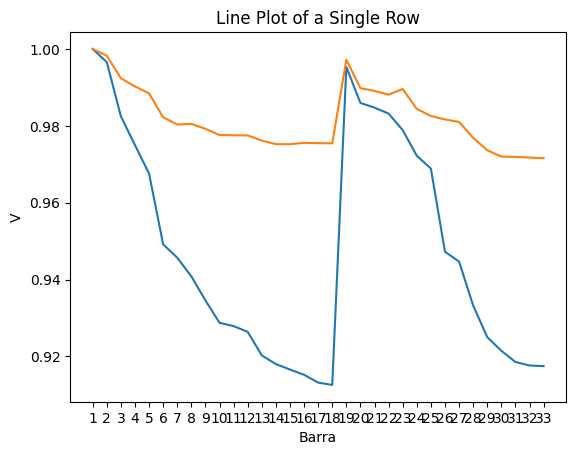

Tempo de processamento: 338704 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 9ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2946861896826571
Change     = 1.2946861896826571
-------------


Generation = 2
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2946861896826571
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.2946861896826571
Change     =

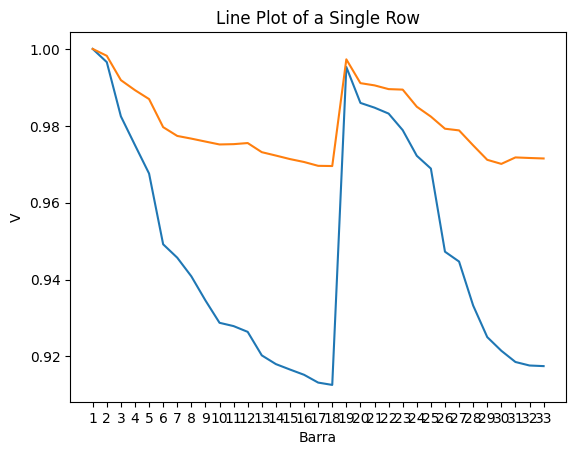

Tempo de processamento: 327968 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 10ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2156353245332894
Change     = 1.2156353245332894
-------------


Generation = 2
Fitness    = 1.2456261265416486
Change     = 0.02999080200835924
-------------


Generation = 3
Fitness    = 1.2549104853761222
Change     = 0.009284358834473538
-------------


Generation = 4
Fitness    = 1.2937533957862213
Change     = 0.03884291041009913
-------------


Generation = 5
Fitness    = 1.2937533957862213
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2937533957862213
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2937533957862213
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2937533957862213
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2937533957862213
Change     = 0.0
-------------


Generation

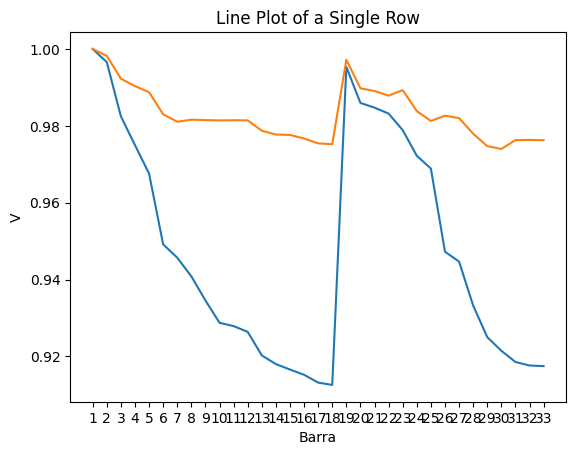

Tempo de processamento: 336603 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 11ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2594680984660473
Change     = 1.2594680984660473
-------------


Generation = 2
Fitness    = 1.2706041111920394
Change     = 0.011136012725992073
-------------


Generation = 3
Fitness    = 1.2862328428025067
Change     = 0.015628731610467295
-------------


Generation = 4
Fitness    = 1.301933630281469
Change     = 0.015700787478962308
-------------


Generation = 5
Fitness    = 1.301933630281469
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.301933630281469
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.301933630281469
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.301933630281469
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.301933630281469
Change     = 0.0
-------------


Generation = 1

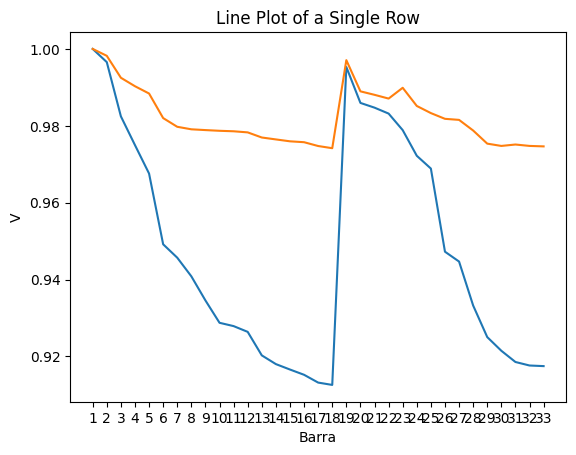

Tempo de processamento: 329894 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 12ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2112814394839662
Change     = 1.2112814394839662
-------------


Generation = 2
Fitness    = 1.2112814394839662
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2444976603633968
Change     = 0.03321622087943066
-------------


Generation = 4
Fitness    = 1.2444976603633968
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2617397178925454
Change     = 0.017242057529148536
-------------


Generation = 6
Fitness    = 1.2617397178925454
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2800226007764044
Change     = 0.018282882883859042
-------------


Generation = 8
Fitness    = 1.2800226007764044
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2800226007764044
Change     = 0.0
-------------


Generatio

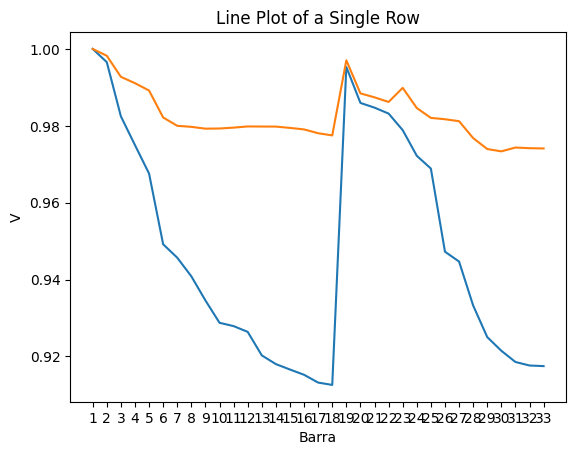

Tempo de processamento: 378562 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 13ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2311692580908438
Change     = 1.2311692580908438
-------------


Generation = 2
Fitness    = 1.2481156967745366
Change     = 0.016946438683692833
-------------


Generation = 3
Fitness    = 1.2481156967745366
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.291566436655583
Change     = 0.04345073988104642
-------------


Generation = 5
Fitness    = 1.291566436655583
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.291566436655583
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.291566436655583
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.291566436655583
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.291566436655583
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.2

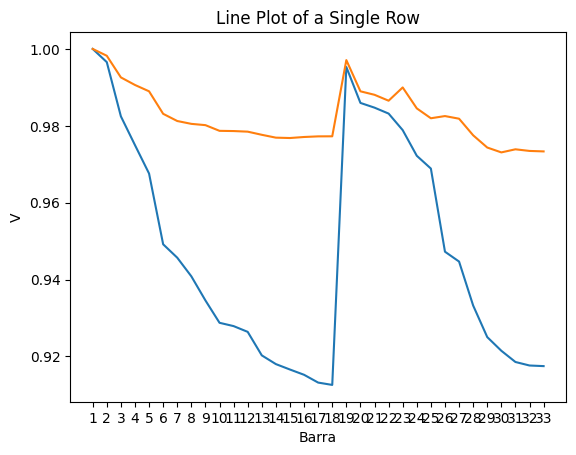

Tempo de processamento: 313592 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 14ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2409753512480974
Change     = 1.2409753512480974
-------------


Generation = 2
Fitness    = 1.2409753512480974
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2415804998880025
Change     = 0.0006051486399050177
-------------


Generation = 4
Fitness    = 1.2476201258826238
Change     = 0.006039625994621378
-------------


Generation = 5
Fitness    = 1.2669391855374184
Change     = 0.019319059654794524
-------------


Generation = 6
Fitness    = 1.2669391855374184
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2837277682954231
Change     = 0.016788582758004766
-------------


Generation = 8
Fitness    = 1.2837277682954231
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2837277682954231
Change     = 0.0
------

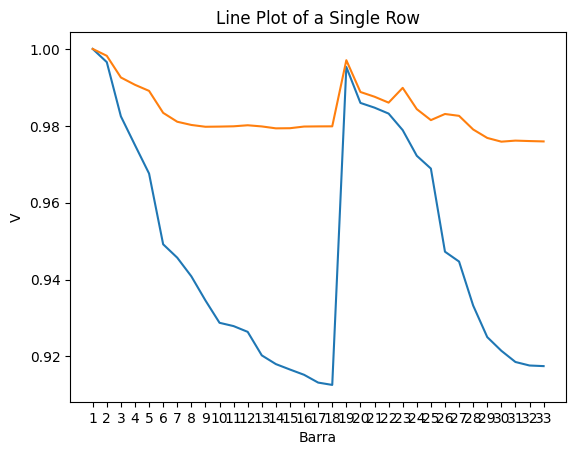

Tempo de processamento: 343848 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 15ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2585226458861267
Change     = 1.2585226458861267
-------------


Generation = 2
Fitness    = 1.2585226458861267
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2652547735597721
Change     = 0.006732127673645394
-------------


Generation = 4
Fitness    = 1.2711343300130997
Change     = 0.005879556453327606
-------------


Generation = 5
Fitness    = 1.2711343300130997
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2711343300130997
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3051680169610516
Change     = 0.034033686947951836
-------------


Generation = 8
Fitness    = 1.3051680169610516
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3051680169610516
Change     = 0.0
-------------


Generati

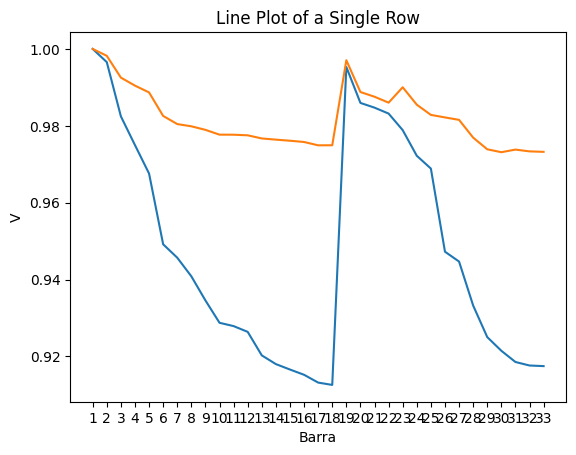

Tempo de processamento: 352096 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 16ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2785637186694903
Change     = 1.2785637186694903
-------------


Generation = 2
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2785637186694903
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.2785637186694903
Change     

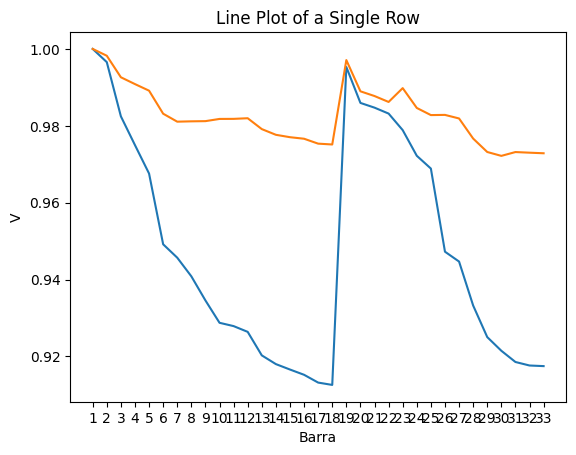

Tempo de processamento: 385981 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 17ªVEZ-----------------------------

Generation = 1
Fitness    = 1.250245793288911
Change     = 1.250245793288911
-------------


Generation = 2
Fitness    = 1.250245793288911
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.250245793288911
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.251249392787521
Change     = 0.0010035994986099528
-------------


Generation = 5
Fitness    = 1.2600513743276898
Change     = 0.008801981540168757
-------------


Generation = 6
Fitness    = 1.2600513743276898
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2689796372781301
Change     = 0.008928262950440358
-------------


Generation = 8
Fitness    = 1.2689796372781301
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2753256260647952
Change     = 0.0063459887866650355
----------

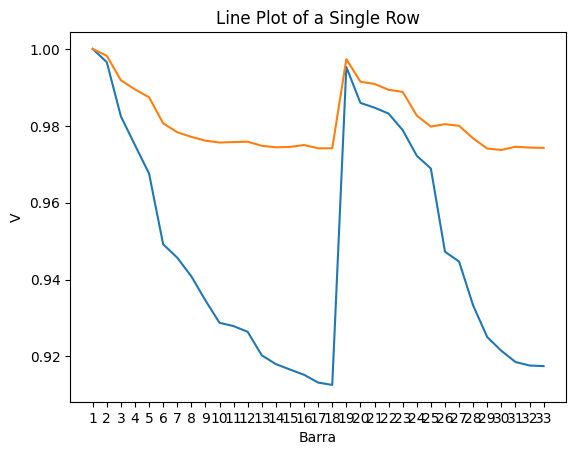

Tempo de processamento: 342800 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 18ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2137009839190533
Change     = 1.2137009839190533
-------------


Generation = 2
Fitness    = 1.2137009839190533
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2343814052893474
Change     = 0.020680421370294022
-------------


Generation = 4
Fitness    = 1.2462018622671658
Change     = 0.011820456977818417
-------------


Generation = 5
Fitness    = 1.2705283987871376
Change     = 0.024326536519971853
-------------


Generation = 6
Fitness    = 1.2705283987871376
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2705283987871376
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2705283987871376
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2841469079150776
Change     = 0.013618509127939937
-------

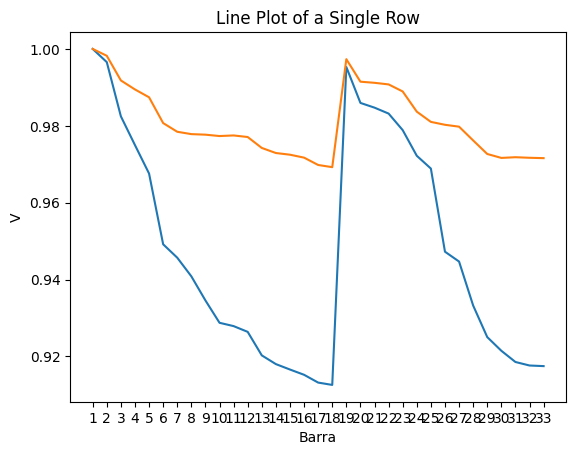

Tempo de processamento: 354617 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 19ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2268995101550675
Change     = 1.2268995101550675
-------------


Generation = 2
Fitness    = 1.2448060666806668
Change     = 0.01790655652559936
-------------


Generation = 3
Fitness    = 1.2596649819820844
Change     = 0.014858915301417586
-------------


Generation = 4
Fitness    = 1.2596649819820844
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2689756304958721
Change     = 0.009310648513787712
-------------


Generation = 6
Fitness    = 1.2689756304958721
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2689756304958721
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2689756304958721
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2689756304958721
Change     = 0.0
-------------


Generatio

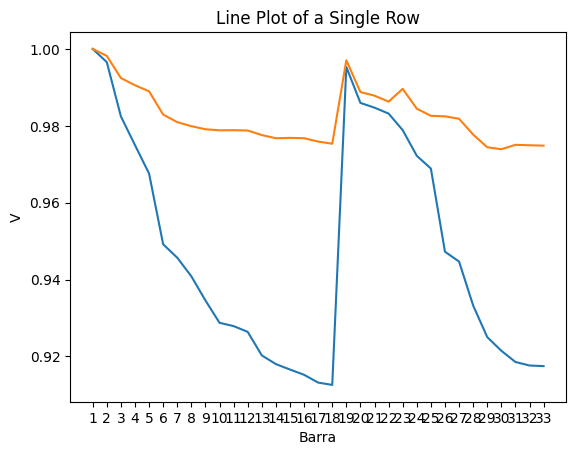

Tempo de processamento: 350674 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 20ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2545060690670402
Change     = 1.2545060690670402
-------------


Generation = 2
Fitness    = 1.2545060690670402
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2744213363167685
Change     = 0.019915267249728252
-------------


Generation = 4
Fitness    = 1.2744213363167685
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2744213363167685
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2744213363167685
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2744213363167685
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2744213363167685
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2878825225832182
Change     = 0.013461186266449765
-------------


Generation = 10
Fitness  

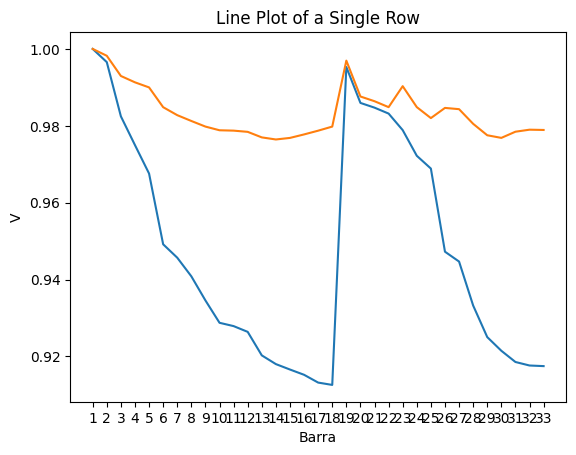

Tempo de processamento: 332924 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 21ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2413246501630597
Change     = 1.2413246501630597
-------------


Generation = 2
Fitness    = 1.2751931427148193
Change     = 0.03386849255175961
-------------


Generation = 3
Fitness    = 1.2751931427148193
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2751931427148193
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2870056683477311
Change     = 0.011812525632911797
-------------


Generation = 6
Fitness    = 1.2870056683477311
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2870056683477311
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2870056683477311
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2870056683477311
Change     = 0.0
-------------


Generation = 10
Fitness   

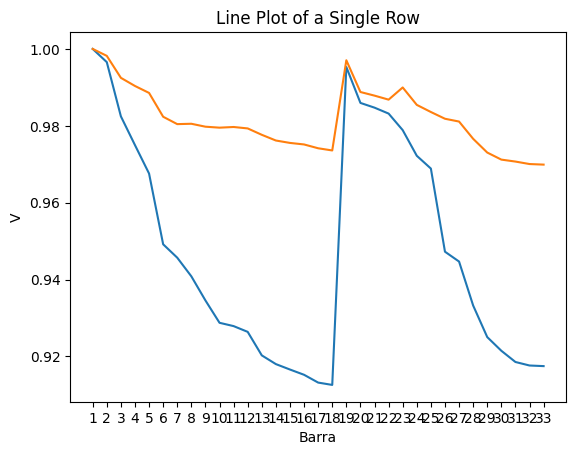

Tempo de processamento: 344669 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 22ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2525363845705106
Change     = 1.2525363845705106
-------------


Generation = 2
Fitness    = 1.2649753174297869
Change     = 0.01243893285927622
-------------


Generation = 3
Fitness    = 1.2649753174297869
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2649753174297869
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2677700215920475
Change     = 0.002794704162260686
-------------


Generation = 6
Fitness    = 1.2677700215920475
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2913624357054687
Change     = 0.023592414113421167
-------------


Generation = 8
Fitness    = 1.2913624357054687
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2996757434168569
Change     = 0.008313307711388163
--------

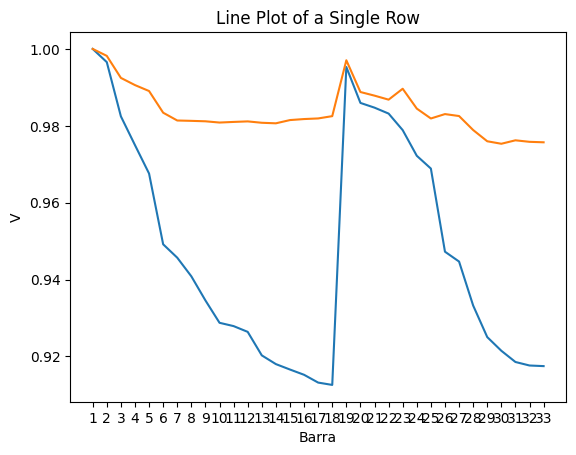

Tempo de processamento: 358610 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 23ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2359797677945241
Change     = 1.2359797677945241
-------------


Generation = 2
Fitness    = 1.2368976226984403
Change     = 0.0009178549039161599
-------------


Generation = 3
Fitness    = 1.2583881950884748
Change     = 0.02149057239003449
-------------


Generation = 4
Fitness    = 1.2698867810148873
Change     = 0.011498585926412508
-------------


Generation = 5
Fitness    = 1.2698867810148873
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2780984755390632
Change     = 0.008211694524175916
-------------


Generation = 7
Fitness    = 1.2780984755390632
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2780984755390632
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2780984755390632
Change     = 0.0
-------

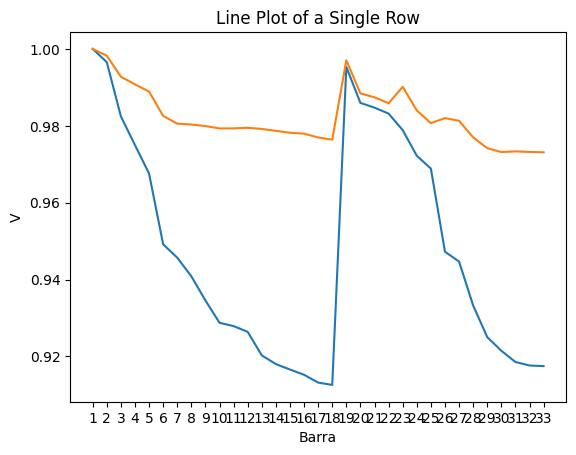

Tempo de processamento: 327984 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 24ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2268297278047486
Change     = 1.2268297278047486
-------------


Generation = 2
Fitness    = 1.2449351574821694
Change     = 0.018105429677420792
-------------


Generation = 3
Fitness    = 1.2524829535897213
Change     = 0.007547796107551852
-------------


Generation = 4
Fitness    = 1.256293731855037
Change     = 0.0038107782653156175
-------------


Generation = 5
Fitness    = 1.2579690146874403
Change     = 0.0016752828324033686
-------------


Generation = 6
Fitness    = 1.2644457833334626
Change     = 0.006476768646022313
-------------


Generation = 7
Fitness    = 1.2644457833334626
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2644457833334626
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2644457833334626
Change

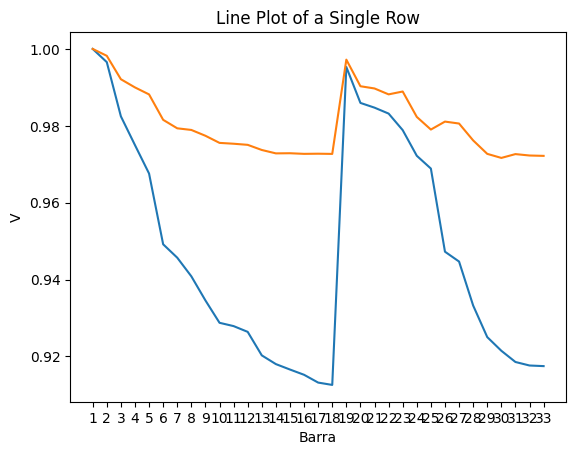

Tempo de processamento: 309482 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 25ªVEZ-----------------------------

Generation = 1
Fitness    = 1.254423372150089
Change     = 1.254423372150089
-------------


Generation = 2
Fitness    = 1.254423372150089
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2552586366057812
Change     = 0.0008352644556921529
-------------


Generation = 4
Fitness    = 1.2573028969521158
Change     = 0.0020442603463346476
-------------


Generation = 5
Fitness    = 1.2573503246907356
Change     = 4.7427738619765236e-05
-------------


Generation = 6
Fitness    = 1.2573503246907356
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.268418390287926
Change     = 0.011068065597190424
-------------


Generation = 8
Fitness    = 1.268418390287926
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.268418390287926
Change     = 0.0
---------

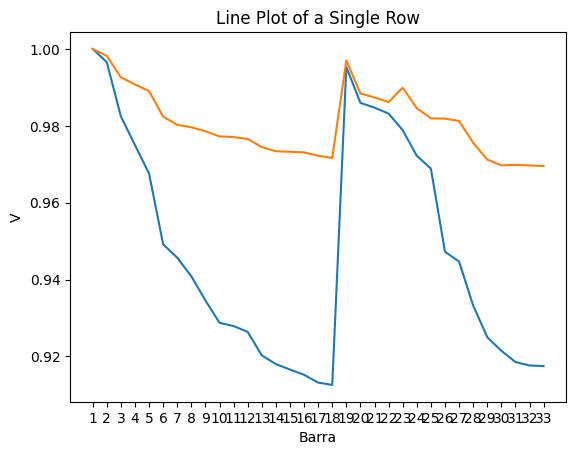

Tempo de processamento: 335003 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 26ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1858753923243013
Change     = 1.1858753923243013
-------------


Generation = 2
Fitness    = 1.2309834958032773
Change     = 0.04510810347897598
-------------


Generation = 3
Fitness    = 1.2335240601185178
Change     = 0.0025405643152405233
-------------


Generation = 4
Fitness    = 1.250549378813077
Change     = 0.017025318694559255
-------------


Generation = 5
Fitness    = 1.250549378813077
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.250549378813077
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.250549378813077
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2563043851533597
Change     = 0.005755006340282698
-------------


Generation = 9
Fitness    = 1.2617573651277465
Change     = 0.0054529799743

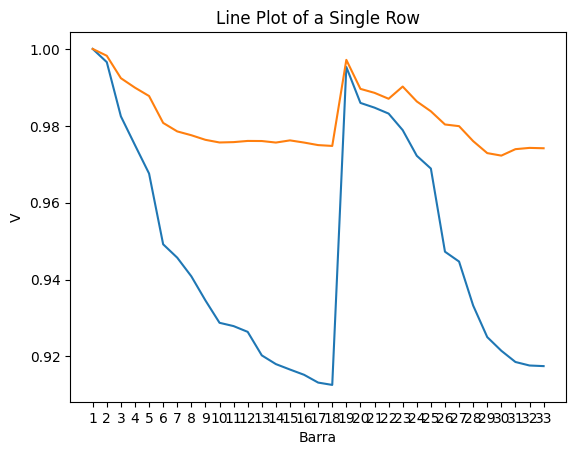

Tempo de processamento: 337289 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 27ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2257106671509048
Change     = 1.2257106671509048
-------------


Generation = 2
Fitness    = 1.2257106671509048
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2257106671509048
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2343490653137428
Change     = 0.008638398162837957
-------------


Generation = 5
Fitness    = 1.238598704870642
Change     = 0.004249639556899165
-------------


Generation = 6
Fitness    = 1.238598704870642
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.238598704870642
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2646034043978633
Change     = 0.026004699527221398
-------------


Generation = 9
Fitness    = 1.2646034043978633
Change     = 0.0
-------------


Generation 

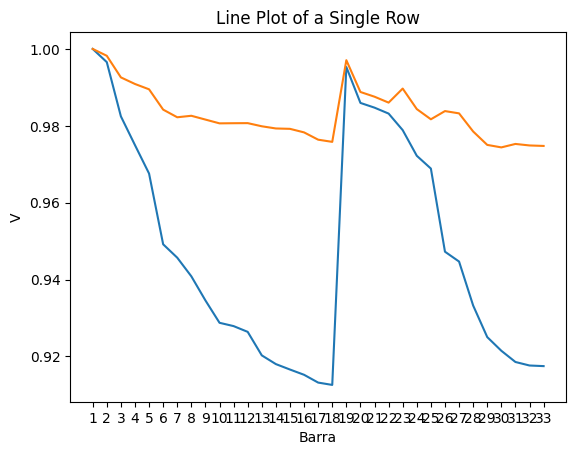

Tempo de processamento: 382247 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 28ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2686556670335554
Change     = 1.2686556670335554
-------------


Generation = 2
Fitness    = 1.2686556670335554
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2686556670335554
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2686556670335554
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.284706168891372
Change     = 0.016050501857816535
-------------


Generation = 6
Fitness    = 1.284706168891372
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.284706168891372
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2932907563023295
Change     = 0.008584587410957578
-------------


Generation = 9
Fitness    = 1.2932907563023295
Change     = 0.0
-------------


Generation = 10
Fitness    =

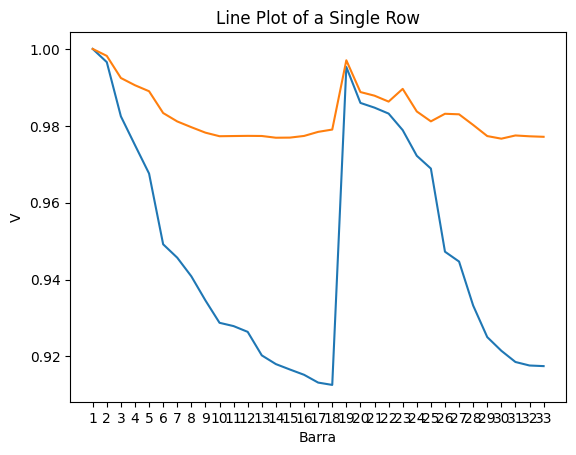

Tempo de processamento: 327822 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 29ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2116047561889338
Change     = 1.2116047561889338
-------------


Generation = 2
Fitness    = 1.2116047561889338
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.223181293833387
Change     = 0.011576537644453211
-------------


Generation = 4
Fitness    = 1.2688537889214344
Change     = 0.04567249508804738
-------------


Generation = 5
Fitness    = 1.2688537889214344
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2688537889214344
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2688537889214344
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2688537889214344
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2688537889214344
Change     = 0.0
-------------


Generation = 10
Fitness    

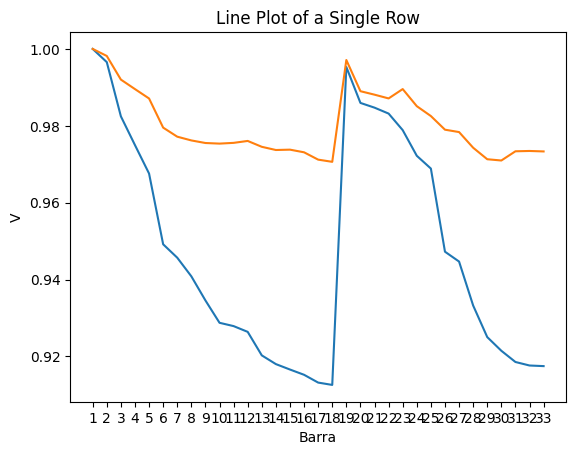

Tempo de processamento: 351257 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 30ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2264790265382413
Change     = 1.2264790265382413
-------------


Generation = 2
Fitness    = 1.2264790265382413
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.278875042965156
Change     = 0.052396016426914827
-------------


Generation = 4
Fitness    = 1.278875042965156
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.278875042965156
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2860890694720486
Change     = 0.0072140265068925125
-------------


Generation = 7
Fitness    = 1.2863060569955835
Change     = 0.00021698752353493944
-------------


Generation = 8
Fitness    = 1.2863060569955835
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2863060569955835
Change     = 0.0
-------------


Generati

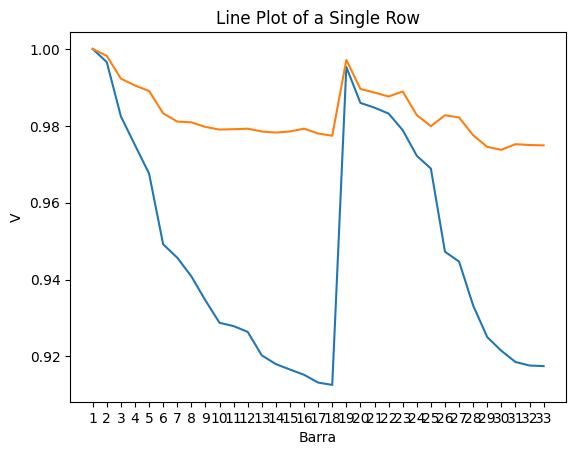

Tempo de processamento: 355565 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------




     Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.311005           328836    76.041649       1.0  0.972241  0.646524   
1   1.314779           331708    74.504088       1.0  0.971026  0.653671   
2   1.299016           315109    75.770522       1.0  0.969814  0.647784   
3   1.300966           319694    74.443174       1.0  0.968537  0.653954   
4   1.310491           334334    78.692005       1.0  0.975382  0.634204   
5   1.307005           318752    81.508051       1.0  0.978205  0.621113   
6   1.307835           323481    75.670903       1.0  0.971235  0.648247   
7   1.316086           338704    74.778253       1.0  0.971589  0.652397   
8   1.306297           327968    74.494955       1.0  0.969532  0.653713   
9   1.305416           336603    78.268892       1.0  0.973979  0.636170   
10  1.317828           329894    76.64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.311005           328836    76.041649       1.0  0.972241  0.646524   
1   1.314779           331708    74.504088       1.0  0.971026  0.653671   
2   1.299016           315109    75.770522       1.0  0.969814  0.647784   
3   1.300966           319694    74.443174       1.0  0.968537  0.653954   
4   1.310491           334334    78.692005       1.0  0.975382  0.634204   
5   1.307005           318752    81.508051       1.0  0.978205  0.621113   
6   1.307835           323481    75.670903       1.0  0.971235  0.648247   
7   1.316086           338704    74.778253       1.0  0.971589  0.652397   
8   1.306297           327968    74.494955       1.0  0.969532  0.653713   
9   1.305416           336603    78.268892       1.0  0.973979  0.636170   
10  1.317828           329894    76.646170       1.0  0.974171  0.643714   
11  1.301229           378562    78.354841       1.0  0.973352  0.635771   
12  1.311918           313592    76.599019       1.0  0.973080  0.643933   
13  1.309924           343848    79.175029       1.0  0.975872  0.631958   
14  1.317370           352096    75.857849       1.0  0.973130  0.647378   
15  1.301661           385981    77.328581       1.0  0.972176  0.640541   
16  1.306196           342800    77.943999       1.0  0.973719  0.637681   
17  1.298134           354617    75.423045       1.0  0.969237  0.649399   
18  1.312745           350674    77.155725       1.0  0.973903  0.641345   
19  1.296448           332924    81.575578       1.0  0.976442  0.620799   
20  1.301893           344669    75.429358       1.0  0.969901  0.649370   
21  1.310281           358610    78.677681       1.0  0.975328  0.634270   
22  1.295616           327984    78.955808       1.0  0.973103  0.632977   
23  1.291744           309482    78.313779       1.0  0.971643  0.635962   
24  1.291123           335003    76.670240       1.0  0.969531  0.643602   
25  1.314007           337289    75.612727       1.0  0.972243  0.648518   
26  1.309570           382247    78.004205       1.0  0.974382  0.637401   
27  1.305290           327822    80.478317       1.0  0.976650  0.625900   
28  1.283880           351257    78.607224       1.0  0.970626  0.634598   
29  1.298393           355565    79.094559       1.0  0.973757  0.632332   

        fit2  
0   0.682438  
1   0.668545  
2   0.654680  
3   0.640070  
4   0.718371  
5   0.750670  
6   0.670928  
7   0.674982  
8   0.651453  
9   0.702320  
10  0.704515  
11  0.695145  
12  0.692038  
13  0.723973  
14  0.692607  
15  0.681697  
16  0.699349  
17  0.648071  
18  0.701456  
19  0.730498  
20  0.655676  
21  0.717751  
22  0.692299  
23  0.675603  
24  0.651441  
25  0.682461  
26  0.706937  
27  0.732880  
28  0.663967  
29  0.699788

In [ ]:
Tipo_fp = "Unitário" #Q>0
fp=1
#parametrização
num_generations = 30 #Número de Gerações
num_parents_mating = 26 #Número de soluções que gerarão filhos

sol_per_pop = 50 #quantidade de soluções por população
num_genes = 32 #numero de genes de cada solução (é o numero de nós que dá pra colocar GD)
gene_space = [0, 0, 0, 0, 0, 0.075, 0.11, 0.125, 0.250, 0.35] #define as potências de GD que podem ser inseridas

last_fitness = 0
alfa = 1.5
beta = 0.5

P_Types = ["uniform", "random"]

Resultado_FP_Unit = [None for _ in range(30)] #cria o vetor que vai armazenar os resultados de cada execução do alg em um vet vazio

for i in range(0,30):
  print(f"\n-----------------------------RODANDO PELA {i+1}ªVEZ-----------------------------\n")
  last_fitness = 0
  Resultado_FP_Unit[i] = Genetico_Total(num_generations, num_parents_mating, sol_per_pop, num_genes, gene_space, fitness_func, IEEE_network, Perda_Total_Init, Vdev_max_Init, Total_P, P_GD_Max, on_generation, fp, Tipo_fp, alfa, beta, P_Types)


#display(Resultado_FP_Unit)
# Extract the strings and the integers from the second element of each inner list
Lista_Resultados_1 = [[item[1], item[2], item[3], item[4], item[5], item[6], item[7]] for item in Resultado_FP_Unit]
Lista_GDs_1 = [item[0] for item in Resultado_FP_Unit]
# Create a DataFrame with the extracted data
Lista_Nomes_1 = [f"Gerador nó {i+2}" for i in range (32)]
# Create a DataFrame with the extracted data
df_Lista_Resultados_1 = pd.DataFrame(Lista_Resultados_1, columns=['Fitness', 'Tempo Exec (ms)', 'Perda_Total', 'Vmax_Sol', 'Vmin_Sol', 'fit1', 'fit2'])
df_Lista_GDs_1 = pd.DataFrame(Lista_GDs_1, columns = Lista_Nomes_1)

print(df_Lista_Resultados_1)

#cria os csv's
df_Lista_Resultados_1.to_csv('Fitness_75_25.csv')
df_Lista_GDs_1.to_csv('Soluções_75_25.csv')

files.download('Fitness_75_25.csv')
files.download('Soluções_75_25.csv')
display(df_Lista_Resultados_1)

### 30X 100/0 ok


-----------------------------RODANDO PELA 1ªVEZ-----------------------------

Generation = 1
Fitness    = 1.288045331059997
Change     = 1.288045331059997
-------------


Generation = 2
Fitness    = 1.288045331059997
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.288045331059997
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2912827589140732
Change     = 0.0032374278540761026
-------------


Generation = 5
Fitness    = 1.294477691879996
Change     = 0.003194932965922881
-------------


Generation = 6
Fitness    = 1.3024246565910063
Change     = 0.007946964711010196
-------------


Generation = 7
Fitness    = 1.3089434329993141
Change     = 0.006518776408307891
-------------


Generation = 8
Fitness    = 1.3089434329993141
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3089434329993141
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.3089434329993141
Change     = 0.0
-------------


Generation = 11
Fitness    = 1.3089434329

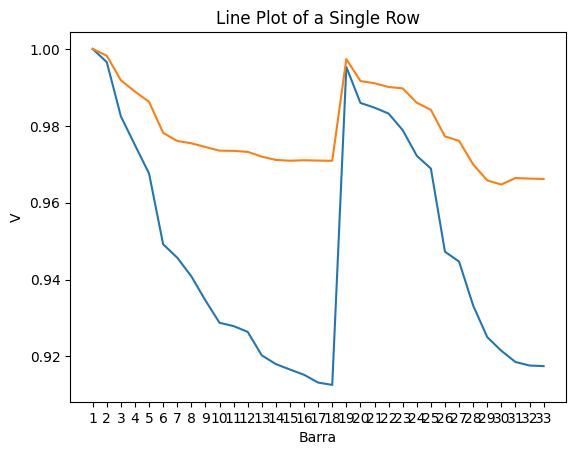

Tempo de processamento: 349850 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 2ªVEZ-----------------------------

Generation = 1
Fitness    = 1.25757478285175
Change     = 1.25757478285175
-------------


Generation = 2
Fitness    = 1.25757478285175
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.25757478285175
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2656771133375784
Change     = 0.008102330485828313
-------------


Generation = 5
Fitness    = 1.2656771133375784
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2656771133375784
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2656771133375784
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2656771133375784
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2656771133375784
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.2656771133375784
Cha

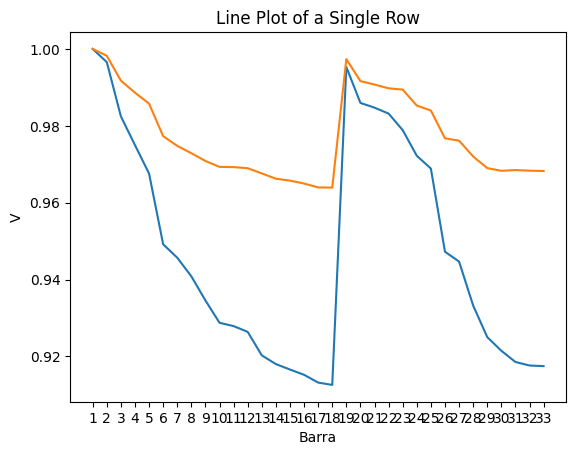

Tempo de processamento: 326147 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 3ªVEZ-----------------------------

Generation = 1
Fitness    = 1.229890406415839
Change     = 1.229890406415839
-------------


Generation = 2
Fitness    = 1.2796740198800767
Change     = 0.049783613464237764
-------------


Generation = 3
Fitness    = 1.2878022654150136
Change     = 0.008128245534936962
-------------


Generation = 4
Fitness    = 1.2878022654150136
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2922988917958893
Change     = 0.004496626380875668
-------------


Generation = 6
Fitness    = 1.2922988917958893
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2922988917958893
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2922988917958893
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2922988917958893
Change     = 0.0
-------------


Generation 

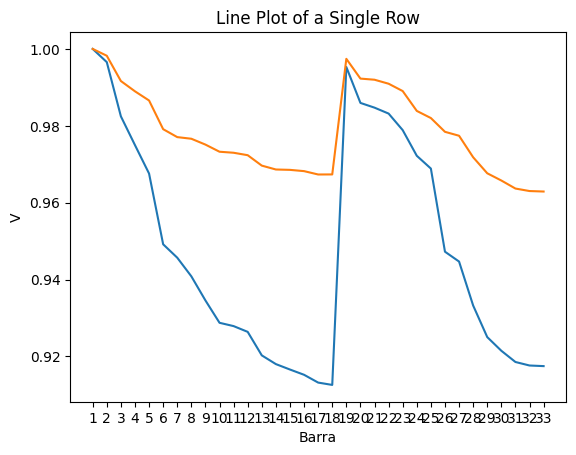

Tempo de processamento: 373402 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 4ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2414055535838018
Change     = 1.2414055535838018
-------------


Generation = 2
Fitness    = 1.2414055535838018
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2414055535838018
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2809483328684157
Change     = 0.039542779284613916
-------------


Generation = 5
Fitness    = 1.2809483328684157
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2809483328684157
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2809483328684157
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2809483328684157
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2878068816640824
Change     = 0.006858548795666719
-------------


Generation = 10
Fitness   

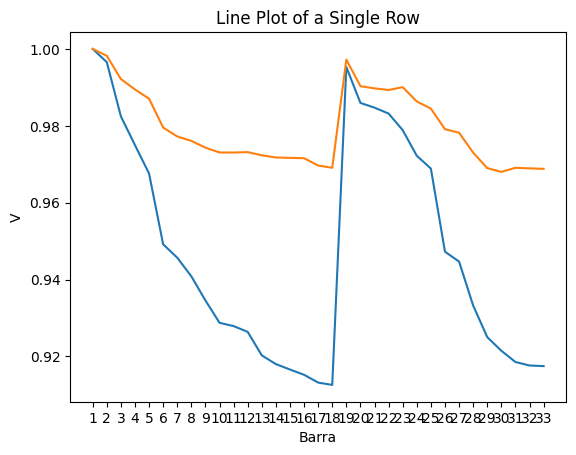

Tempo de processamento: 309009 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 5ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2520486412024192
Change     = 1.2520486412024192
-------------


Generation = 2
Fitness    = 1.2520486412024192
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2520486412024192
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2628224090121747
Change     = 0.010773767809755475
-------------


Generation = 5
Fitness    = 1.2713945931634296
Change     = 0.008572184151254936
-------------


Generation = 6
Fitness    = 1.2713945931634296
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2713945931634296
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2823083985139196
Change     = 0.010913805350490025
-------------


Generation = 9
Fitness    = 1.2823083985139196
Change     = 0.0
-------------


Generatio

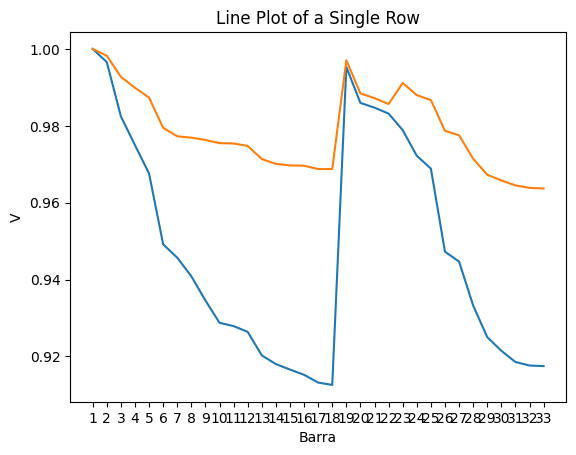

Tempo de processamento: 340841 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 6ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2431659336939636
Change     = 1.2431659336939636
-------------


Generation = 2
Fitness    = 1.2641602910295413
Change     = 0.02099435733557775
-------------


Generation = 3
Fitness    = 1.2641602910295413
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2641602910295413
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2641602910295413
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.281036604948501
Change     = 0.016876313918959607
-------------


Generation = 7
Fitness    = 1.281036604948501
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2907549903371698
Change     = 0.009718385388668871
-------------


Generation = 9
Fitness    = 1.3029109441806481
Change     = 0.01215595384347834
------------

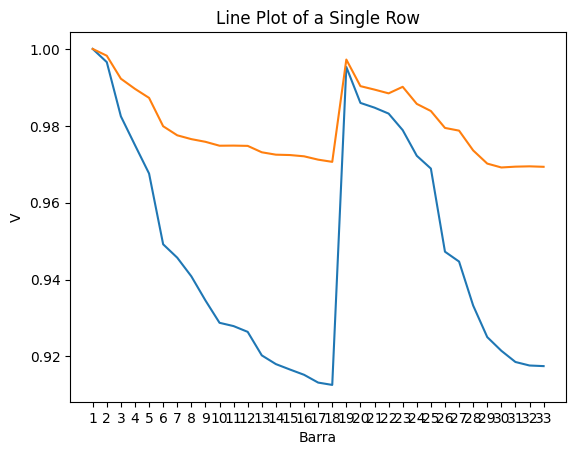

Tempo de processamento: 333630 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 7ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2224609448586405
Change     = 1.2224609448586405
-------------


Generation = 2
Fitness    = 1.2494405349320892
Change     = 0.026979590073448634
-------------


Generation = 3
Fitness    = 1.2663432107719497
Change     = 0.016902675839860493
-------------


Generation = 4
Fitness    = 1.2663432107719497
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2663432107719497
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2663432107719497
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2663432107719497
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.277661173789176
Change     = 0.011317963017226429
-------------


Generation = 9
Fitness    = 1.2826544750286164
Change     = 0.0049933012394403065
--------

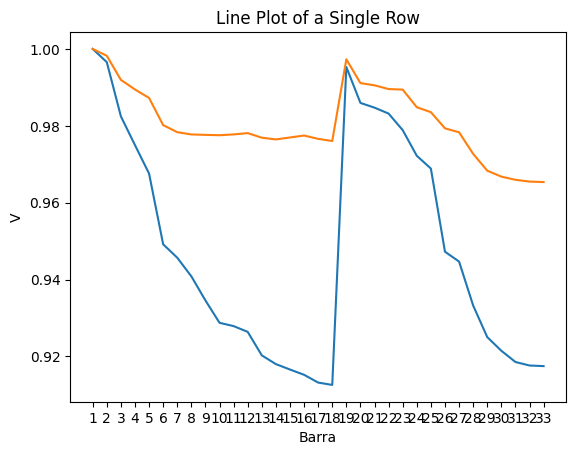

Tempo de processamento: 336914 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 8ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2834587895883045
Change     = 1.2834587895883045
-------------


Generation = 2
Fitness    = 1.2834587895883045
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2834587895883045
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2834587895883045
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2848037048726288
Change     = 0.001344915284324344
-------------


Generation = 6
Fitness    = 1.2848037048726288
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2848037048726288
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2848037048726288
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2848037048726288
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.284803704872

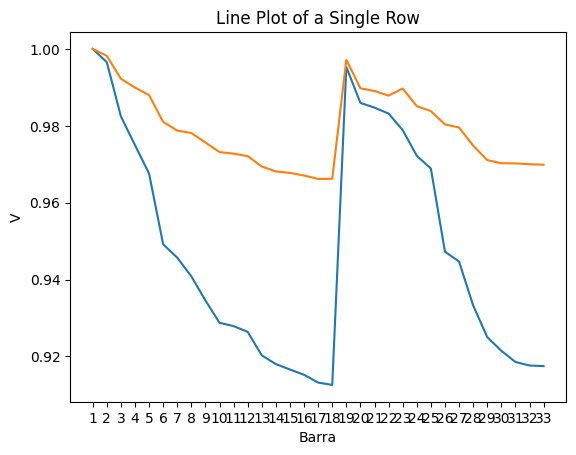

Tempo de processamento: 272495 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 9ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2849674737941525
Change     = 1.2849674737941525
-------------


Generation = 2
Fitness    = 1.2915207702990656
Change     = 0.0065532965049130976
-------------


Generation = 3
Fitness    = 1.2915207702990656
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2915207702990656
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3084079235965163
Change     = 0.016887153297450608
-------------


Generation = 6
Fitness    = 1.3084079235965163
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3084079235965163
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3139874899071982
Change     = 0.005579566310681905
-------------


Generation = 9
Fitness    = 1.3139874899071982
Change     = 0.0
-------------


Generati

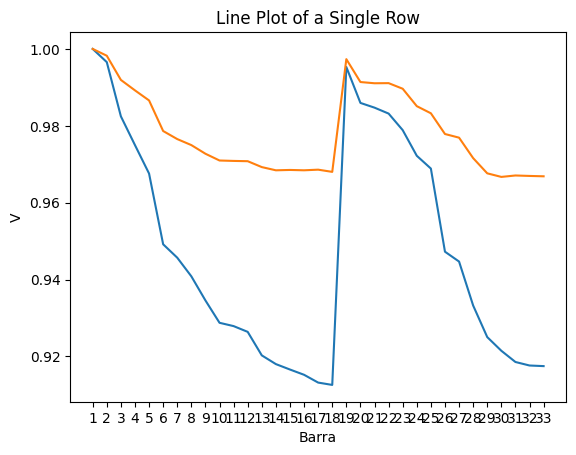

Tempo de processamento: 298855 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 10ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2386562902406526
Change     = 1.2386562902406526
-------------


Generation = 2
Fitness    = 1.2500938499050207
Change     = 0.011437559664368102
-------------


Generation = 3
Fitness    = 1.2731631894763784
Change     = 0.023069339571357705
-------------


Generation = 4
Fitness    = 1.2731631894763784
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2731631894763784
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.284923568375841
Change     = 0.011760378899462687
-------------


Generation = 7
Fitness    = 1.284923568375841
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.284923568375841
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2914830681048075
Change     = 0.006559499728966411
----------

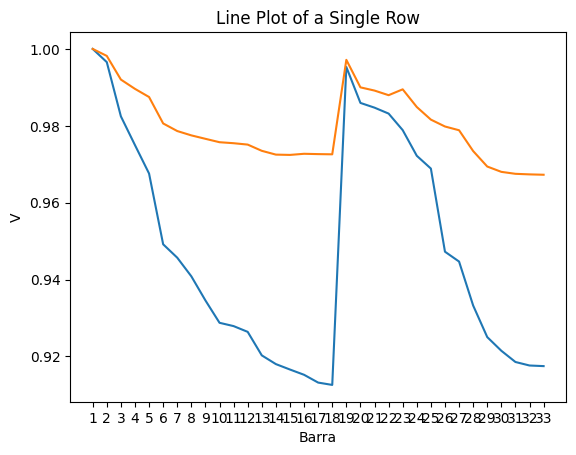

Tempo de processamento: 316573 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 11ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2504994138053278
Change     = 1.2504994138053278
-------------


Generation = 2
Fitness    = 1.2534882885798502
Change     = 0.0029888747745223654
-------------


Generation = 3
Fitness    = 1.2846362706529835
Change     = 0.031147982073133296
-------------


Generation = 4
Fitness    = 1.2846362706529835
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2846362706529835
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2846362706529835
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2846362706529835
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2846362706529835
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2846362706529835
Change     = 0.0
-------------


Generation = 10
Fitness 

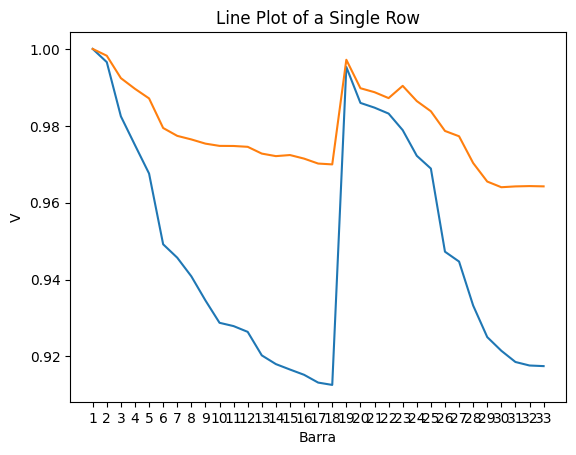

Tempo de processamento: 299901 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 12ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2578953004124198
Change     = 1.2578953004124198
-------------


Generation = 2
Fitness    = 1.2578953004124198
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2578953004124198
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2647133289093586
Change     = 0.006818028496938799
-------------


Generation = 5
Fitness    = 1.2647133289093586
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2647133289093586
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2647133289093586
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.266942086760028
Change     = 0.0022287578506694494
-------------


Generation = 9
Fitness    = 1.2757634824760398
Change     = 0.008821395716011704
-------------


Generati

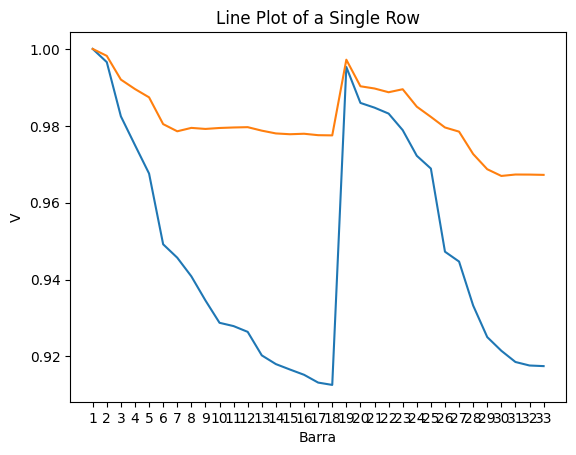

Tempo de processamento: 327063 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 13ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2743559531243522
Change     = 1.2743559531243522
-------------


Generation = 2
Fitness    = 1.2743559531243522
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2743559531243522
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.281463573927168
Change     = 0.007107620802815795
-------------


Generation = 5
Fitness    = 1.281463573927168
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.281463573927168
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2936617841386078
Change     = 0.012198210211439742
-------------


Generation = 8
Fitness    = 1.2936617841386078
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3020970914210204
Change     = 0.008435307282412596
-------------


Generation 

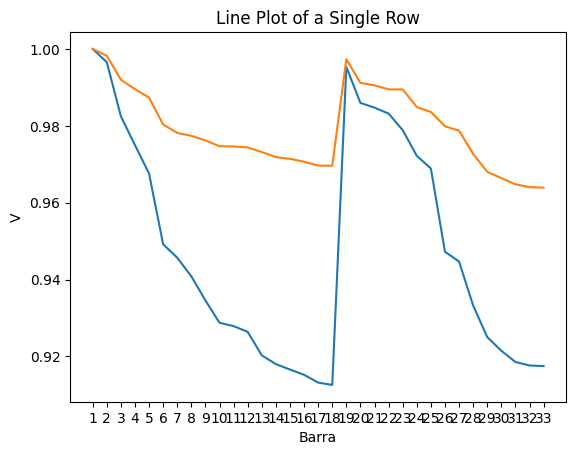

Tempo de processamento: 339722 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 14ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2809004854340529
Change     = 1.2809004854340529
-------------


Generation = 2
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2809004854340529
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2810295874358855
Change     = 0.0001291020018325817
-------------


Generation = 10
Fitness    = 1.2810295874

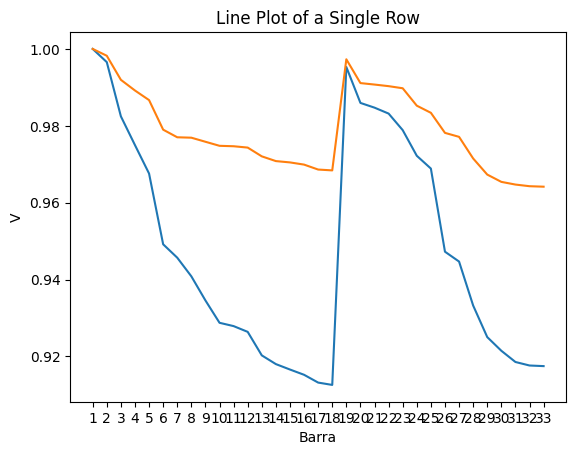

Tempo de processamento: 318058 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 15ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2592693775289976
Change     = 1.2592693775289976
-------------


Generation = 2
Fitness    = 1.2829341966095424
Change     = 0.023664819080544852
-------------


Generation = 3
Fitness    = 1.2829341966095424
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2829341966095424
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2829341966095424
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2829341966095424
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.296261065904771
Change     = 0.013326869295228638
-------------


Generation = 8
Fitness    = 1.296261065904771
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.296261065904771
Change     = 0.0
-------------


Generation = 10
Fitness    =

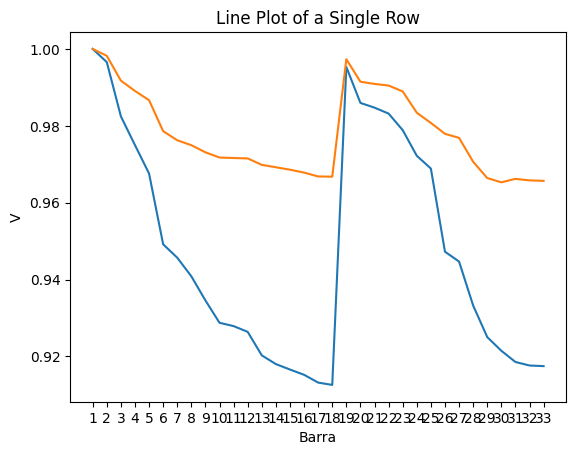

Tempo de processamento: 348670 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 16ªVEZ-----------------------------

Generation = 1
Fitness    = 1.268380528131789
Change     = 1.268380528131789
-------------


Generation = 2
Fitness    = 1.268380528131789
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.268380528131789
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2882274435824814
Change     = 0.019846915450692393
-------------


Generation = 5
Fitness    = 1.2882274435824814
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2882274435824814
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2882274435824814
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2882274435824814
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2882274435824814
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.288227443582481

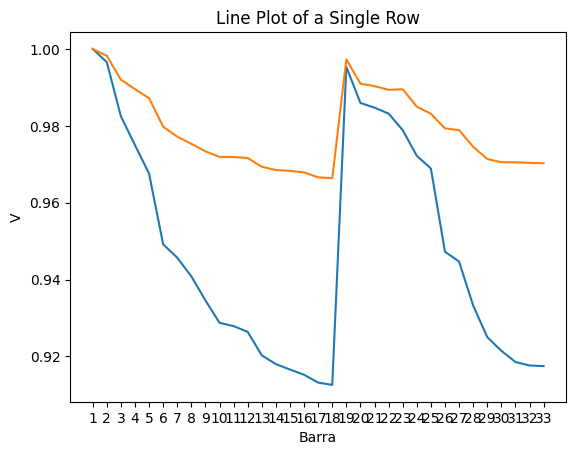

Tempo de processamento: 299760 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 17ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2484271040448347
Change     = 1.2484271040448347
-------------


Generation = 2
Fitness    = 1.2484271040448347
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2485477987908702
Change     = 0.00012069474603548791
-------------


Generation = 4
Fitness    = 1.2485477987908702
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2682129464174485
Change     = 0.01966514762657834
-------------


Generation = 6
Fitness    = 1.2682129464174485
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.273072700259747
Change     = 0.004859753842298531
-------------


Generation = 8
Fitness    = 1.2813750244511255
Change     = 0.00830232419137844
-------------


Generation = 9
Fitness    = 1.2813750244511255
Change     = 0.0
--------

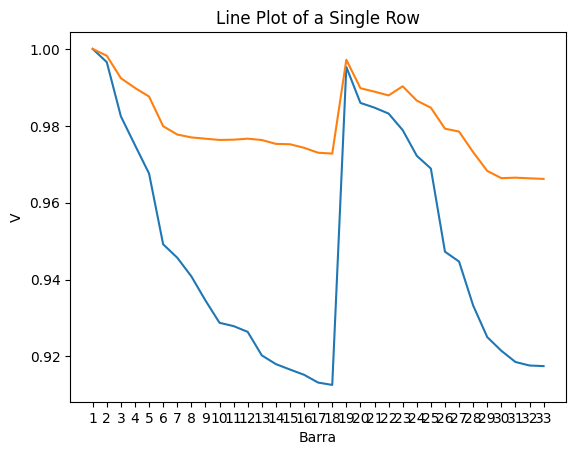

Tempo de processamento: 304726 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 18ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2582606166999262
Change     = 1.2582606166999262
-------------


Generation = 2
Fitness    = 1.2836872623868663
Change     = 0.025426645686940086
-------------


Generation = 3
Fitness    = 1.2836872623868663
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2837966598961967
Change     = 0.00010939750933047776
-------------


Generation = 5
Fitness    = 1.2837966598961967
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2837966598961967
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2837966598961967
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2837966598961967
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2974004622468498
Change     = 0.01360380235065306
-------------


Generat

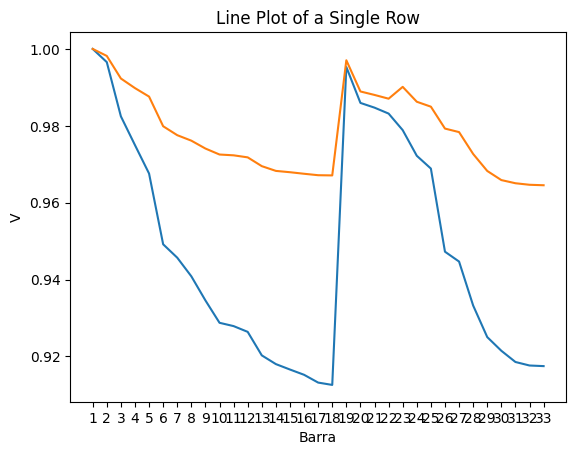

Tempo de processamento: 277888 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 19ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2284508223357973
Change     = 1.2284508223357973
-------------


Generation = 2
Fitness    = 1.2527627747490135
Change     = 0.024311952413216265
-------------


Generation = 3
Fitness    = 1.2527627747490135
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.276632236646153
Change     = 0.023869461897139566
-------------


Generation = 5
Fitness    = 1.2817004894116968
Change     = 0.005068252765543679
-------------


Generation = 6
Fitness    = 1.2817004894116968
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2817004894116968
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2817004894116968
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2817004894116968
Change     = 0.0
-------------


Generatio

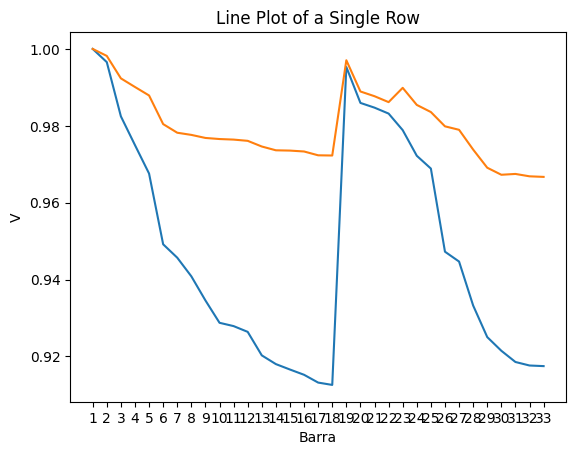

Tempo de processamento: 301991 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 20ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2590850768921715
Change     = 1.2590850768921715
-------------


Generation = 2
Fitness    = 1.2590850768921715
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2662131849837563
Change     = 0.007128108091584817
-------------


Generation = 4
Fitness    = 1.2662131849837563
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2774326777866323
Change     = 0.01121949280287593
-------------


Generation = 6
Fitness    = 1.2774326777866323
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.296559516068669
Change     = 0.01912683828203665
-------------


Generation = 8
Fitness    = 1.296559516068669
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.296559516068669
Change     = 0.0
-------------


Generation = 

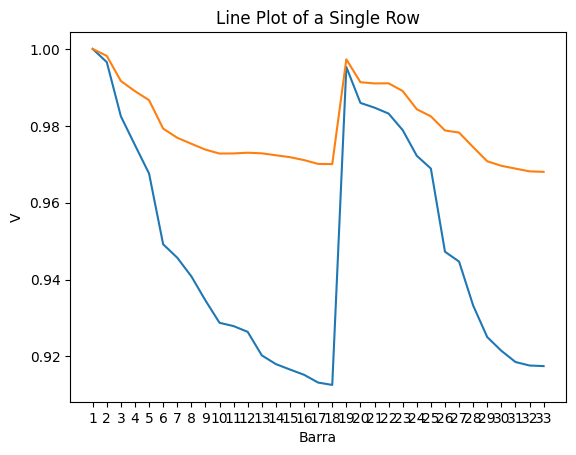

Tempo de processamento: 334381 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 21ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2700113760367113
Change     = 1.2700113760367113
-------------


Generation = 2
Fitness    = 1.278927544155302
Change     = 0.00891616811859075
-------------


Generation = 3
Fitness    = 1.278927544155302
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2878061600513306
Change     = 0.008878615896028563
-------------


Generation = 5
Fitness    = 1.2878061600513306
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2878061600513306
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2878061600513306
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2878061600513306
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2878061600513306
Change     = 0.0
-------------


Generation = 10
Fitness    =

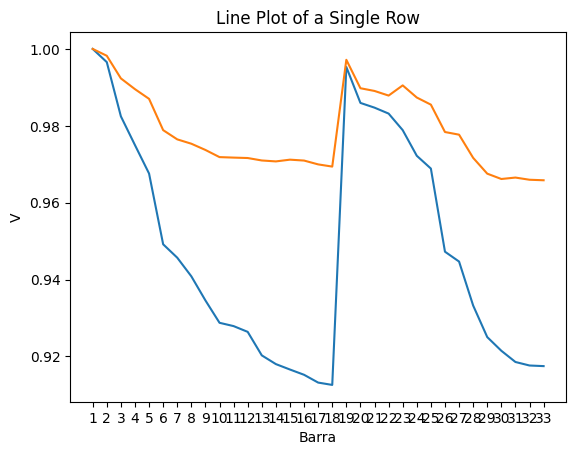

Tempo de processamento: 353552 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 22ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2680020279267854
Change     = 1.2680020279267854
-------------


Generation = 2
Fitness    = 1.2680020279267854
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.275910986057474
Change     = 0.007908958130688593
-------------


Generation = 4
Fitness    = 1.275910986057474
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.275910986057474
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.275910986057474
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.275910986057474
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.275910986057474
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.275910986057474
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.2776511931741852
C

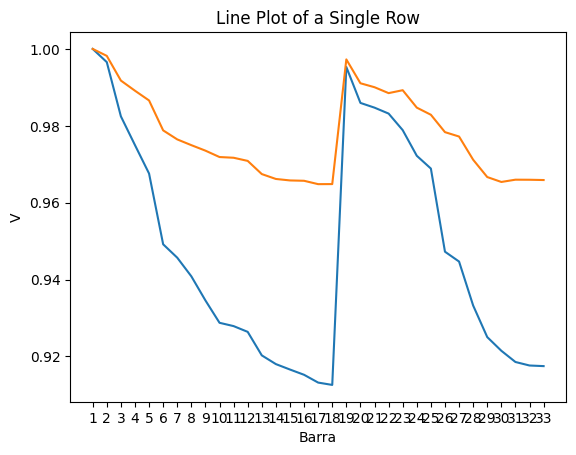

Tempo de processamento: 331734 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 23ªVEZ-----------------------------

Generation = 1
Fitness    = 1.260110050310486
Change     = 1.260110050310486
-------------


Generation = 2
Fitness    = 1.2835095529778133
Change     = 0.023399502667327265
-------------


Generation = 3
Fitness    = 1.2835095529778133
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2835095529778133
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2875041812275394
Change     = 0.003994628249726073
-------------


Generation = 6
Fitness    = 1.2875041812275394
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2915379242757665
Change     = 0.004033743048227123
-------------


Generation = 8
Fitness    = 1.2915379242757665
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2915379242757665
Change     = 0.0
-------------


Generation

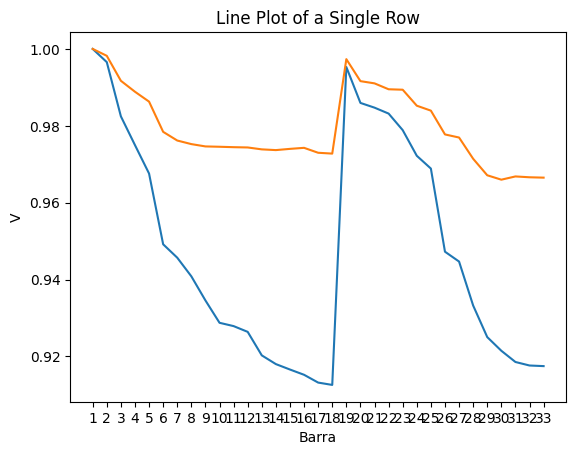

Tempo de processamento: 280452 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 24ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2720503161607684
Change     = 1.2720503161607684
-------------


Generation = 2
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2720503161607684
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.273132794249115
Change     = 0.0010824780883467167
-------------


Generation = 10
Fitness    = 1.29680982751

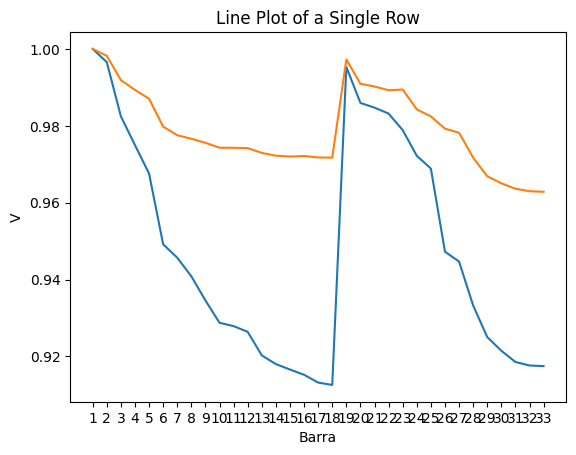

Tempo de processamento: 311276 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 25ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2793215643115268
Change     = 1.2793215643115268
-------------


Generation = 2
Fitness    = 1.2793215643115268
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2793215643115268
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2793215643115268
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2793215643115268
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2793215643115268
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2809386289810119
Change     = 0.0016170646694850799
-------------


Generation = 8
Fitness    = 1.2878924547761816
Change     = 0.006953825795169788
-------------


Generation = 9
Fitness    = 1.2960899830162735
Change     = 0.0081975282400919
-------------


Generatio

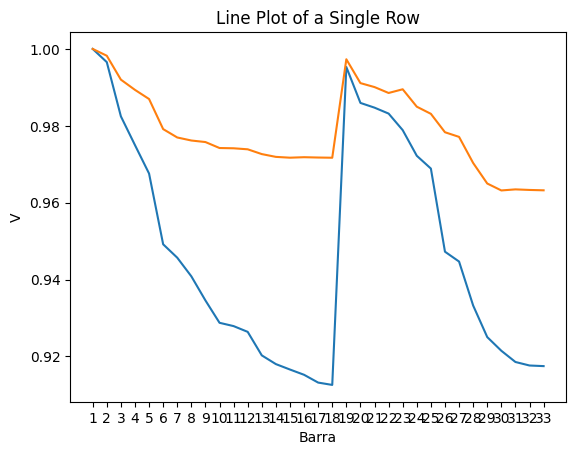

Tempo de processamento: 353732 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 26ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2613114159223242
Change     = 1.2613114159223242
-------------


Generation = 2
Fitness    = 1.2639393588008043
Change     = 0.002627942878480116
-------------


Generation = 3
Fitness    = 1.2667346106611441
Change     = 0.002795251860339798
-------------


Generation = 4
Fitness    = 1.2875209621510515
Change     = 0.020786351489907373
-------------


Generation = 5
Fitness    = 1.2875209621510515
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2875209621510515
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2875209621510515
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3075996076041079
Change     = 0.020078645453056376
-------------


Generation = 9
Fitness    = 1.3075996076041079
Change     = 0.0
-------

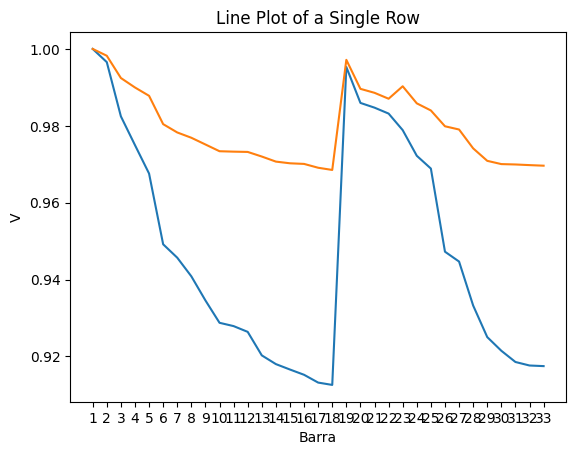

Tempo de processamento: 296764 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 27ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2557173035292046
Change     = 1.2557173035292046
-------------


Generation = 2
Fitness    = 1.2557173035292046
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2557173035292046
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2621645785941142
Change     = 0.006447275064909608
-------------


Generation = 5
Fitness    = 1.2621645785941142
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2635699696572165
Change     = 0.0014053910631022237
-------------


Generation = 7
Fitness    = 1.2753073725166078
Change     = 0.011737402859391288
-------------


Generation = 8
Fitness    = 1.2753073725166078
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.2753073725166078
Change     = 0.0
-------------


Generat

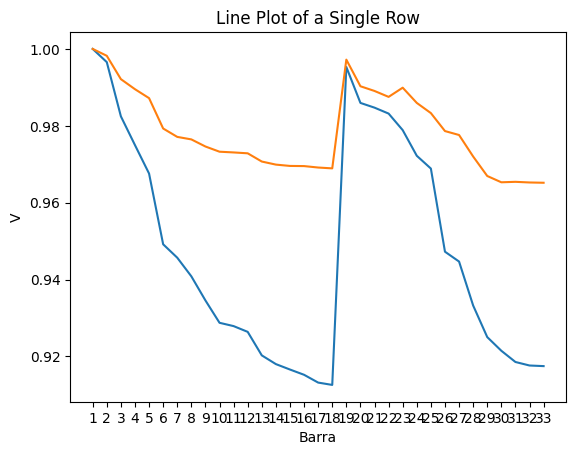

Tempo de processamento: 356419 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 28ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2865364762626885
Change     = 1.2865364762626885
-------------


Generation = 2
Fitness    = 1.2865364762626885
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2865364762626885
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2865364762626885
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2865364762626885
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3020177899919525
Change     = 0.015481313729263979
-------------


Generation = 7
Fitness    = 1.3020177899919525
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3020177899919525
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3020177899919525
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.30201778999

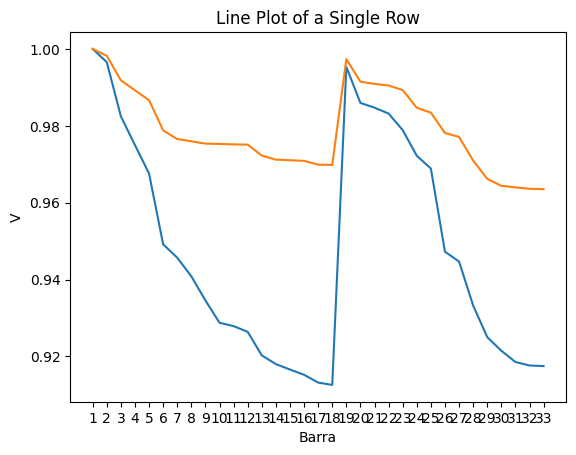

Tempo de processamento: 351188 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 29ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2472231306795665
Change     = 1.2472231306795665
-------------


Generation = 2
Fitness    = 1.2539871551571522
Change     = 0.006764024477585728
-------------


Generation = 3
Fitness    = 1.2631152467835225
Change     = 0.009128091626370294
-------------


Generation = 4
Fitness    = 1.263962000898768
Change     = 0.0008467541152454849
-------------


Generation = 5
Fitness    = 1.263962000898768
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2728086190315255
Change     = 0.008846618132757555
-------------


Generation = 7
Fitness    = 1.2728086190315255
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.2964019402112918
Change     = 0.023593321179766313
-------------


Generation = 9
Fitness    = 1.310408859609458
Change   

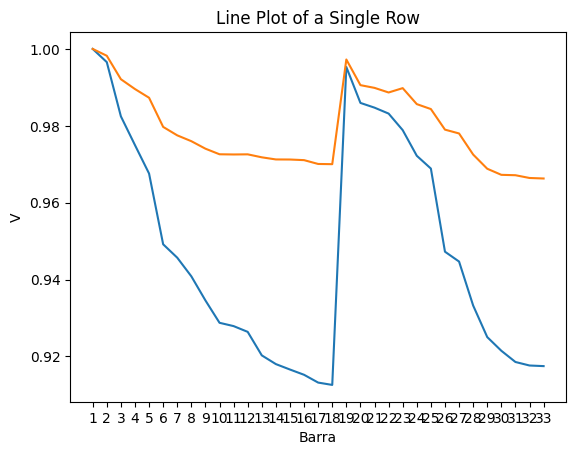

Tempo de processamento: 317590 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 30ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2430898581834384
Change     = 1.2430898581834384
-------------


Generation = 2
Fitness    = 1.2562618942096633
Change     = 0.013172036026224854
-------------


Generation = 3
Fitness    = 1.2668633699700744
Change     = 0.01060147576041115
-------------


Generation = 4
Fitness    = 1.2740667475102718
Change     = 0.007203377540197398
-------------


Generation = 5
Fitness    = 1.2740667475102718
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2740667475102718
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2802852002176461
Change     = 0.006218452707374311
-------------


Generation = 8
Fitness    = 1.2831377446535295
Change     = 0.002852544435883342
-------------


Generation = 9
Fitness    = 1.2831377446535295
Change  

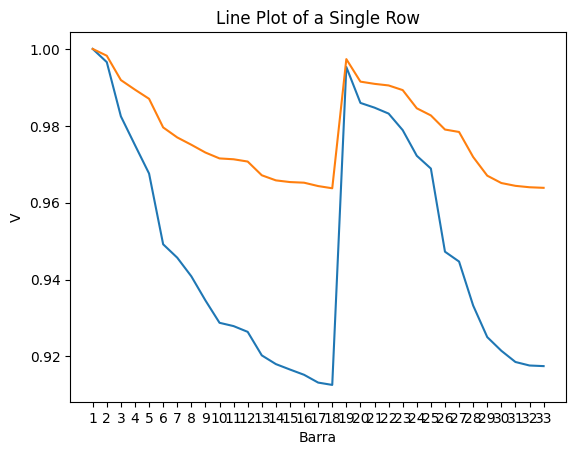

Tempo de processamento: 327775 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------




     Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.322676           349850    72.854736       1.0  0.964723  0.661338   
1   1.305209           326147    74.733573       1.0  0.963917  0.652604   
2   1.311924           373402    74.011210       1.0  0.962900  0.655962   
3   1.322371           309009    72.887544       1.0  0.968012  0.661185   
4   1.300156           340841    75.277071       1.0  0.963692  0.650078   
5   1.320171           333630    73.124133       1.0  0.969157  0.660086   
6   1.315274           336914    73.650923       1.0  0.965361  0.657637   
7   1.308472           272495    74.382524       1.0  0.966182  0.654236   
8   1.321184           298855    73.015162       1.0  0.966703  0.660592   
9   1.302637           316573    75.010160       1.0  0.967266  0.651319   
10  1.304367           299901    74.82

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.322676           349850    72.854736       1.0  0.964723  0.661338   
1   1.305209           326147    74.733573       1.0  0.963917  0.652604   
2   1.311924           373402    74.011210       1.0  0.962900  0.655962   
3   1.322371           309009    72.887544       1.0  0.968012  0.661185   
4   1.300156           340841    75.277071       1.0  0.963692  0.650078   
5   1.320171           333630    73.124133       1.0  0.969157  0.660086   
6   1.315274           336914    73.650923       1.0  0.965361  0.657637   
7   1.308472           272495    74.382524       1.0  0.966182  0.654236   
8   1.321184           298855    73.015162       1.0  0.966703  0.660592   
9   1.302637           316573    75.010160       1.0  0.967266  0.651319   
10  1.304367           299901    74.824107       1.0  0.964019  0.652183   
11  1.301148           327063    75.170324       1.0  0.966953  0.650574   
12  1.320998           339722    73.035175       1.0  0.963901  0.660499   
13  1.322519           318058    72.871616       1.0  0.964158  0.661259   
14  1.298447           348670    75.460870       1.0  0.965293  0.649223   
15  1.313470           299760    73.844980       1.0  0.966366  0.656735   
16  1.316042           304726    73.568332       1.0  0.966184  0.658021   
17  1.304231           277888    74.838762       1.0  0.964534  0.652115   
18  1.297393           301991    75.574255       1.0  0.966708  0.648696   
19  1.307756           334381    74.459601       1.0  0.968015  0.653878   
20  1.318020           353552    73.355566       1.0  0.965830  0.659010   
21  1.302242           331734    75.052692       1.0  0.964820  0.651121   
22  1.314914           280452    73.689645       1.0  0.965982  0.657457   
23  1.308600           311276    74.368755       1.0  0.962835  0.654300   
24  1.308880           353732    74.338673       1.0  0.963181  0.654440   
25  1.312662           296764    73.931901       1.0  0.968514  0.656331   
26  1.311812           356419    74.023326       1.0  0.965182  0.655906   
27  1.316408           351188    73.528964       1.0  0.963516  0.658204   
28  1.323331           317590    72.784317       1.0  0.966291  0.661665   
29  1.308277           327775    74.403563       1.0  0.963747  0.654138   

        fit2  
0   0.596429  
1   0.587216  
2   0.575578  
3   0.634064  
4   0.584637  
5   0.647163  
6   0.603736  
7   0.613128  
8   0.619082  
9   0.625525  
10  0.588382  
11  0.621951  
12  0.587032  
13  0.589970  
14  0.602957  
15  0.615234  
16  0.613150  
17  0.594268  
18  0.619141  
19  0.634093  
20  0.609104  
21  0.597539  
22  0.610842  
23  0.574840  
24  0.578792  
25  0.639806  
26  0.601684  
27  0.582625  
28  0.614371  
29  0.585267

In [ ]:
Tipo_fp = "Unitário" #Q>0
fp=1
#parametrização
num_generations = 30 #Número de Gerações
num_parents_mating = 26 #Número de soluções que gerarão filhos

sol_per_pop = 50 #quantidade de soluções por população
num_genes = 32 #numero de genes de cada solução (é o numero de nós que dá pra colocar GD)
gene_space = [0, 0, 0, 0, 0, 0.075, 0.11, 0.125, 0.250, 0.35] #define as potências de GD que podem ser inseridas

last_fitness = 0
alfa = 2
beta = 0

P_Types = ["uniform", "random"]

Resultado_FP_Unit = [None for _ in range(30)] #cria o vetor que vai armazenar os resultados de cada execução do alg em um vet vazio

for i in range(0,30):
  print(f"\n-----------------------------RODANDO PELA {i+1}ªVEZ-----------------------------\n")
  last_fitness = 0
  Resultado_FP_Unit[i] = Genetico_Total(num_generations, num_parents_mating, sol_per_pop, num_genes, gene_space, fitness_func, IEEE_network, Perda_Total_Init, Vdev_max_Init, Total_P, P_GD_Max, on_generation, fp, Tipo_fp, alfa, beta, P_Types)


#display(Resultado_FP_Unit)
# Extract the strings and the integers from the second element of each inner list
Lista_Resultados_1 = [[item[1], item[2], item[3], item[4], item[5], item[6], item[7]] for item in Resultado_FP_Unit]
Lista_GDs_1 = [item[0] for item in Resultado_FP_Unit]
# Create a DataFrame with the extracted data
Lista_Nomes_1 = [f"Gerador nó {i+2}" for i in range (32)]
# Create a DataFrame with the extracted data
df_Lista_Resultados_1 = pd.DataFrame(Lista_Resultados_1, columns=['Fitness', 'Tempo Exec (ms)', 'Perda_Total', 'Vmax_Sol', 'Vmin_Sol', 'fit1', 'fit2'])
df_Lista_GDs_1 = pd.DataFrame(Lista_GDs_1, columns = Lista_Nomes_1)

print(df_Lista_Resultados_1)

#cria os csv's
df_Lista_Resultados_1.to_csv('Fitness_100_0.csv')
df_Lista_GDs_1.to_csv('Soluções_100_0.csv')

files.download('Fitness_100_0.csv')
files.download('Soluções_100_0.csv')
display(df_Lista_Resultados_1)

### 30X 25/75 ok


-----------------------------RODANDO PELA 1ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3053052270092862
Change     = 1.3053052270092862
-------------


Generation = 2
Fitness    = 1.3053052270092862
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.329776259534739
Change     = 0.024471032525452907
-------------


Generation = 4
Fitness    = 1.329776259534739
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.329776259534739
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4211069005758012
Change     = 0.09133064104106214
-------------


Generation = 7
Fitness    = 1.4211069005758012
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4211069005758012
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4211069005758012
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.4211069005758012
Change     = 0.0
-------------


Generation = 11
Fitness    = 1.4211069005758012
Change     = 0.0
----------

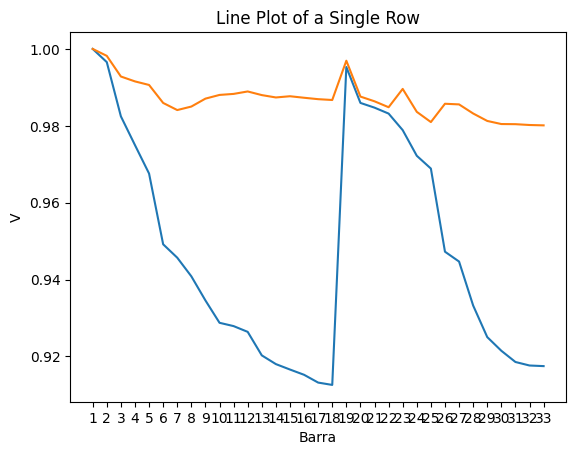

Tempo de processamento: 386436 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 2ªVEZ-----------------------------

Generation = 1
Fitness    = 1.218439853935378
Change     = 1.218439853935378
-------------


Generation = 2
Fitness    = 1.337216101790926
Change     = 0.11877624785554808
-------------


Generation = 3
Fitness    = 1.337216101790926
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.337216101790926
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.337216101790926
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.337216101790926
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.337216101790926
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3583236997688515
Change     = 0.021107597977925385
-------------


Generation = 9
Fitness    = 1.407953397259071
Change     = 0.049629697490219504
-------------


Generation = 10
Fit

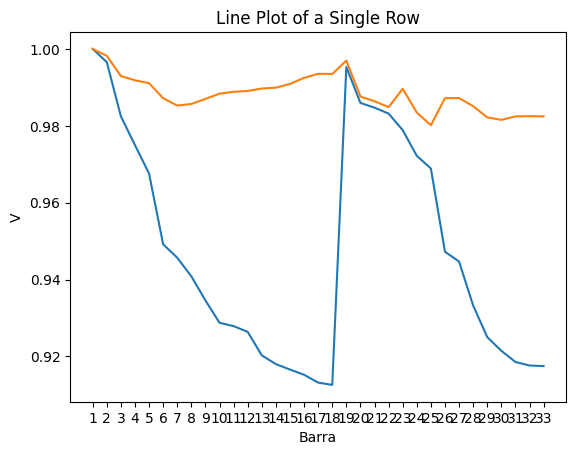

Tempo de processamento: 369769 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 3ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3855275864358636
Change     = 1.3855275864358636
-------------


Generation = 2
Fitness    = 1.3855275864358636
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3855275864358636
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3855275864358636
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.4684925448924917
Change     = 0.0829649584566281
-------------


Generation = 6
Fitness    = 1.4684925448924917
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4684925448924917
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4684925448924917
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4684925448924917
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.46849254489249

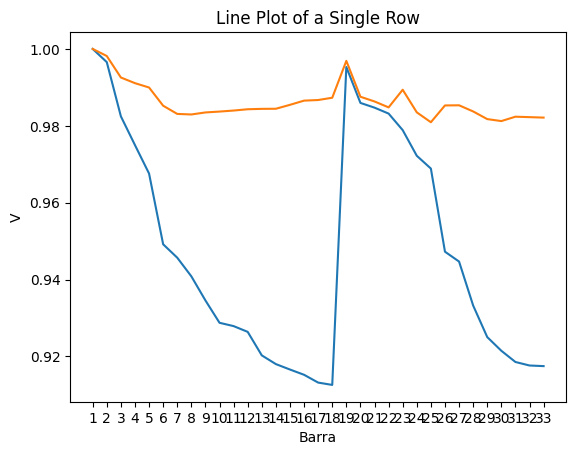

Tempo de processamento: 360088 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 4ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2048731412985474
Change     = 1.2048731412985474
-------------


Generation = 2
Fitness    = 1.2069838670834887
Change     = 0.002110725784941314
-------------


Generation = 3
Fitness    = 1.3729211096764227
Change     = 0.16593724259293396
-------------


Generation = 4
Fitness    = 1.3729211096764227
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3729211096764227
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4026612929490292
Change     = 0.029740183272606524
-------------


Generation = 7
Fitness    = 1.4026612929490292
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4026612929490292
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4026612929490292
Change     = 0.0
-------------


Generation

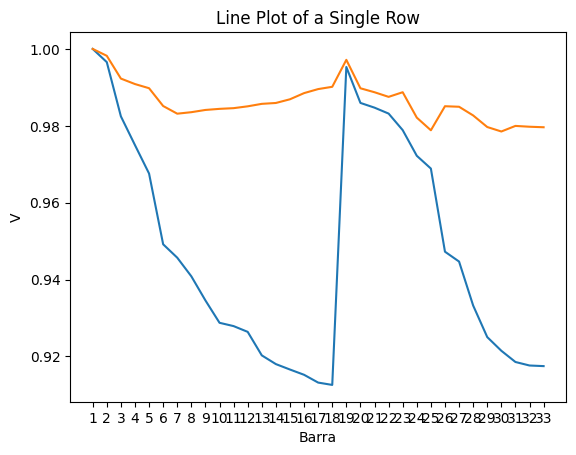

Tempo de processamento: 353489 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 5ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1963180040953538
Change     = 1.1963180040953538
-------------


Generation = 2
Fitness    = 1.1972027424705722
Change     = 0.0008847383752184079
-------------


Generation = 3
Fitness    = 1.1972027424705722
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2191983966638782
Change     = 0.021995654193305958
-------------


Generation = 5
Fitness    = 1.329000154345937
Change     = 0.10980175768205891
-------------


Generation = 6
Fitness    = 1.329000154345937
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.329000154345937
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.329000154345937
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3411813259279546
Change     = 0.01218117158201748
-------------

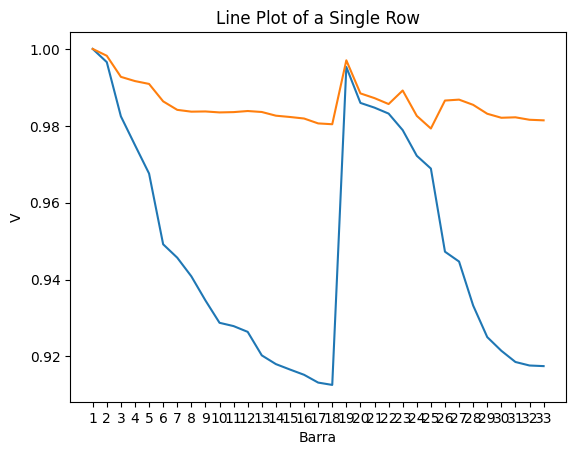

Tempo de processamento: 384482 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 6ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3137036601278291
Change     = 1.3137036601278291
-------------


Generation = 2
Fitness    = 1.3137036601278291
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3137036601278291
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3216133393151441
Change     = 0.007909679187315
-------------


Generation = 5
Fitness    = 1.3216133393151441
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3678639713957934
Change     = 0.04625063208064928
-------------


Generation = 7
Fitness    = 1.3678639713957934
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3838127853005118
Change     = 0.015948813904718362
-------------


Generation = 9
Fitness    = 1.4375609189646692
Change     = 0.05374813366415743
-------------

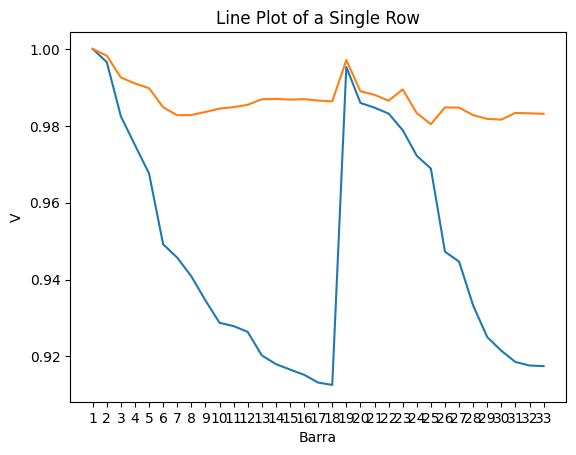

Tempo de processamento: 364408 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 7ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3195838186355924
Change     = 1.3195838186355924
-------------


Generation = 2
Fitness    = 1.3195838186355924
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3195838186355924
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3195838186355924
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3195838186355924
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3477680888643073
Change     = 0.028184270228714947
-------------


Generation = 7
Fitness    = 1.349736904350915
Change     = 0.0019688154866077667
-------------


Generation = 8
Fitness    = 1.349736904350915
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.407355670969828
Change     = 0.057618766618912964
-------------


Generation 

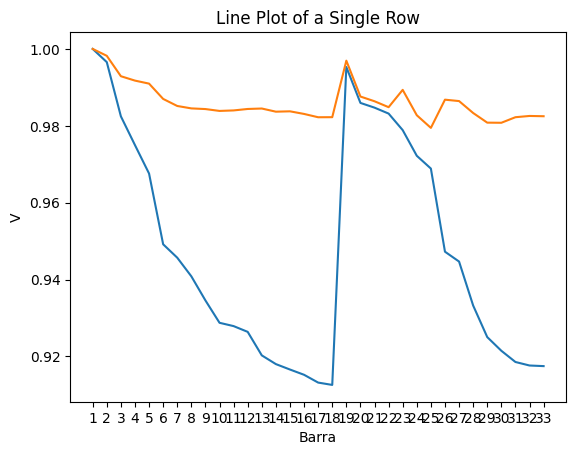

Tempo de processamento: 365780 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 8ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2208085375431201
Change     = 1.2208085375431201
-------------


Generation = 2
Fitness    = 1.2398873683540308
Change     = 0.019078830810910663
-------------


Generation = 3
Fitness    = 1.2398873683540308
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2931658222309517
Change     = 0.05327845387692087
-------------


Generation = 5
Fitness    = 1.3405675966883952
Change     = 0.047401774457443535
-------------


Generation = 6
Fitness    = 1.4398477457340986
Change     = 0.09928014904570337
-------------


Generation = 7
Fitness    = 1.4398477457340986
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4398477457340986
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4398477457340986
Change     = 0.0
----------

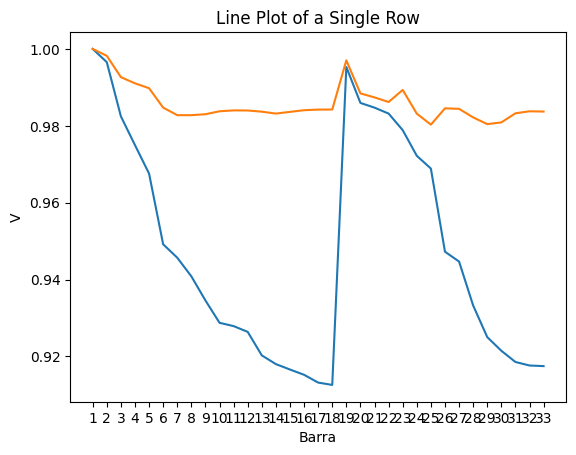

Tempo de processamento: 376947 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 9ªVEZ-----------------------------

Generation = 1
Fitness    = 1.308151460417636
Change     = 1.308151460417636
-------------


Generation = 2
Fitness    = 1.308151460417636
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.308151460417636
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.308151460417636
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.308151460417636
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.308151460417636
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.308151460417636
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3138353112561683
Change     = 0.005683850838532178
-------------


Generation = 9
Fitness    = 1.3255786754653427
Change     = 0.011743364209174434
-------------


Generation = 10
Fitness    = 1.337

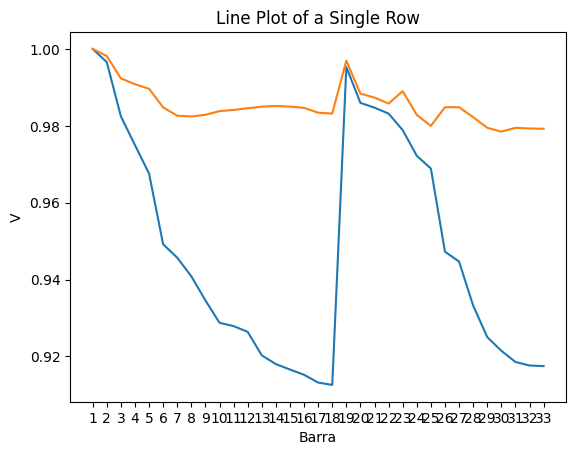

Tempo de processamento: 335896 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 10ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2796581146119146
Change     = 1.2796581146119146
-------------


Generation = 2
Fitness    = 1.2796581146119146
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2796581146119146
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2796581146119146
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2796581146119146
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3579976366947493
Change     = 0.07833952208283468
-------------


Generation = 7
Fitness    = 1.3579976366947493
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3579976366947493
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3579976366947493
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.426662811826

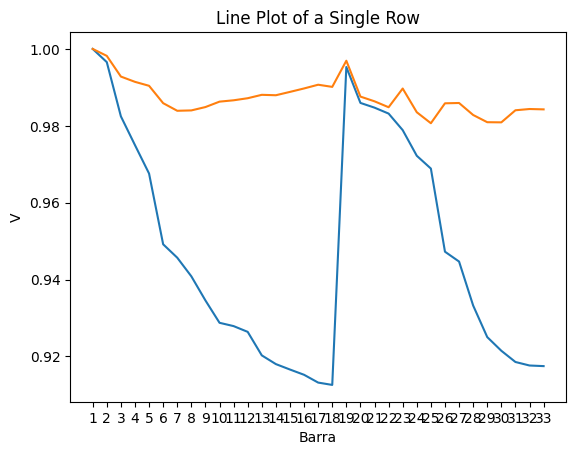

Tempo de processamento: 339519 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 11ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1059237795562495
Change     = 1.1059237795562495
-------------


Generation = 2
Fitness    = 1.1387423725664567
Change     = 0.032818593010207175
-------------


Generation = 3
Fitness    = 1.2429505477417682
Change     = 0.10420817517531145
-------------


Generation = 4
Fitness    = 1.285513583220014
Change     = 0.0425630354782458
-------------


Generation = 5
Fitness    = 1.285513583220014
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3061502387541948
Change     = 0.020636655534180814
-------------


Generation = 7
Fitness    = 1.3061502387541948
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3109585289278662
Change     = 0.004808290173671459
-------------


Generation = 9
Fitness    = 1.3352795343612003
Change     =

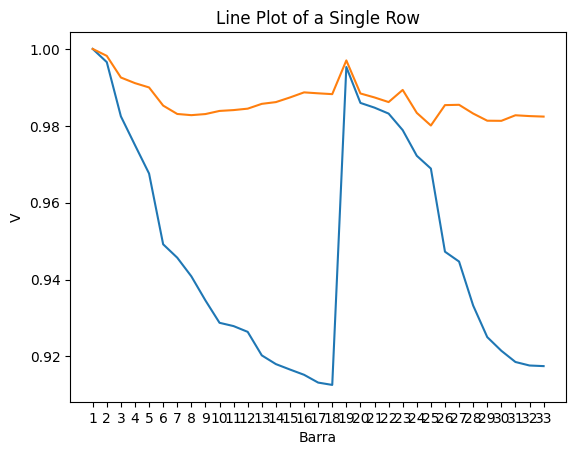

Tempo de processamento: 377647 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 12ªVEZ-----------------------------

Generation = 1
Fitness    = 1.114658970122695
Change     = 1.114658970122695
-------------


Generation = 2
Fitness    = 1.2240764174714043
Change     = 0.10941744734870928
-------------


Generation = 3
Fitness    = 1.2433972745985558
Change     = 0.01932085712715148
-------------


Generation = 4
Fitness    = 1.3235509421669382
Change     = 0.08015366756838249
-------------


Generation = 5
Fitness    = 1.329453404845205
Change     = 0.005902462678266662
-------------


Generation = 6
Fitness    = 1.3597169753939453
Change     = 0.030263570548740404
-------------


Generation = 7
Fitness    = 1.371924251922096
Change     = 0.012207276528150679
-------------


Generation = 8
Fitness    = 1.3728706853174804
Change     = 0.0009464333953843607
-------------


Generation = 9
Fitness    

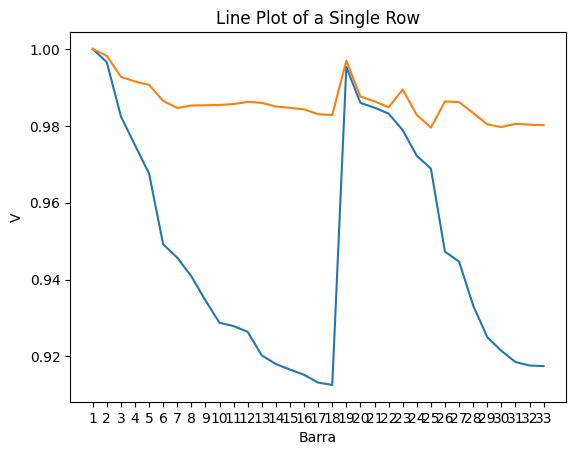

Tempo de processamento: 412201 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 13ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2622178974255331
Change     = 1.2622178974255331
-------------


Generation = 2
Fitness    = 1.312434583652738
Change     = 0.050216686227204876
-------------


Generation = 3
Fitness    = 1.312434583652738
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.312434583652738
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3261153695373167
Change     = 0.013680785884578661
-------------


Generation = 6
Fitness    = 1.3261153695373167
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3269997033813337
Change     = 0.0008843338440169823
-------------


Generation = 8
Fitness    = 1.3269997033813337
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3908189677290541
Change     = 0.06381926434772045
----------

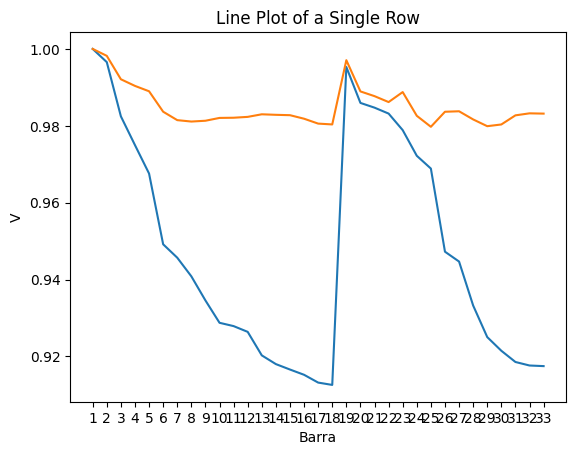

Tempo de processamento: 379381 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 14ªVEZ-----------------------------

Generation = 1
Fitness    = 1.285980689540088
Change     = 1.285980689540088
-------------


Generation = 2
Fitness    = 1.285980689540088
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.285980689540088
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.285980689540088
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3221639793744449
Change     = 0.03618328983435681
-------------


Generation = 6
Fitness    = 1.3293147203894036
Change     = 0.007150741014958717
-------------


Generation = 7
Fitness    = 1.3293147203894036
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3293147203894036
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.334980680609718
Change     = 0.005665960220314403
-------------


Generation = 10

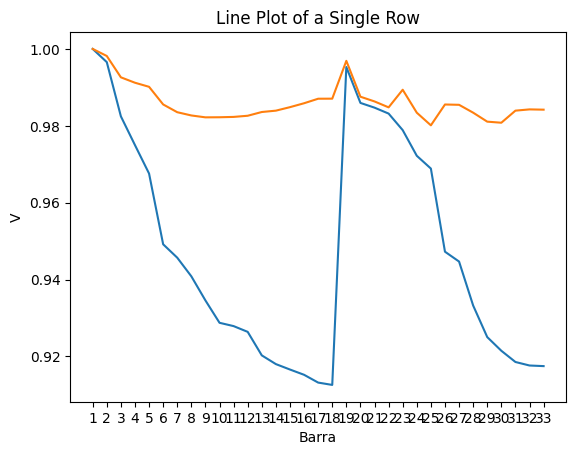

Tempo de processamento: 398699 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 15ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2413171140068235
Change     = 1.2413171140068235
-------------


Generation = 2
Fitness    = 1.2631099076242513
Change     = 0.021792793617427808
-------------


Generation = 3
Fitness    = 1.3180867667736336
Change     = 0.05497685914938222
-------------


Generation = 4
Fitness    = 1.3180867667736336
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3232716403194318
Change     = 0.005184873545798219
-------------


Generation = 6
Fitness    = 1.3232716403194318
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4033481058727433
Change     = 0.0800764655533115
-------------


Generation = 8
Fitness    = 1.4222439693067488
Change     = 0.01889586343400551
-------------


Generation = 9
Fitness    = 1.4222439693067488
Change     

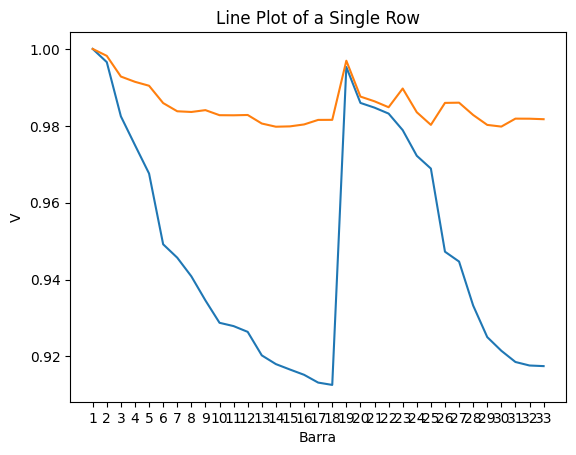

Tempo de processamento: 373741 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 16ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1971879504296654
Change     = 1.1971879504296654
-------------


Generation = 2
Fitness    = 1.2820656116743683
Change     = 0.08487766124470286
-------------


Generation = 3
Fitness    = 1.2820656116743683
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3230760081012345
Change     = 0.041010396426866214
-------------


Generation = 5
Fitness    = 1.3230760081012345
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3230760081012345
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3230760081012345
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3638167385884568
Change     = 0.040740730487222265
-------------


Generation = 9
Fitness    = 1.4163002141973635
Change     = 0.05248347560890676
---------

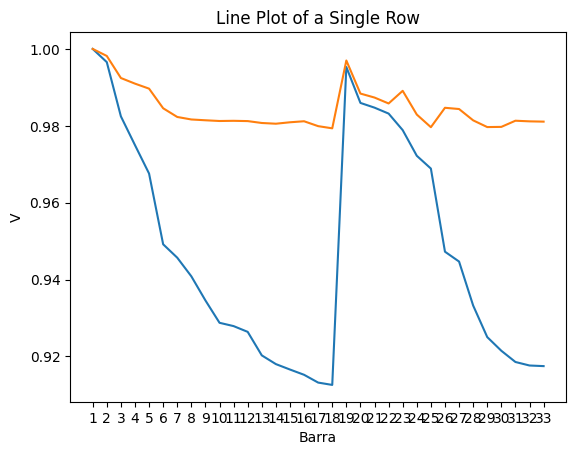

Tempo de processamento: 336370 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 17ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2389649553470912
Change     = 1.2389649553470912
-------------


Generation = 2
Fitness    = 1.3372846220783885
Change     = 0.09831966673129733
-------------


Generation = 3
Fitness    = 1.3750946114457747
Change     = 0.03780998936738622
-------------


Generation = 4
Fitness    = 1.3750946114457747
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3750946114457747
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3868637886833424
Change     = 0.011769177237567652
-------------


Generation = 7
Fitness    = 1.3868637886833424
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3868637886833424
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4211679191690687
Change     = 0.034304130485726336
---------

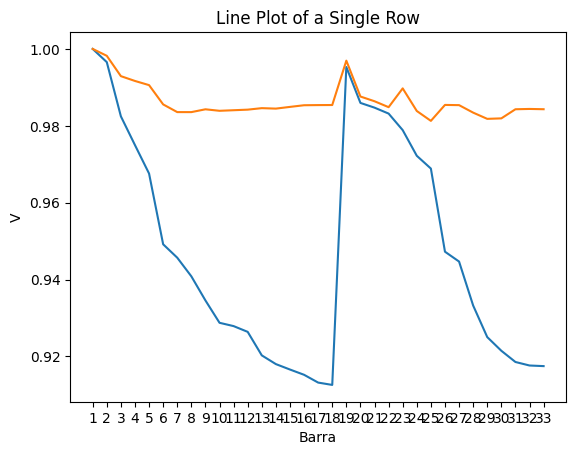

Tempo de processamento: 344718 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 18ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2046987703511542
Change     = 1.2046987703511542
-------------


Generation = 2
Fitness    = 1.2960179168550205
Change     = 0.0913191465038663
-------------


Generation = 3
Fitness    = 1.2960179168550205
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3085060319431463
Change     = 0.01248811508812575
-------------


Generation = 5
Fitness    = 1.3347433160834967
Change     = 0.026237284140350425
-------------


Generation = 6
Fitness    = 1.3347433160834967
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3347433160834967
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3347433160834967
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4192575670540393
Change     = 0.08451425097054255
-----------

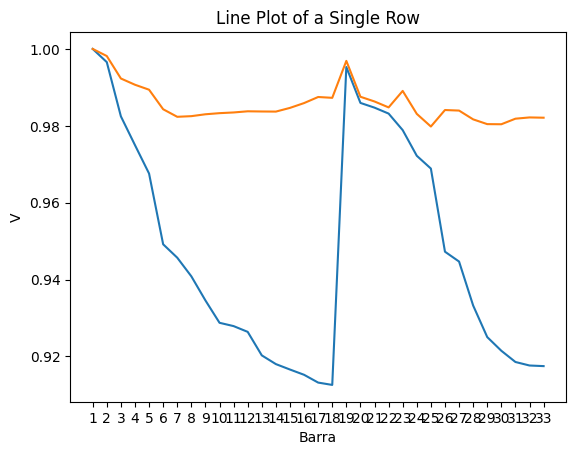

Tempo de processamento: 361212 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 19ªVEZ-----------------------------

Generation = 1
Fitness    = 1.27314557285454
Change     = 1.27314557285454
-------------


Generation = 2
Fitness    = 1.27314557285454
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3862643042240106
Change     = 0.1131187313694706
-------------


Generation = 4
Fitness    = 1.3862643042240106
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3862643042240106
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3862643042240106
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3990673356844456
Change     = 0.012803031460435044
-------------


Generation = 8
Fitness    = 1.3990673356844456
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3990673356844456
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.39

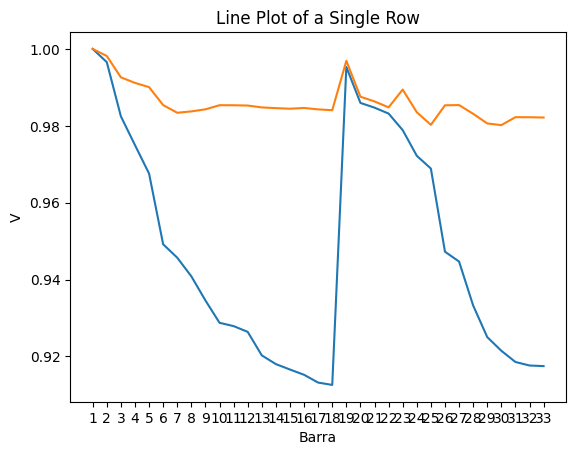

Tempo de processamento: 364919 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 20ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2628725695889411
Change     = 1.2628725695889411
-------------


Generation = 2
Fitness    = 1.2700485263353478
Change     = 0.0071759567464066976
-------------


Generation = 3
Fitness    = 1.3367259001290166
Change     = 0.06667737379366878
-------------


Generation = 4
Fitness    = 1.3367259001290166
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.344858468477324
Change     = 0.008132568348307334
-------------


Generation = 6
Fitness    = 1.3884526220516882
Change     = 0.04359415357436425
-------------


Generation = 7
Fitness    = 1.3945176592757984
Change     = 0.006065037224110226
-------------


Generation = 8
Fitness    = 1.420043281683145
Change     = 0.02552562240734657
-------------


Generation = 9
Fitness    = 1.42004328168

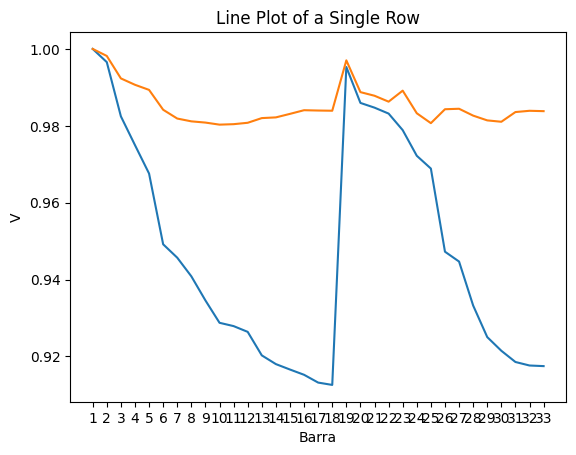

Tempo de processamento: 418065 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 21ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1201579047837542
Change     = 1.1201579047837542
-------------


Generation = 2
Fitness    = 1.134832682589388
Change     = 0.014674777805633754
-------------


Generation = 3
Fitness    = 1.28488084694144
Change     = 0.15004816435205193
-------------


Generation = 4
Fitness    = 1.28488084694144
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.28488084694144
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.371449855194084
Change     = 0.08656900825264402
-------------


Generation = 7
Fitness    = 1.371449855194084
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4125493300125023
Change     = 0.04109947481841836
-------------


Generation = 9
Fitness    = 1.4125493300125023
Change     = 0.0
-------------


Gen

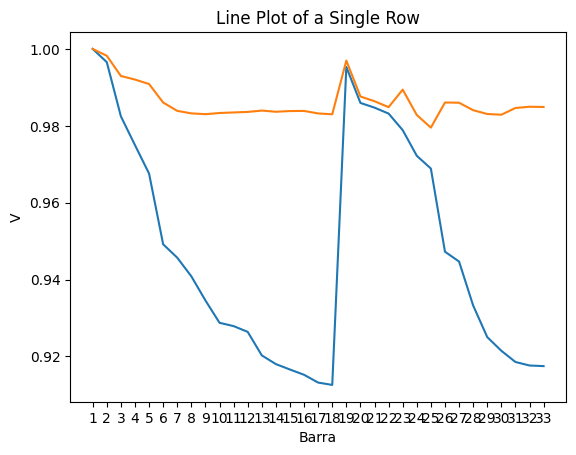

Tempo de processamento: 393041 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 22ªVEZ-----------------------------

Generation = 1
Fitness    = 1.276854950871101
Change     = 1.276854950871101
-------------


Generation = 2
Fitness    = 1.3354425821255338
Change     = 0.05858763125443289
-------------


Generation = 3
Fitness    = 1.3354425821255338
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3642979145352623
Change     = 0.028855332409728485
-------------


Generation = 5
Fitness    = 1.3642979145352623
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3642979145352623
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3642979145352623
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3829083975544756
Change     = 0.01861048301921331
-------------


Generation = 9
Fitness    = 1.3829083975544756
Change     = 0.0
-------------


Generation =

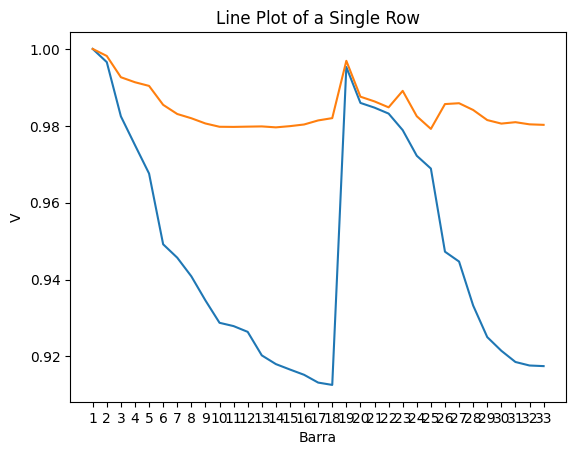

Tempo de processamento: 341131 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 23ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2325714322683
Change     = 1.2325714322683
-------------


Generation = 2
Fitness    = 1.2325714322683
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3216859682687576
Change     = 0.08911453600045771
-------------


Generation = 4
Fitness    = 1.3216859682687576
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3328689957859654
Change     = 0.011183027517207789
-------------


Generation = 6
Fitness    = 1.3328689957859654
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3328689957859654
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3328689957859654
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3328689957859654
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.3328

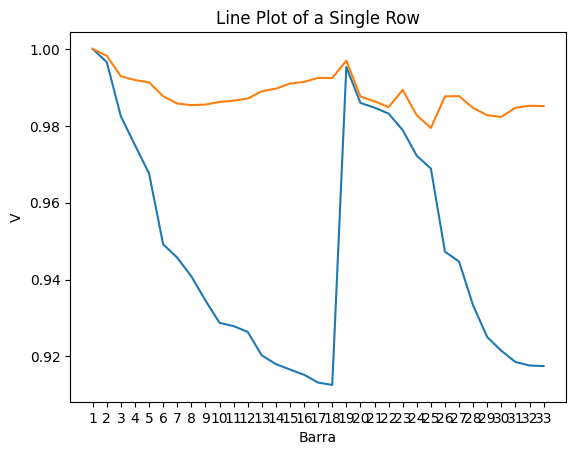

Tempo de processamento: 351511 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 24ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3340401853343682
Change     = 1.3340401853343682
-------------


Generation = 2
Fitness    = 1.3340401853343682
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3340401853343682
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3340401853343682
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3340401853343682
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3494352632343305
Change     = 0.015395077899962306
-------------


Generation = 7
Fitness    = 1.4146725357234122
Change     = 0.06523727248908173
-------------


Generation = 8
Fitness    = 1.4146725357234122
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4146725357234122
Change     = 0.0
-------------


Generation = 10
Fitness   

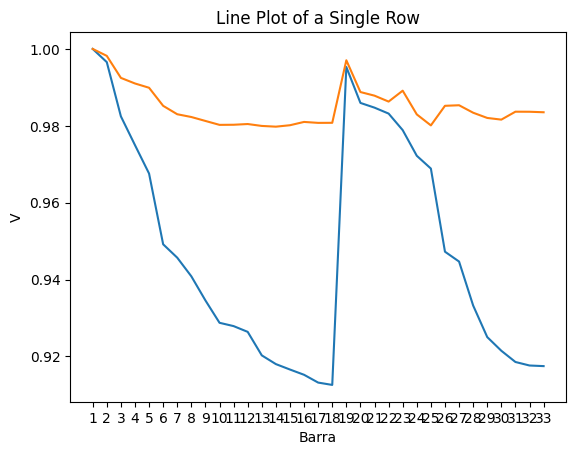

Tempo de processamento: 339077 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 25ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2701940205554143
Change     = 1.2701940205554143
-------------


Generation = 2
Fitness    = 1.2701940205554143
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2701940205554143
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2748992673268589
Change     = 0.004705246771444571
-------------


Generation = 5
Fitness    = 1.2748992673268589
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2748992673268589
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3382697166712538
Change     = 0.06337044934439495
-------------


Generation = 8
Fitness    = 1.3382697166712538
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3382697166712538
Change     = 0.0
-------------


Generation = 10
Fitness   

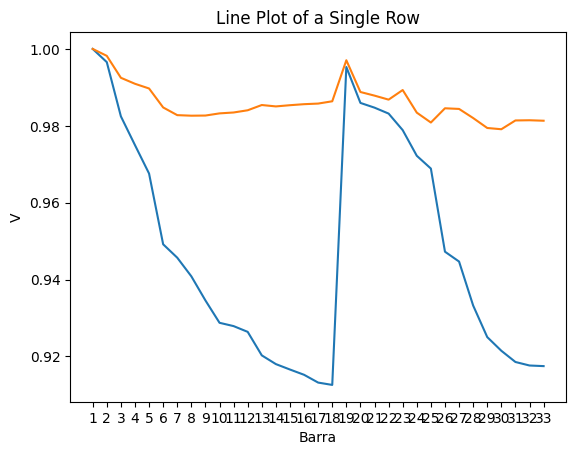

Tempo de processamento: 360779 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 26ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2940823054699921
Change     = 1.2940823054699921
-------------


Generation = 2
Fitness    = 1.2940823054699921
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.327384576039181
Change     = 0.033302270569188774
-------------


Generation = 4
Fitness    = 1.3676427317350481
Change     = 0.040258155695867215
-------------


Generation = 5
Fitness    = 1.3676427317350481
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.415185024102761
Change     = 0.0475422923677129
-------------


Generation = 7
Fitness    = 1.4175724643370193
Change     = 0.002387440234258298
-------------


Generation = 8
Fitness    = 1.4175724643370193
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4175724643370193
Change     = 0.0
-----------

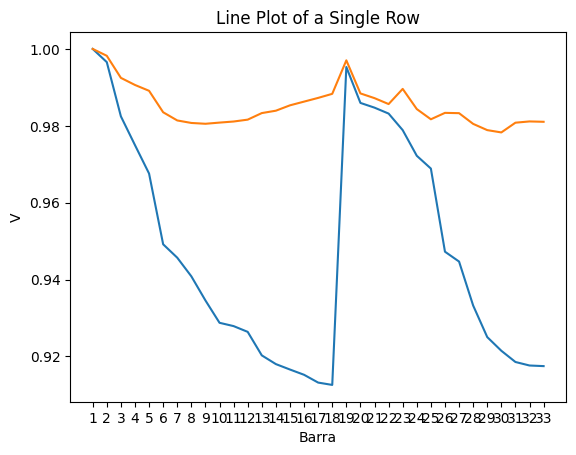

Tempo de processamento: 379443 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 27ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2160396487439344
Change     = 1.2160396487439344
-------------


Generation = 2
Fitness    = 1.3425286417537663
Change     = 0.12648899300983185
-------------


Generation = 3
Fitness    = 1.3425286417537663
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3993243476232184
Change     = 0.05679570586945215
-------------


Generation = 5
Fitness    = 1.3993243476232184
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3993243476232184
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4347916236970262
Change     = 0.03546727607380773
-------------


Generation = 8
Fitness    = 1.4347916236970262
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4347916236970262
Change     = 0.0
-------------


Generation 

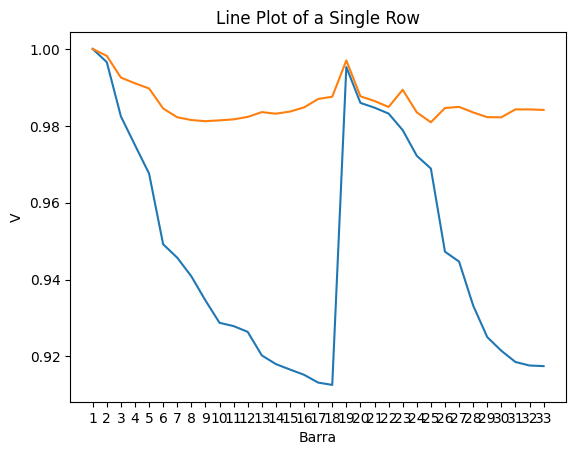

Tempo de processamento: 350055 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 28ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1968508998290994
Change     = 1.1968508998290994
-------------


Generation = 2
Fitness    = 1.1968508998290994
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2332877136845277
Change     = 0.036436813855428296
-------------


Generation = 4
Fitness    = 1.2332877136845277
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2843079923828986
Change     = 0.05102027869837089
-------------


Generation = 6
Fitness    = 1.330204642315507
Change     = 0.045896649932608335
-------------


Generation = 7
Fitness    = 1.330204642315507
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3839036784949057
Change     = 0.05369903617939875
-------------


Generation = 9
Fitness    = 1.3839036784949057
Change     = 0.0
-----------

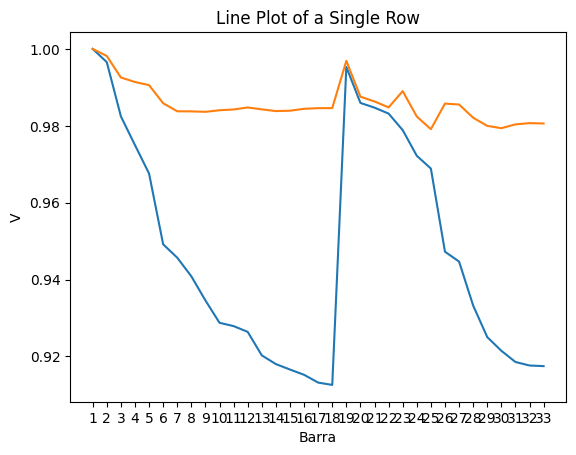

Tempo de processamento: 358316 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 29ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2170254721293514
Change     = 1.2170254721293514
-------------


Generation = 2
Fitness    = 1.2170254721293514
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2740014383175695
Change     = 0.0569759661882181
-------------


Generation = 4
Fitness    = 1.2740014383175695
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2740014383175695
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2740014383175695
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.2781611108008777
Change     = 0.004159672483308174
-------------


Generation = 8
Fitness    = 1.3091981947201607
Change     = 0.03103708391928306
-------------


Generation = 9
Fitness    = 1.3429783932885604
Change     = 0.033780198568399644
----------

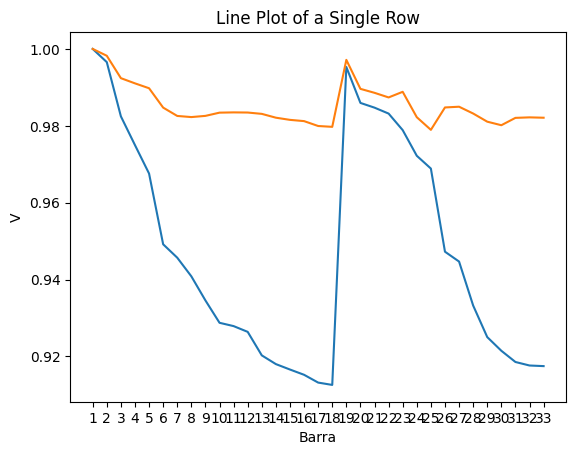

Tempo de processamento: 349007 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 30ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2049319111840509
Change     = 1.2049319111840509
-------------


Generation = 2
Fitness    = 1.3935380349451858
Change     = 0.18860612376113495
-------------


Generation = 3
Fitness    = 1.3935380349451858
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.4245108983445964
Change     = 0.030972863399410633
-------------


Generation = 5
Fitness    = 1.4245108983445964
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4245108983445964
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4245108983445964
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4245108983445964
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4245108983445964
Change     = 0.0
-------------


Generation = 10
Fitness   

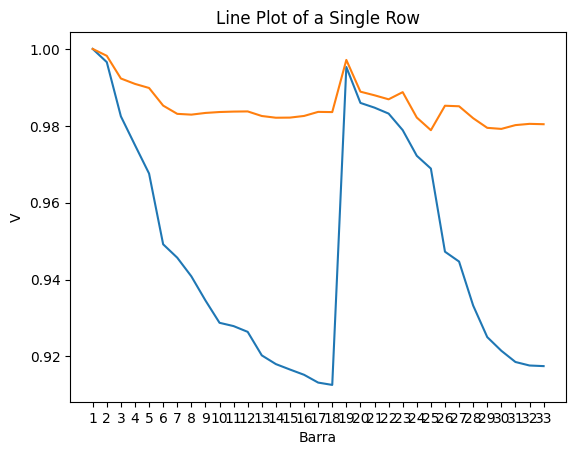

Tempo de processamento: 360965 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------




     Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.455917           386436    87.269076       1.0  0.980113  0.594334   
1   1.448468           369769    90.830645       1.0  0.980162  0.577778   
2   1.468493           360088    87.857374       1.0  0.980926  0.591599   
3   1.430311           353489    86.505525       1.0  0.978518  0.597883   
4   1.442391           384482    87.004908       1.0  0.979290  0.595561   
5   1.461931           364408    87.025195       1.0  0.980431  0.595467   
6   1.445209           365780    87.021859       1.0  0.979456  0.595483   
7   1.460792           376947    86.568472       1.0  0.980303  0.597590   
8   1.432590           335896    85.262485       1.0  0.978482  0.603661   
9   1.458200           339519    90.382853       1.0  0.980668  0.579859   
10  1.453663           377647    87.93

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.455917           386436    87.269076       1.0  0.980113  0.594334   
1   1.448468           369769    90.830645       1.0  0.980162  0.577778   
2   1.468493           360088    87.857374       1.0  0.980926  0.591599   
3   1.430311           353489    86.505525       1.0  0.978518  0.597883   
4   1.442391           384482    87.004908       1.0  0.979290  0.595561   
5   1.461931           364408    87.025195       1.0  0.980431  0.595467   
6   1.445209           365780    87.021859       1.0  0.979456  0.595483   
7   1.460792           376947    86.568472       1.0  0.980303  0.597590   
8   1.432590           335896    85.262485       1.0  0.978482  0.603661   
9   1.458200           339519    90.382853       1.0  0.980668  0.579859   
10  1.453663           377647    87.935760       1.0  0.980072  0.591234   
11  1.447778           412201    86.445383       1.0  0.979528  0.598162   
12  1.449011           379381    87.481408       1.0  0.979740  0.593347   
13  1.450503           398699    89.651750       1.0  0.980121  0.583258   
14  1.453688           373741    85.623976       1.0  0.979761  0.601981   
15  1.448305           336370    84.853653       1.0  0.979343  0.605562   
16  1.476261           344718    87.142814       1.0  0.981282  0.594920   
17  1.445487           361212    89.523940       1.0  0.979811  0.583852   
18  1.457718           364919    86.951496       1.0  0.980175  0.595810   
19  1.459549           418065    87.090153       1.0  0.980301  0.595165   
20  1.440957           393041    89.311328       1.0  0.979518  0.584840   
21  1.438748           341131    87.848543       1.0  0.979191  0.591640   
22  1.431138           351511    92.986224       1.0  0.979444  0.567758   
23  1.454504           339077    85.373195       1.0  0.979774  0.603146   
24  1.445704           360779    84.218856       1.0  0.979105  0.608512   
25  1.426802           379443    86.217417       1.0  0.978274  0.599222   
26  1.462715           350055    90.290448       1.0  0.980919  0.580289   
27  1.439165           358316    87.155243       1.0  0.979122  0.594863   
28  1.440174           349007    85.413609       1.0  0.978945  0.602959   
29  1.439372           360965    85.109798       1.0  0.978857  0.604371   

        fit2  
0   0.772500  
1   0.773053  
2   0.781795  
3   0.754246  
4   0.763074  
5   0.776132  
6   0.764979  
7   0.774665  
8   0.753839  
9   0.778847  
10  0.772031  
11  0.765798  
12  0.768225  
13  0.772583  
14  0.768465  
15  0.763683  
16  0.785867  
17  0.769041  
18  0.773209  
19  0.774644  
20  0.765691  
21  0.761952  
22  0.764839  
23  0.768621  
24  0.760965  
25  0.751461  
26  0.781714  
27  0.761156  
28  0.759130  
29  0.758124

In [ ]:
Tipo_fp = "Unitário" #Q>0
fp=1
#parametrização
num_generations = 30 #Número de Gerações
num_parents_mating = 26 #Número de soluções que gerarão filhos

sol_per_pop = 50 #quantidade de soluções por população
num_genes = 32 #numero de genes de cada solução (é o numero de nós que dá pra colocar GD)
gene_space = [0, 0, 0, 0, 0, 0.075, 0.11, 0.125, 0.250, 0.35] #define as potências de GD que podem ser inseridas

last_fitness = 0
alfa = 0.5
beta = 1.5

P_Types = ["uniform", "random"]

Resultado_FP_Unit = [None for _ in range(30)] #cria o vetor que vai armazenar os resultados de cada execução do alg em um vet vazio

for i in range(0,30):
  print(f"\n-----------------------------RODANDO PELA {i+1}ªVEZ-----------------------------\n")
  last_fitness = 0
  Resultado_FP_Unit[i] = Genetico_Total(num_generations, num_parents_mating, sol_per_pop, num_genes, gene_space, fitness_func, IEEE_network, Perda_Total_Init, Vdev_max_Init, Total_P, P_GD_Max, on_generation, fp, Tipo_fp, alfa, beta, P_Types)


#display(Resultado_FP_Unit)
# Extract the strings and the integers from the second element of each inner list
Lista_Resultados_1 = [[item[1], item[2], item[3], item[4], item[5], item[6], item[7]] for item in Resultado_FP_Unit]
Lista_GDs_1 = [item[0] for item in Resultado_FP_Unit]
# Create a DataFrame with the extracted data
Lista_Nomes_1 = [f"Gerador nó {i+2}" for i in range (32)]
# Create a DataFrame with the extracted data
df_Lista_Resultados_1 = pd.DataFrame(Lista_Resultados_1, columns=['Fitness', 'Tempo Exec (ms)', 'Perda_Total', 'Vmax_Sol', 'Vmin_Sol', 'fit1', 'fit2'])
df_Lista_GDs_1 = pd.DataFrame(Lista_GDs_1, columns = Lista_Nomes_1)

print(df_Lista_Resultados_1)

#cria os csv's
df_Lista_Resultados_1.to_csv('Fitness_25_75.csv')
df_Lista_GDs_1.to_csv('Soluções_25_75.csv')

files.download('Fitness_25_75.csv')
files.download('Soluções_25_75.csv')
display(df_Lista_Resultados_1)

### 30X 0/100 ok


-----------------------------RODANDO PELA 1ªVEZ-----------------------------

Generation = 1
Fitness    = 1.4163470966877056
Change     = 1.4163470966877056
-------------


Generation = 2
Fitness    = 1.4163470966877056
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.4163470966877056
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.4163470966877056
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.4163470966877056
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4163470966877056
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4636766972774191
Change     = 0.04732960058971347
-------------


Generation = 8
Fitness    = 1.4637957663698329
Change     = 0.0001190690924137705
-------------


Generation = 9
Fitness    = 1.4637957663698329
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.4765869449372881
Change     = 0.012791178567455264
-------------


Generation = 11
Fitness    = 1.4765869449372881
Change

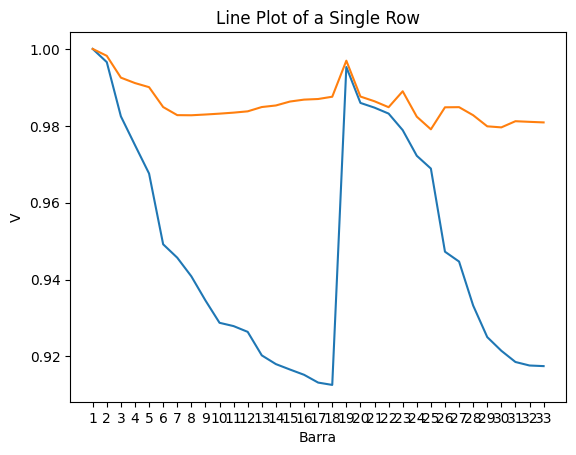

Tempo de processamento: 350751 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 2ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2868483659867116
Change     = 1.2868483659867116
-------------


Generation = 2
Fitness    = 1.2868483659867116
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3394641311843962
Change     = 0.05261576519768463
-------------


Generation = 4
Fitness    = 1.3394641311843962
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3394641311843962
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3394641311843962
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3394641311843962
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.5186440870803146
Change     = 0.1791799558959184
-------------


Generation = 9
Fitness    = 1.5186440870803146
Change     = 0.0
-------------


Generation = 10
Fitness    = 

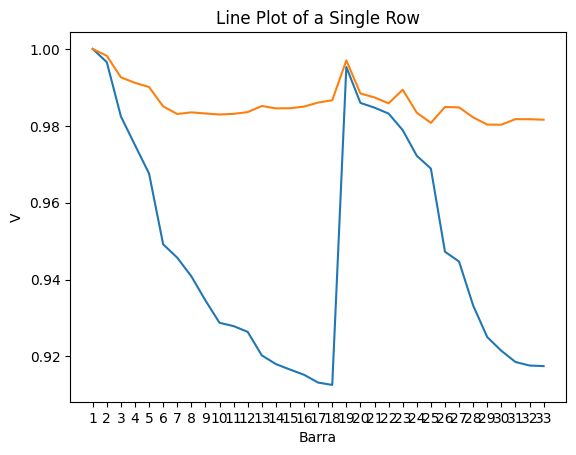

Tempo de processamento: 385220 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 3ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2425117263249528
Change     = 1.2425117263249528
-------------


Generation = 2
Fitness    = 1.3843483758540054
Change     = 0.14183664952905262
-------------


Generation = 3
Fitness    = 1.3843483758540054
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3843483758540054
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3843483758540054
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3843483758540054
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.407769621372194
Change     = 0.023421245518188583
-------------


Generation = 8
Fitness    = 1.407769621372194
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.448450671418283
Change     = 0.04068105004608902
-------------


Generation = 1

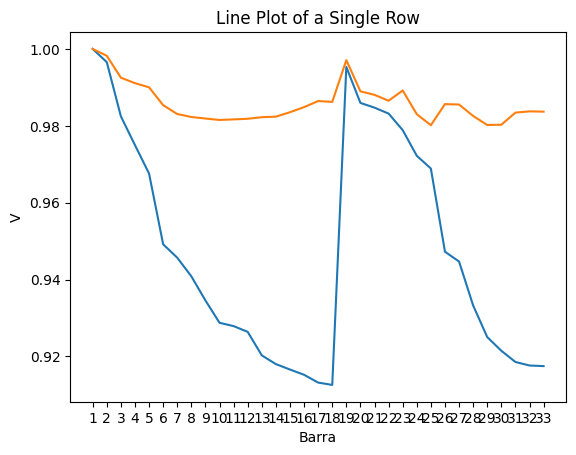

Tempo de processamento: 394625 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 4ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2431128828199567
Change     = 1.2431128828199567
-------------


Generation = 2
Fitness    = 1.3089477557567204
Change     = 0.06583487293676371
-------------


Generation = 3
Fitness    = 1.3089477557567204
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3838962550462774
Change     = 0.07494849928955705
-------------


Generation = 5
Fitness    = 1.3838962550462774
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3859654389973846
Change     = 0.002069183951107112
-------------


Generation = 7
Fitness    = 1.3859654389973846
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3859654389973846
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4629020898155745
Change     = 0.0769366508181899
------------

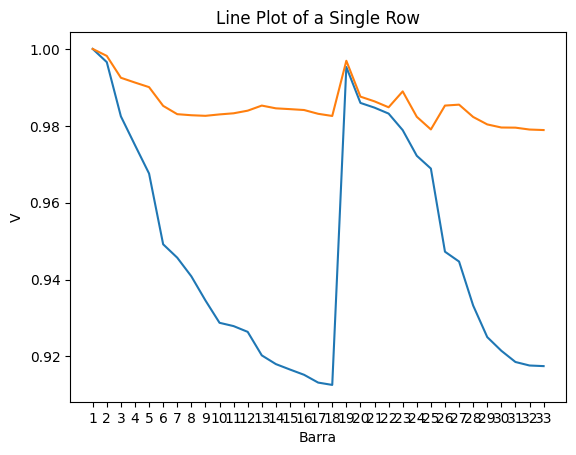

Tempo de processamento: 379699 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 5ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1655327900630716
Change     = 1.1655327900630716
-------------


Generation = 2
Fitness    = 1.2188692500859903
Change     = 0.0533364600229187
-------------


Generation = 3
Fitness    = 1.2188692500859903
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2188692500859903
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2188692500859903
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.2935012252260911
Change     = 0.07463197514010078
-------------


Generation = 7
Fitness    = 1.2935012252260911
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3068149656336363
Change     = 0.013313740407545183
-------------


Generation = 9
Fitness    = 1.4104698430567388
Change     = 0.10365487742310253
------------

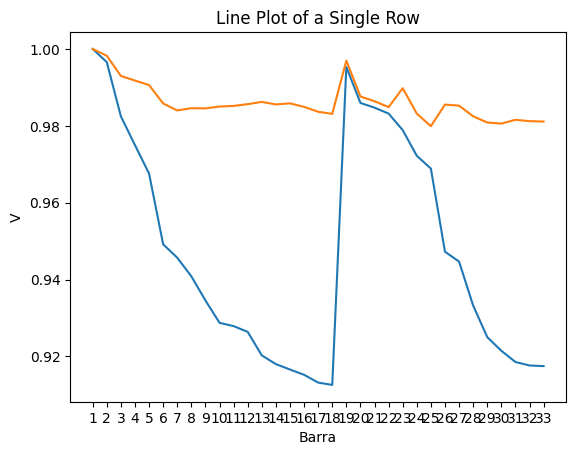

Tempo de processamento: 398228 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 6ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1829125433215757
Change     = 1.1829125433215757
-------------


Generation = 2
Fitness    = 1.223067977733082
Change     = 0.04015543441150626
-------------


Generation = 3
Fitness    = 1.223067977733082
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.223067977733082
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.2702463933513233
Change     = 0.04717841561824132
-------------


Generation = 6
Fitness    = 1.2849576004033207
Change     = 0.014711207051997466
-------------


Generation = 7
Fitness    = 1.2874519688740658
Change     = 0.002494368470745023
-------------


Generation = 8
Fitness    = 1.299707063516566
Change     = 0.012255094642500186
-------------


Generation = 9
Fitness    = 1.3783529672773214
Change     = 0

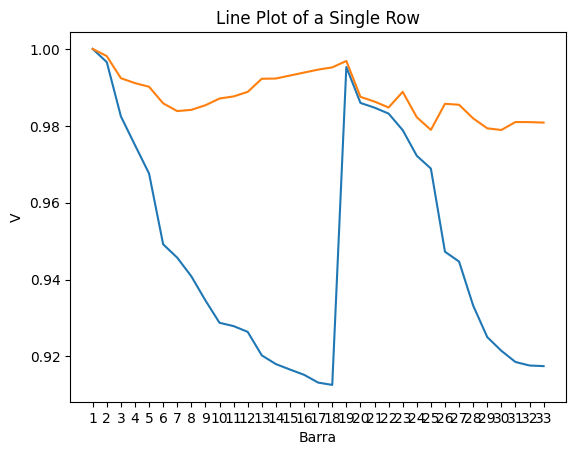

Tempo de processamento: 356521 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 7ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2082579723089297
Change     = 1.2082579723089297
-------------


Generation = 2
Fitness    = 1.3483175108608418
Change     = 0.1400595385519121
-------------


Generation = 3
Fitness    = 1.3483175108608418
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3483175108608418
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3483175108608418
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4576610591678052
Change     = 0.10934354830696336
-------------


Generation = 7
Fitness    = 1.4576610591678052
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4576610591678052
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4655661082078137
Change     = 0.00790504904000855
-------------


Generation = 

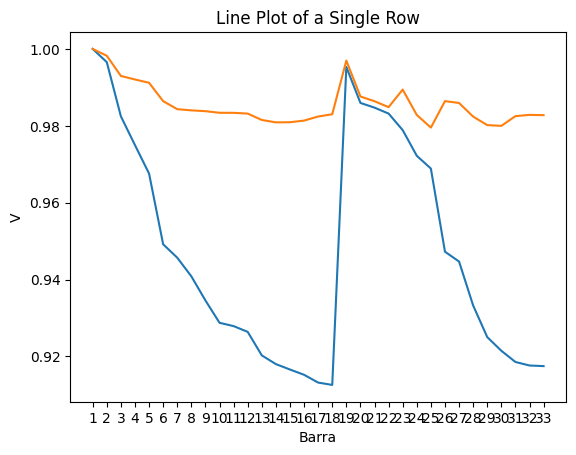

Tempo de processamento: 368931 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 8ªVEZ-----------------------------

Generation = 1
Fitness    = 1.0876107165514206
Change     = 1.0876107165514206
-------------


Generation = 2
Fitness    = 1.2144558046443292
Change     = 0.12684508809290862
-------------


Generation = 3
Fitness    = 1.2587047512741838
Change     = 0.04424894662985457
-------------


Generation = 4
Fitness    = 1.3154435268239375
Change     = 0.056738775549753706
-------------


Generation = 5
Fitness    = 1.330291172153255
Change     = 0.014847645329317594
-------------


Generation = 6
Fitness    = 1.3595208773585419
Change     = 0.029229705205286782
-------------


Generation = 7
Fitness    = 1.478325481965622
Change     = 0.11880460460708009
-------------


Generation = 8
Fitness    = 1.478325481965622
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.47832548196562

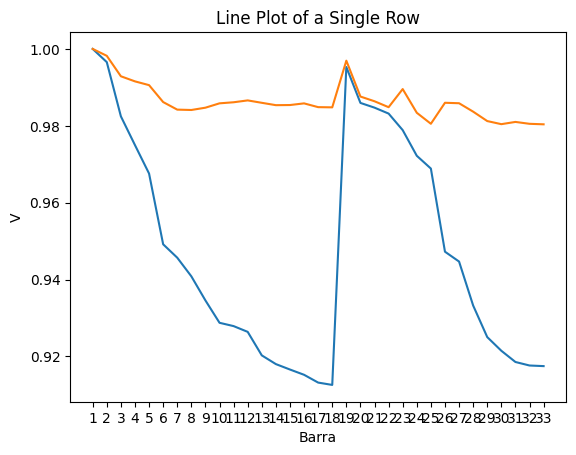

Tempo de processamento: 393460 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 9ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1894537569756718
Change     = 1.1894537569756718
-------------


Generation = 2
Fitness    = 1.2281500837778192
Change     = 0.03869632680214741
-------------


Generation = 3
Fitness    = 1.2900499374019394
Change     = 0.061899853624120205
-------------


Generation = 4
Fitness    = 1.3501907946853784
Change     = 0.060140857283438987
-------------


Generation = 5
Fitness    = 1.3501907946853784
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3501907946853784
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3501907946853784
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3501907946853784
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3501907946853784
Change     = 0.0
-------------


Generation

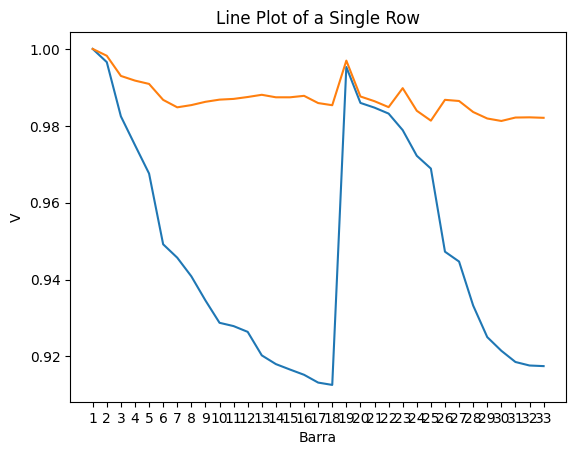

Tempo de processamento: 363808 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 10ªVEZ-----------------------------

Generation = 1
Fitness    = 1.255323129709719
Change     = 1.255323129709719
-------------


Generation = 2
Fitness    = 1.3855650559228978
Change     = 0.13024192621317887
-------------


Generation = 3
Fitness    = 1.3855650559228978
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3855650559228978
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.4201455978286224
Change     = 0.03458054190572457
-------------


Generation = 6
Fitness    = 1.518056036094643
Change     = 0.09791043826602053
-------------


Generation = 7
Fitness    = 1.518056036094643
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.520852881699506
Change     = 0.002796845604863041
-------------


Generation = 9
Fitness    = 1.520852881699506
Change     = 0.0
-------------




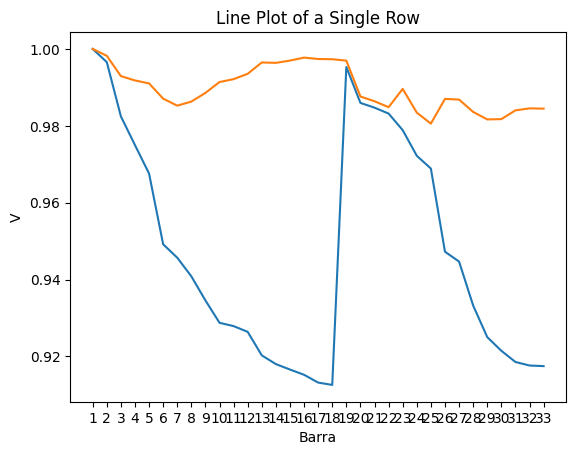

Tempo de processamento: 374549 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 11ªVEZ-----------------------------

Generation = 1
Fitness    = 1.166150281500865
Change     = 1.166150281500865
-------------


Generation = 2
Fitness    = 1.166150281500865
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.270265398606469
Change     = 0.10411511710560384
-------------


Generation = 4
Fitness    = 1.3116993833643729
Change     = 0.04143398475790394
-------------


Generation = 5
Fitness    = 1.3549592858323658
Change     = 0.04325990246799294
-------------


Generation = 6
Fitness    = 1.3549592858323658
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3549592858323658
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3549592858323658
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3834934195396695
Change     = 0.028534133707303733
-------------


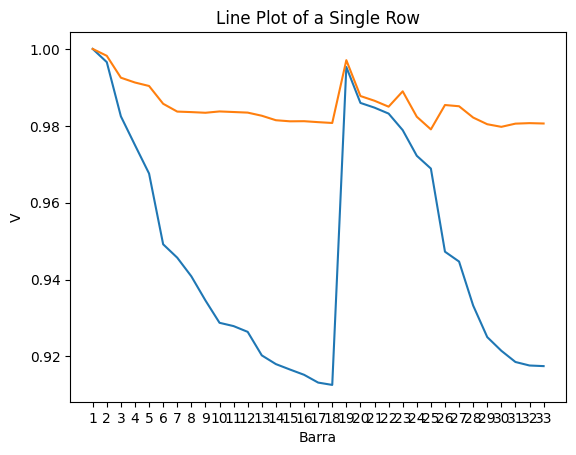

Tempo de processamento: 404425 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 12ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2293937719623633
Change     = 1.2293937719623633
-------------


Generation = 2
Fitness    = 1.414679303099596
Change     = 0.18528553113723278
-------------


Generation = 3
Fitness    = 1.414679303099596
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.455034274625742
Change     = 0.04035497152614598
-------------


Generation = 5
Fitness    = 1.455034274625742
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.455034274625742
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.5007132421650913
Change     = 0.04567896753934919
-------------


Generation = 8
Fitness    = 1.5007132421650913
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.5007132421650913
Change     = 0.0
-------------


Generation = 10


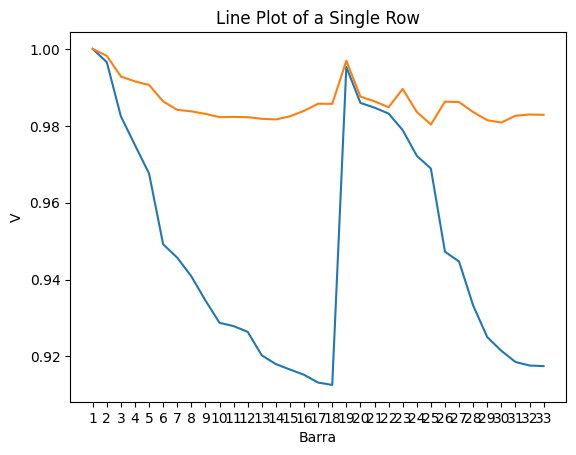

Tempo de processamento: 384819 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 13ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1749544461103452
Change     = 1.1749544461103452
-------------


Generation = 2
Fitness    = 1.319095679592917
Change     = 0.1441412334825718
-------------


Generation = 3
Fitness    = 1.419086618995382
Change     = 0.09999093940246495
-------------


Generation = 4
Fitness    = 1.419086618995382
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.419086618995382
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.419086618995382
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4801515467076576
Change     = 0.061064927712275674
-------------


Generation = 8
Fitness    = 1.4801515467076576
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4801515467076576
Change     = 0.0
-------------


Generation = 10


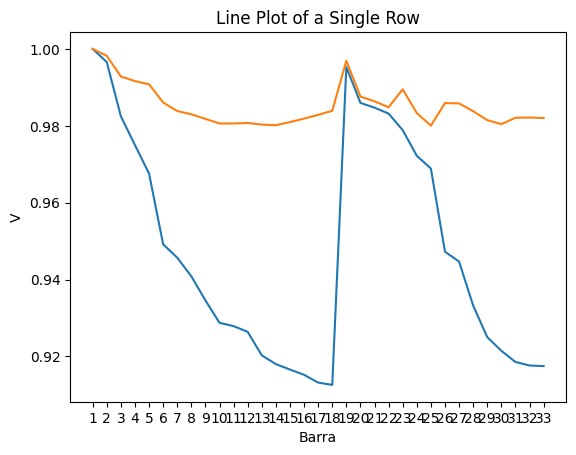

Tempo de processamento: 393951 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 14ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1120550681970223
Change     = 1.1120550681970223
-------------


Generation = 2
Fitness    = 1.171565122804103
Change     = 0.05951005460708081
-------------


Generation = 3
Fitness    = 1.226138942212729
Change     = 0.05457381940862582
-------------


Generation = 4
Fitness    = 1.226138942212729
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3397060575641373
Change     = 0.1135671153514084
-------------


Generation = 6
Fitness    = 1.3397060575641373
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3682777376798798
Change     = 0.028571680115742515
-------------


Generation = 8
Fitness    = 1.3847079867067567
Change     = 0.016430249026876842
-------------


Generation = 9
Fitness    = 1.3847079867067567
Change     = 0

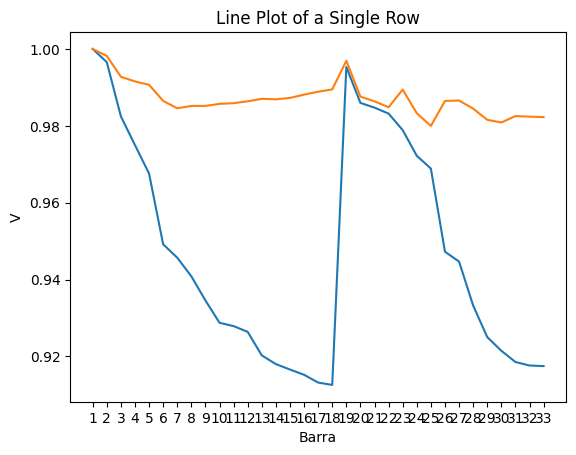

Tempo de processamento: 402630 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 15ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2110349249957828
Change     = 1.2110349249957828
-------------


Generation = 2
Fitness    = 1.2261618445705653
Change     = 0.015126919574782516
-------------


Generation = 3
Fitness    = 1.317455094580611
Change     = 0.09129325001004562
-------------


Generation = 4
Fitness    = 1.317455094580611
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.4020963225475986
Change     = 0.0846412279669877
-------------


Generation = 6
Fitness    = 1.4020963225475986
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4042750768665426
Change     = 0.0021787543189439873
-------------


Generation = 8
Fitness    = 1.4042750768665426
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4042750768665426
Change     = 0.0
-----------

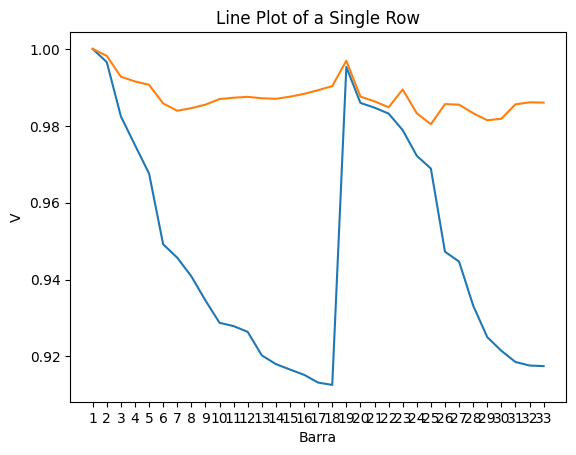

Tempo de processamento: 390477 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 16ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3766177115431115
Change     = 1.3766177115431115
-------------


Generation = 2
Fitness    = 1.3766177115431115
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3766177115431115
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.4345181631618193
Change     = 0.05790045161870783
-------------


Generation = 5
Fitness    = 1.4345181631618193
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4345181631618193
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4584091075067906
Change     = 0.0238909443449713
-------------


Generation = 8
Fitness    = 1.4584091075067906
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4584091075067906
Change     = 0.0
-------------


Generation = 10
Fitness    =

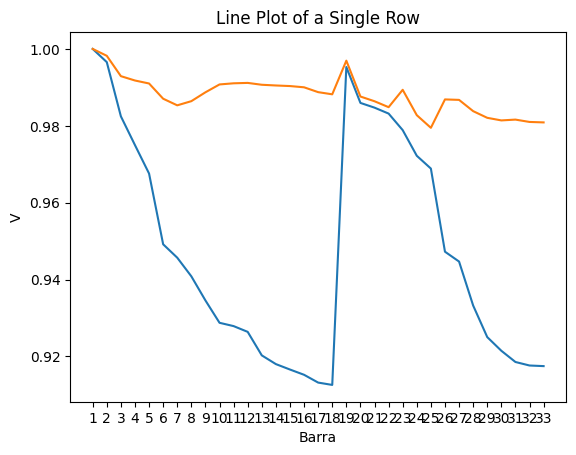

Tempo de processamento: 349252 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 17ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3384982411893733
Change     = 1.3384982411893733
-------------


Generation = 2
Fitness    = 1.3384982411893733
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3384982411893733
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.365951145435232
Change     = 0.027452904245858667
-------------


Generation = 5
Fitness    = 1.365951145435232
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.408772706590941
Change     = 0.04282156115570901
-------------


Generation = 7
Fitness    = 1.408772706590941
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.408772706590941
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.5220836112042464
Change     = 0.1133109046133054
-------------


Generation = 10


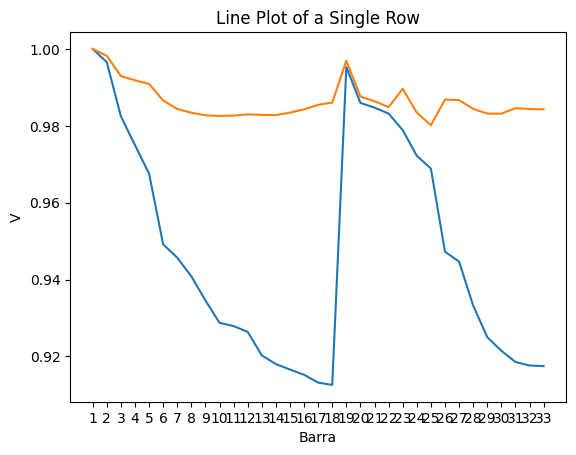

Tempo de processamento: 417966 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 18ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1953661907594173
Change     = 1.1953661907594173
-------------


Generation = 2
Fitness    = 1.231158216875417
Change     = 0.03579202611599963
-------------


Generation = 3
Fitness    = 1.231158216875417
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2410972011636225
Change     = 0.00993898428820561
-------------


Generation = 5
Fitness    = 1.244420224742183
Change     = 0.0033230235785604023
-------------


Generation = 6
Fitness    = 1.4715170029766897
Change     = 0.2270967782345068
-------------


Generation = 7
Fitness    = 1.4715170029766897
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4715170029766897
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.5069200761840833
Change     = 0.035403073207393

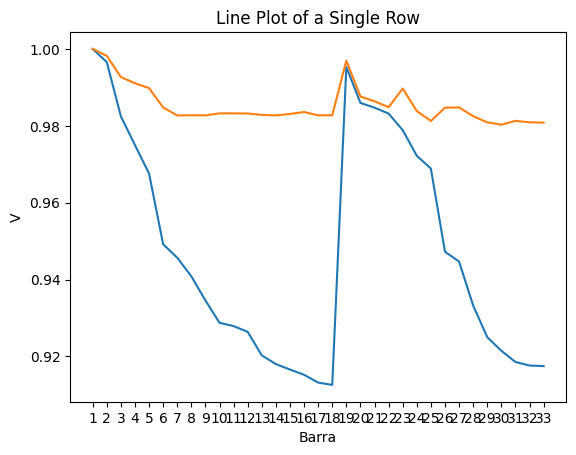

Tempo de processamento: 364345 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 19ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1464331636508582
Change     = 1.1464331636508582
-------------


Generation = 2
Fitness    = 1.182633246826525
Change     = 0.03620008317566681
-------------


Generation = 3
Fitness    = 1.2409459627609607
Change     = 0.058312715934435655
-------------


Generation = 4
Fitness    = 1.3159833787907513
Change     = 0.07503741602979064
-------------


Generation = 5
Fitness    = 1.3476853605603956
Change     = 0.03170198176964423
-------------


Generation = 6
Fitness    = 1.3476853605603956
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3476853605603956
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3691761328945693
Change     = 0.021490772334173736
-------------


Generation = 9
Fitness    = 1.4042642608542832
Change     

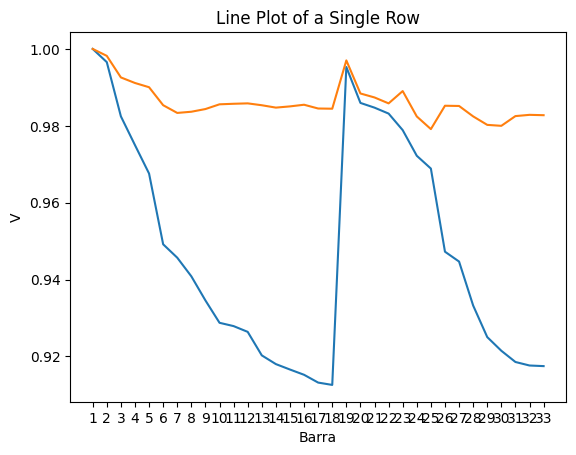

Tempo de processamento: 364540 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 20ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2803769052937481
Change     = 1.2803769052937481
-------------


Generation = 2
Fitness    = 1.2803769052937481
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2803769052937481
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.401184479268951
Change     = 0.12080757397520281
-------------


Generation = 5
Fitness    = 1.401184479268951
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4984445131047686
Change     = 0.0972600338358176
-------------


Generation = 7
Fitness    = 1.4984445131047686
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4984445131047686
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4984445131047686
Change     = 0.0
-------------


Generation = 10
Fitness    = 1

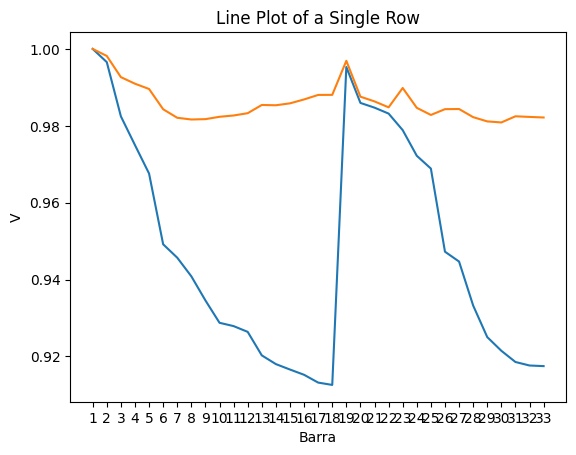

Tempo de processamento: 347780 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 21ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3189982584378397
Change     = 1.3189982584378397
-------------


Generation = 2
Fitness    = 1.3189982584378397
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.3189982584378397
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3189982584378397
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3189982584378397
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3584044011684573
Change     = 0.0394061427306176
-------------


Generation = 7
Fitness    = 1.3716645040325195
Change     = 0.013260102864062207
-------------


Generation = 8
Fitness    = 1.3716645040325195
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.3716645040325195
Change     = 0.0
-------------


Generation = 10
Fitness    

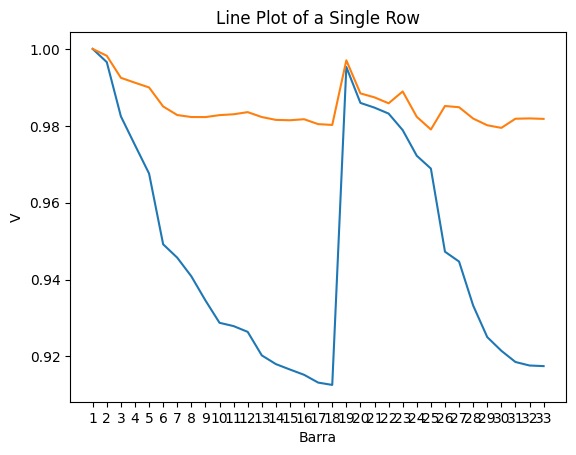

Tempo de processamento: 350482 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 22ªVEZ-----------------------------

Generation = 1
Fitness    = 1.163590787057227
Change     = 1.163590787057227
-------------


Generation = 2
Fitness    = 1.261633806388203
Change     = 0.09804301933097603
-------------


Generation = 3
Fitness    = 1.4335552843680346
Change     = 0.17192147797983148
-------------


Generation = 4
Fitness    = 1.4335552843680346
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.4335552843680346
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.4605480329432607
Change     = 0.026992748575226155
-------------


Generation = 7
Fitness    = 1.4605480329432607
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4605480329432607
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4605480329432607
Change     = 0.0
-------------


Generation = 

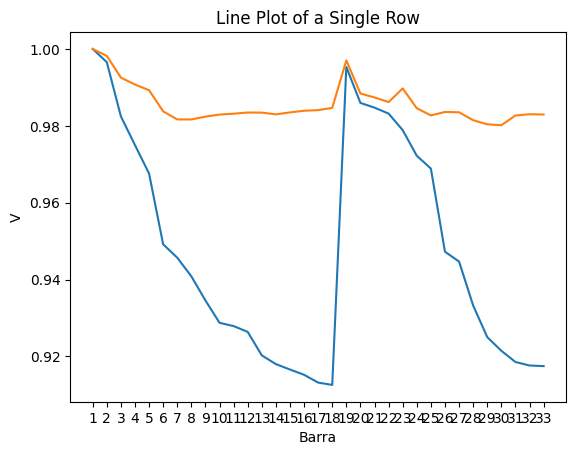

Tempo de processamento: 342620 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 23ªVEZ-----------------------------

Generation = 1
Fitness    = 1.367023523391125
Change     = 1.367023523391125
-------------


Generation = 2
Fitness    = 1.367023523391125
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.367023523391125
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.367023523391125
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.4274826646436374
Change     = 0.060459141252512394
-------------


Generation = 6
Fitness    = 1.4274826646436374
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.4274826646436374
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.4274826646436374
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.4274826646436374
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.4341331113443283

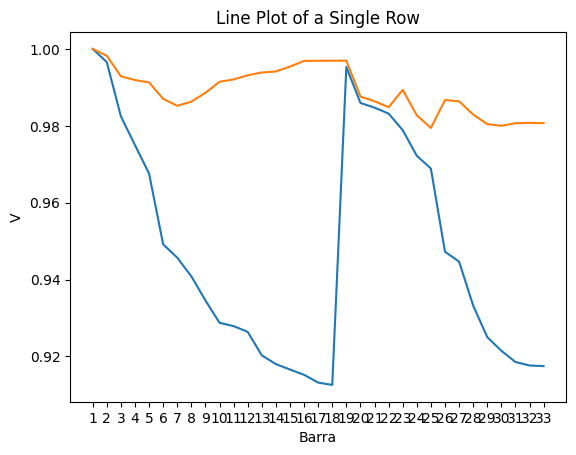

Tempo de processamento: 356923 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 24ªVEZ-----------------------------

Generation = 1
Fitness    = 1.156748500710225
Change     = 1.156748500710225
-------------


Generation = 2
Fitness    = 1.2431279441706526
Change     = 0.0863794434604277
-------------


Generation = 3
Fitness    = 1.2507214585647302
Change     = 0.007593514394077516
-------------


Generation = 4
Fitness    = 1.3079521971097066
Change     = 0.0572307385449764
-------------


Generation = 5
Fitness    = 1.3079521971097066
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3419458738368548
Change     = 0.03399367672714826
-------------


Generation = 7
Fitness    = 1.400091748451425
Change     = 0.058145874614570214
-------------


Generation = 8
Fitness    = 1.400091748451425
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.400091748451425
Change     = 0.0


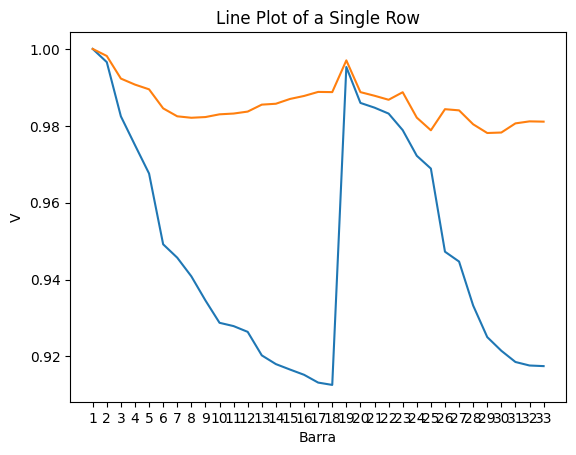

Tempo de processamento: 373967 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 25ªVEZ-----------------------------

Generation = 1
Fitness    = 1.212119255913243
Change     = 1.212119255913243
-------------


Generation = 2
Fitness    = 1.212119255913243
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.2390598099424146
Change     = 0.026940554029171615
-------------


Generation = 4
Fitness    = 1.5211337153252884
Change     = 0.2820739053828738
-------------


Generation = 5
Fitness    = 1.5211337153252884
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.5211337153252884
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.5325423584673648
Change     = 0.011408643142076347
-------------


Generation = 8
Fitness    = 1.5325423584673648
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.5325423584673648
Change     = 0.0
-------------


Generation = 

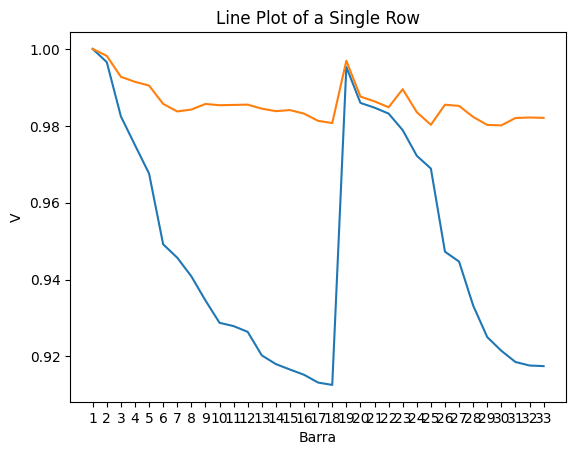

Tempo de processamento: 403825 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 26ªVEZ-----------------------------

Generation = 1
Fitness    = 1.284126952840281
Change     = 1.284126952840281
-------------


Generation = 2
Fitness    = 1.3957216233836636
Change     = 0.11159467054338257
-------------


Generation = 3
Fitness    = 1.3957216233836636
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3957216233836636
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3957216233836636
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3957216233836636
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3957216233836636
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3957216233836636
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.416806994203589
Change     = 0.021085370819925453
-------------


Generation = 10
Fitness    = 

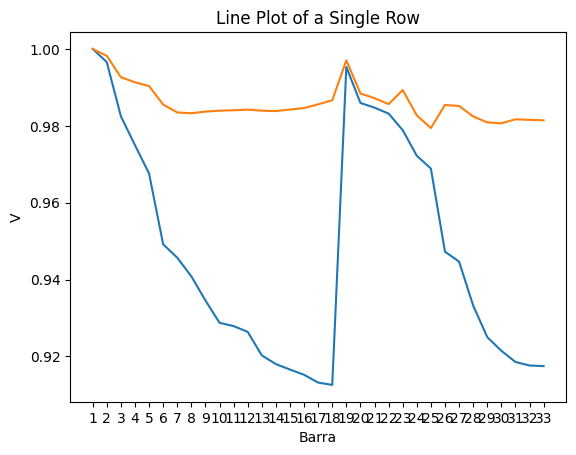

Tempo de processamento: 407846 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 27ªVEZ-----------------------------

Generation = 1
Fitness    = 1.2279028676477297
Change     = 1.2279028676477297
-------------


Generation = 2
Fitness    = 1.3926527639621726
Change     = 0.16474989631444292
-------------


Generation = 3
Fitness    = 1.3926527639621726
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.3926527639621726
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.3926527639621726
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.3926527639621726
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.483177878545857
Change     = 0.09052511458368429
-------------


Generation = 8
Fitness    = 1.483177878545857
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.483177878545857
Change     = 0.0
-------------


Generation = 10
Fitness    = 1

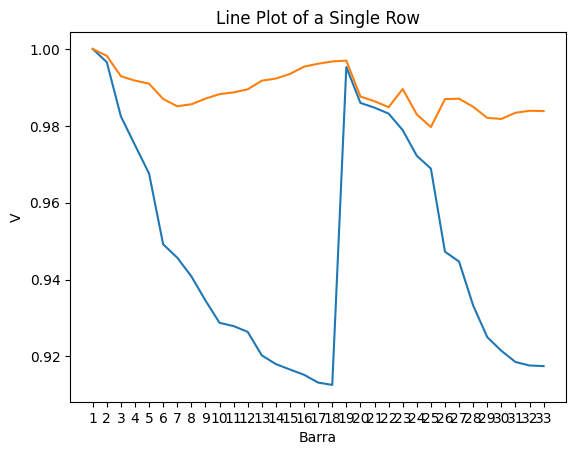

Tempo de processamento: 370177 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 28ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3973240378444467
Change     = 1.3973240378444467
-------------


Generation = 2
Fitness    = 1.3973240378444467
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.427718821739831
Change     = 0.030394783895384192
-------------


Generation = 4
Fitness    = 1.427718821739831
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.427718821739831
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.427718821739831
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.427718821739831
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.427718821739831
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.427718821739831
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.427718821739831
Ch

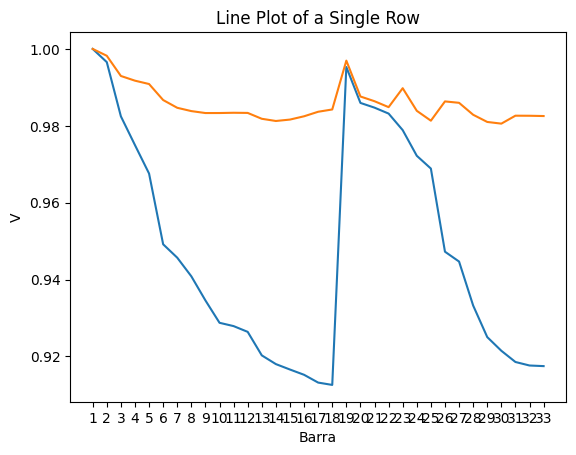

Tempo de processamento: 399587 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 29ªVEZ-----------------------------

Generation = 1
Fitness    = 1.3687157832470214
Change     = 1.3687157832470214
-------------


Generation = 2
Fitness    = 1.3687157832470214
Change     = 0.0
-------------


Generation = 3
Fitness    = 1.5609799908461959
Change     = 0.1922642075991745
-------------


Generation = 4
Fitness    = 1.5609799908461959
Change     = 0.0
-------------


Generation = 5
Fitness    = 1.5609799908461959
Change     = 0.0
-------------


Generation = 6
Fitness    = 1.5609799908461959
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.5609799908461959
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.5609799908461959
Change     = 0.0
-------------


Generation = 9
Fitness    = 1.5609799908461959
Change     = 0.0
-------------


Generation = 10
Fitness    = 1.5609799908461

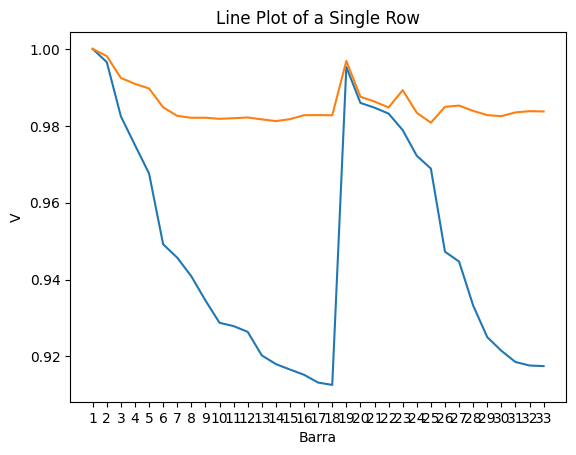

Tempo de processamento: 399083 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------





-----------------------------RODANDO PELA 30ªVEZ-----------------------------

Generation = 1
Fitness    = 1.1997262425808675
Change     = 1.1997262425808675
-------------


Generation = 2
Fitness    = 1.2617288334355585
Change     = 0.062002590854691064
-------------


Generation = 3
Fitness    = 1.2617288334355585
Change     = 0.0
-------------


Generation = 4
Fitness    = 1.2655692936356013
Change     = 0.0038404602000428056
-------------


Generation = 5
Fitness    = 1.3075887100752426
Change     = 0.042019416439641244
-------------


Generation = 6
Fitness    = 1.3075887100752426
Change     = 0.0
-------------


Generation = 7
Fitness    = 1.3075887100752426
Change     = 0.0
-------------


Generation = 8
Fitness    = 1.3109478242616452
Change     = 0.0033591141864026675
-------------


Generation = 9
Fitness    = 1.343037052799808
Change     = 0.03208922

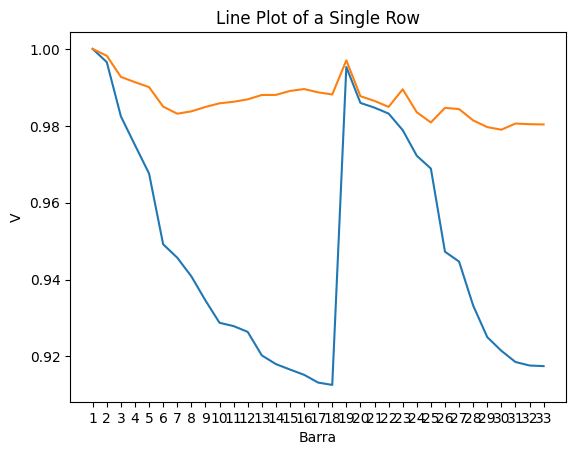

Tempo de processamento: 370288 ms




--------------------------------FIM DE UM ALGORITMO--------------------------------




     Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.521393           350751    89.303794       1.0  0.979082  0.584875   
1   1.548856           385220    85.166807       1.0  0.980282  0.604106   
2   1.546027           394625    87.206935       1.0  0.980158  0.594622   
3   1.517124           379699    87.821972       1.0  0.978895  0.591763   
4   1.539933           398228    86.779505       1.0  0.979892  0.596609   
5   1.517448           356521    94.249565       1.0  0.978909  0.561885   
6   1.531668           368931    87.047143       1.0  0.979531  0.595365   
7   1.551229           393460    86.185487       1.0  0.980386  0.599371   
8   1.571160           363808    86.376724       1.0  0.981257  0.598482   
9   1.555461           374549    96.274424       1.0  0.980571  0.552473   
10  1.521047           404425    86.38

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitness  Tempo Exec (ms)  Perda_Total  Vmax_Sol  Vmin_Sol      fit1  \
0   1.521393           350751    89.303794       1.0  0.979082  0.584875   
1   1.548856           385220    85.166807       1.0  0.980282  0.604106   
2   1.546027           394625    87.206935       1.0  0.980158  0.594622   
3   1.517124           379699    87.821972       1.0  0.978895  0.591763   
4   1.539933           398228    86.779505       1.0  0.979892  0.596609   
5   1.517448           356521    94.249565       1.0  0.978909  0.561885   
6   1.531668           368931    87.047143       1.0  0.979531  0.595365   
7   1.551229           393460    86.185487       1.0  0.980386  0.599371   
8   1.571160           363808    86.376724       1.0  0.981257  0.598482   
9   1.555461           374549    96.274424       1.0  0.980571  0.552473   
10  1.521047           404425    86.380339       1.0  0.979067  0.598465   
11  1.550074           384819    87.196058       1.0  0.980335  0.594673   
12  1.543198           393951    86.743786       1.0  0.980035  0.596775   
13  1.541746           402630    88.478755       1.0  0.979971  0.588710   
14  1.551698           390477    92.261488       1.0  0.980406  0.571127   
15  1.530318           349252    91.255230       1.0  0.979472  0.575804   
16  1.545947           417966    88.601762       1.0  0.980155  0.588139   
17  1.549166           364345    84.893486       1.0  0.980296  0.605376   
18  1.522678           364540    87.820930       1.0  0.979138  0.591768   
19  1.562332           347780    87.187711       1.0  0.980871  0.594712   
20  1.520438           350482    86.393547       1.0  0.979040  0.598403   
21  1.545821           342620    84.519481       1.0  0.980149  0.607115   
22  1.529535           356923    94.435250       1.0  0.979438  0.561022   
23  1.499517           373967    88.601391       1.0  0.978126  0.588140   
24  1.544992           403825    86.660060       1.0  0.980113  0.597165   
25  1.529019           407846    86.619757       1.0  0.979415  0.597352   
26  1.534865           370177    94.608471       1.0  0.979670  0.560217   
27  1.555291           399587    85.077327       1.0  0.980563  0.604522   
28  1.560980           399083    88.326397       1.0  0.980812  0.589419   
29  1.519120           370288    87.321710       1.0  0.978982  0.594089   

        fit2  
0   0.760697  
1   0.774428  
2   0.773014  
3   0.758562  
4   0.769967  
5   0.758724  
6   0.765834  
7   0.775614  
8   0.785580  
9   0.777731  
10  0.760523  
11  0.775037  
12  0.771599  
13  0.770873  
14  0.775849  
15  0.765159  
16  0.772973  
17  0.774583  
18  0.761339  
19  0.781166  
20  0.760219  
21  0.772910  
22  0.764767  
23  0.749758  
24  0.772496  
25  0.764510  
26  0.767432  
27  0.777646  
28  0.780490  
29  0.759560

In [ ]:
Tipo_fp = "Unitário" #Q>0
fp=1
#parametrização
num_generations = 30 #Número de Gerações
num_parents_mating = 26 #Número de soluções que gerarão filhos

sol_per_pop = 50 #quantidade de soluções por população
num_genes = 32 #numero de genes de cada solução (é o numero de nós que dá pra colocar GD)
gene_space = [0, 0, 0, 0, 0, 0.075, 0.11, 0.125, 0.250, 0.35] #define as potências de GD que podem ser inseridas

last_fitness = 0
alfa = 0
beta = 2

P_Types = ["uniform", "random"]

Resultado_FP_Unit = [None for _ in range(30)] #cria o vetor que vai armazenar os resultados de cada execução do alg em um vet vazio

for i in range(0,30):
  print(f"\n-----------------------------RODANDO PELA {i+1}ªVEZ-----------------------------\n")
  last_fitness = 0
  Resultado_FP_Unit[i] = Genetico_Total(num_generations, num_parents_mating, sol_per_pop, num_genes, gene_space, fitness_func, IEEE_network, Perda_Total_Init, Vdev_max_Init, Total_P, P_GD_Max, on_generation, fp, Tipo_fp, alfa, beta, P_Types)


#display(Resultado_FP_Unit)
# Extract the strings and the integers from the second element of each inner list
Lista_Resultados_1 = [[item[1], item[2], item[3], item[4], item[5], item[6], item[7]] for item in Resultado_FP_Unit]
Lista_GDs_1 = [item[0] for item in Resultado_FP_Unit]
# Create a DataFrame with the extracted data
Lista_Nomes_1 = [f"Gerador nó {i+2}" for i in range (32)]
# Create a DataFrame with the extracted data
df_Lista_Resultados_1 = pd.DataFrame(Lista_Resultados_1, columns=['Fitness', 'Tempo Exec (ms)', 'Perda_Total', 'Vmax_Sol', 'Vmin_Sol', 'fit1', 'fit2'])
df_Lista_GDs_1 = pd.DataFrame(Lista_GDs_1, columns = Lista_Nomes_1)

print(df_Lista_Resultados_1)

#cria os csv's
df_Lista_Resultados_1.to_csv('Fitness_0_100.csv')
df_Lista_GDs_1.to_csv('Soluções_0_100.csv')

files.download('Fitness_0_100.csv')
files.download('Soluções_0_100.csv')
display(df_Lista_Resultados_1)